# Testing of Hypothesis I

This is the hypothesis that a better test of GNN metric learning is on jet-like tracks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# System imports
import os
import sys
from pprint import pprint as pp
from time import time as tt
import inspect
import logging
import copy

# External imports
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.decomposition import PCA
from sklearn.metrics import auc, f1_score 
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch_geometric.data import Data
from torch_geometric.data import DataLoader
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations, combinations
from itertools import chain

from torch.nn import Linear
from torch_scatter import scatter, segment_csr, scatter_add
from torch_geometric.nn.conv import MessagePassing
from torch_cluster import knn_graph, radius_graph
from trackml.dataset import load_event
from trackml.score import _analyze_tracks, score_event

import yaml

import pytorch_lightning as pl
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.loggers import WandbLogger
from torch.utils.checkpoint import checkpoint

# Limit CPU usage on Jupyter
os.environ['OMP_NUM_THREADS'] = '4'

# Pick up local packages
sys.path.append('..')

# Local imports
from lightning_modules.utils import evaluate_set_metrics, get_metrics, build_edges, graph_intersection
from lightning_modules.Filter.utils import edge_model_evaluation
from pytorch_lightning.loggers import WandbLogger
%matplotlib inline

# Get rid of RuntimeWarnings, gross
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
logging.basicConfig(level=logging.INFO)

In [63]:
logging.basicConfig(level=logging.WARNING)

In [ ]:
trainer = Trainer(gpus=1, max_epochs=2, logger=wandb_logger, num_sanity_val_steps=0)

## GNNNodeEmbedding Performance

In [9]:
from lightning_modules.GNNEmbedding.Models.agnn import GlobalAttentionNodeEmbedding

In [10]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [11]:
model = GlobalAttentionNodeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GlobalNodeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=20, logger=wandb_logger, num_sanity_val_steps=0)

train_loss,0.30055
epoch,14
_step,1499
_runtime,724
_timestamp,1612546900
val_loss,0.80856
eff,0.86655
pur,0.11066
edge_eff,0.80447
edge_pur,0.52203
current_lr,0.0003


train_loss,█▄▃▂▂▁▂▁▂▁▂▁▂▁▂▁▂▁▂▁▁▁▂▁▂▁▁▁▁▁
epoch,▁▁▁▁▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇▇██
_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅█
_timestamp,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅█
val_loss,█▅▄▃▃▂▂▂▁▁▁▁▁▁▁
eff,▁▇█████████████
pur,▁▅▆▆▆▆▆▇▇▇█████
edge_eff,▁▃▇██▇▇▅▆▇▇██▇█
edge_pur,▁▃▄▃▄▅▅█▆▅▄▄▄▄▄
current_lr,▁▅████████▁▁▁▁▁


wandb: wandb version 0.10.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [12]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021178
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021179
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021180
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021181
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021182
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021183
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021184
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name              | Type            | Params
------------------------------------------------------
0 | input_network     | Sequential      | 134 K 
1 | edge_network      | EdgeNetwork     | 269 K 
2 | node_network      | NodeMeanNetwork | 263 K 
3 | embedding_network | Sequential      | 199 K 
4 | multi_loss        | MultiNoiseLoss  | 0     
INFO:lightning:
  | Name              | Type            | Params
------------------------------------------------------
0 | input_network     | Sequential      | 134 K 
1 | edge_network      | EdgeNetwork     | 269 K 
2 | node_network      | NodeMeanNetwork | 263 K 
3 | embedding_network | Sequential      | 199 K 
4 | multi_loss        | MultiNoiseLoss  | 0     


INFO:root:Efficiency: 0.8867858052253723
INFO:root:Purity: 0.0972493588924408
INFO:root:Efficiency: 0.8643104434013367
INFO:root:Purity: 0.09578455239534378
INFO:root:Efficiency: 0.8378192186355591
INFO:root:Purity: 0.09220676869153976
INFO:root:Efficiency: 0.8725700378417969
INFO:root:Purity: 0.09610704332590103
INFO:root:Efficiency: 0.8709374070167542
INFO:root:Purity: 0.09579183906316757
INFO:root:Efficiency: 0.8796361088752747
INFO:root:Purity: 0.09761612862348557
INFO:root:Efficiency: 0.8781229257583618
INFO:root:Purity: 0.0978342741727829
INFO:root:Efficiency: 0.8710217475891113
INFO:root:Purity: 0.09542405605316162
INFO:root:Efficiency: 0.8386693000793457
INFO:root:Purity: 0.09235180914402008
INFO:root:Efficiency: 0.8804383277893066
INFO:root:Purity: 0.09711632132530212
INFO:root:Efficiency: 0.872373104095459
INFO:root:Purity: 0.09546629339456558
INFO:root:Efficiency: 0.8393487930297852
INFO:root:Purity: 0.09200111031532288
INFO:root:Efficiency: 0.8240119218826294
INFO:root:Puri

INFO:root:Efficiency: 0.8744538426399231
INFO:root:Purity: 0.0960724949836731
INFO:root:Efficiency: 0.8534529209136963
INFO:root:Purity: 0.09463533759117126
INFO:root:Efficiency: 0.8221091032028198
INFO:root:Purity: 0.09055652469396591
INFO:root:Efficiency: 0.8677067160606384
INFO:root:Purity: 0.09558238089084625
INFO:root:Efficiency: 0.8619545698165894
INFO:root:Purity: 0.0948738157749176
INFO:root:Efficiency: 0.86468905210495
INFO:root:Purity: 0.09597887098789215
INFO:root:Efficiency: 0.8637759685516357
INFO:root:Purity: 0.09633205085992813
INFO:root:Efficiency: 0.8647962808609009
INFO:root:Purity: 0.09486754983663559
INFO:root:Efficiency: 0.8245202302932739
INFO:root:Purity: 0.09080634266138077
INFO:root:Efficiency: 0.867814302444458
INFO:root:Purity: 0.09608609229326248
INFO:root:Efficiency: 0.8602256774902344
INFO:root:Purity: 0.09422879666090012
INFO:root:Efficiency: 0.8242731690406799
INFO:root:Purity: 0.09035299718379974
INFO:root:Efficiency: 0.8113401532173157
INFO:root:Purity

INFO:root:Efficiency: 0.8716956377029419
INFO:root:Purity: 0.09609583765268326
INFO:root:Efficiency: 0.8424684405326843
INFO:root:Purity: 0.09362220764160156
INFO:root:Efficiency: 0.806472897529602
INFO:root:Purity: 0.08887253701686859
INFO:root:Efficiency: 0.8489673733711243
INFO:root:Purity: 0.09369849413633347
INFO:root:Efficiency: 0.855748176574707
INFO:root:Purity: 0.09439011663198471
INFO:root:Efficiency: 0.856197714805603
INFO:root:Purity: 0.09538102895021439
INFO:root:Efficiency: 0.8584898114204407
INFO:root:Purity: 0.09582173824310303
INFO:root:Efficiency: 0.8515380620956421
INFO:root:Purity: 0.09361929446458817
INFO:root:Efficiency: 0.8145123720169067
INFO:root:Purity: 0.09002596884965897
INFO:root:Efficiency: 0.8573733568191528
INFO:root:Purity: 0.0949210673570633
INFO:root:Efficiency: 0.8534637093544006
INFO:root:Purity: 0.09354112297296524
INFO:root:Efficiency: 0.8174570798873901
INFO:root:Purity: 0.08979574590921402
INFO:root:Efficiency: 0.8023416996002197
INFO:root:Purit

INFO:root:Efficiency: 0.8861531615257263
INFO:root:Purity: 0.10052839666604996
INFO:root:Efficiency: 0.8590907454490662
INFO:root:Purity: 0.09766612201929092
INFO:root:Efficiency: 0.8321824669837952
INFO:root:Purity: 0.09385623037815094
INFO:root:Efficiency: 0.8690471649169922
INFO:root:Purity: 0.09807077050209045
INFO:root:Efficiency: 0.8739878535270691
INFO:root:Purity: 0.09920947253704071
INFO:root:Efficiency: 0.8781023621559143
INFO:root:Purity: 0.10046509653329849
INFO:root:Efficiency: 0.8769393563270569
INFO:root:Purity: 0.1000068411231041
INFO:root:Efficiency: 0.8719123005867004
INFO:root:Purity: 0.09836936742067337
INFO:root:Efficiency: 0.8367379307746887
INFO:root:Purity: 0.09409179538488388
INFO:root:Efficiency: 0.8793337941169739
INFO:root:Purity: 0.10015971213579178
INFO:root:Efficiency: 0.8732380867004395
INFO:root:Purity: 0.09830714762210846
INFO:root:Efficiency: 0.8368631601333618
INFO:root:Purity: 0.09394915401935577
INFO:root:Efficiency: 0.8223264813423157
INFO:root:Pu

INFO:root:Efficiency: 0.8852927684783936
INFO:root:Purity: 0.10918288677930832
INFO:root:Efficiency: 0.8625929951667786
INFO:root:Purity: 0.10747071355581284
INFO:root:Efficiency: 0.8387349843978882
INFO:root:Purity: 0.1025737002491951
INFO:root:Efficiency: 0.8787468671798706
INFO:root:Purity: 0.107927106320858
INFO:root:Efficiency: 0.8741143941879272
INFO:root:Purity: 0.10954109579324722
INFO:root:Efficiency: 0.8796988129615784
INFO:root:Purity: 0.10997892916202545
INFO:root:Efficiency: 0.8774591684341431
INFO:root:Purity: 0.11101409047842026
INFO:root:Efficiency: 0.8808759450912476
INFO:root:Purity: 0.10751526802778244
INFO:root:Efficiency: 0.8368347883224487
INFO:root:Purity: 0.10200376808643341
INFO:root:Efficiency: 0.8812322020530701
INFO:root:Purity: 0.10983085632324219
INFO:root:Efficiency: 0.8734110593795776
INFO:root:Purity: 0.10791610926389694
INFO:root:Efficiency: 0.8409779667854309
INFO:root:Purity: 0.1032918319106102
INFO:root:Efficiency: 0.8262181282043457
INFO:root:Purit

INFO:root:Efficiency: 0.8856217861175537
INFO:root:Purity: 0.11184900254011154
INFO:root:Efficiency: 0.8622195720672607
INFO:root:Purity: 0.11030462384223938
INFO:root:Efficiency: 0.8370058536529541
INFO:root:Purity: 0.1038147583603859
INFO:root:Efficiency: 0.8808619379997253
INFO:root:Purity: 0.11158125847578049
INFO:root:Efficiency: 0.8810307383537292
INFO:root:Purity: 0.11322718113660812
INFO:root:Efficiency: 0.8801589608192444
INFO:root:Purity: 0.112090103328228
INFO:root:Efficiency: 0.8765314817428589
INFO:root:Purity: 0.11270785331726074
INFO:root:Efficiency: 0.8895399570465088
INFO:root:Purity: 0.11155236512422562
INFO:root:Efficiency: 0.845964789390564
INFO:root:Purity: 0.104928158223629
INFO:root:Efficiency: 0.8885926008224487
INFO:root:Purity: 0.11198835074901581
INFO:root:Efficiency: 0.8760210871696472
INFO:root:Purity: 0.10970799624919891
INFO:root:Efficiency: 0.8386180400848389
INFO:root:Purity: 0.10563299804925919
INFO:root:Efficiency: 0.8272820711135864
INFO:root:Purity:

INFO:root:Efficiency: 0.8904381394386292
INFO:root:Purity: 0.1131083071231842
INFO:root:Efficiency: 0.8676409125328064
INFO:root:Purity: 0.11089741438627243
INFO:root:Efficiency: 0.8432626128196716
INFO:root:Purity: 0.105679452419281
INFO:root:Efficiency: 0.8851796388626099
INFO:root:Purity: 0.11219022423028946
INFO:root:Efficiency: 0.8829706907272339
INFO:root:Purity: 0.11422570049762726
INFO:root:Efficiency: 0.8828081488609314
INFO:root:Purity: 0.11341225355863571
INFO:root:Efficiency: 0.8810738921165466
INFO:root:Purity: 0.11457986384630203
INFO:root:Efficiency: 0.8904471397399902
INFO:root:Purity: 0.11145569384098053
INFO:root:Efficiency: 0.848283588886261
INFO:root:Purity: 0.10558763891458511
INFO:root:Efficiency: 0.8912761807441711
INFO:root:Purity: 0.11383888125419617
INFO:root:Efficiency: 0.8818427920341492
INFO:root:Purity: 0.11132993549108505
INFO:root:Efficiency: 0.8444159626960754
INFO:root:Purity: 0.10692580789327621
INFO:root:Efficiency: 0.8301042318344116
INFO:root:Purit

INFO:root:Efficiency: 0.8932469487190247
INFO:root:Purity: 0.11281947046518326
INFO:root:Efficiency: 0.868895411491394
INFO:root:Purity: 0.11065243184566498
INFO:root:Efficiency: 0.846834659576416
INFO:root:Purity: 0.10489870607852936
INFO:root:Efficiency: 0.8839874267578125
INFO:root:Purity: 0.11116833239793777
INFO:root:Efficiency: 0.8837087154388428
INFO:root:Purity: 0.11316358298063278
INFO:root:Efficiency: 0.8871793150901794
INFO:root:Purity: 0.1135527715086937
INFO:root:Efficiency: 0.8841607570648193
INFO:root:Purity: 0.11353719979524612
INFO:root:Efficiency: 0.8883247971534729
INFO:root:Purity: 0.11059601604938507
INFO:root:Efficiency: 0.8474420309066772
INFO:root:Purity: 0.10476052016019821
INFO:root:Efficiency: 0.8907756805419922
INFO:root:Purity: 0.11225469410419464
INFO:root:Efficiency: 0.8840240836143494
INFO:root:Purity: 0.1106065884232521
INFO:root:Efficiency: 0.8469794392585754
INFO:root:Purity: 0.1067052036523819
INFO:root:Efficiency: 0.8302721977233887
INFO:root:Purity

INFO:root:Efficiency: 0.895111083984375
INFO:root:Purity: 0.11456817388534546
INFO:root:Efficiency: 0.871464192867279
INFO:root:Purity: 0.11206130683422089
INFO:root:Efficiency: 0.8467777371406555
INFO:root:Purity: 0.10634443908929825
INFO:root:Efficiency: 0.8831858038902283
INFO:root:Purity: 0.11248142272233963
INFO:root:Efficiency: 0.8837860226631165
INFO:root:Purity: 0.11460012942552567
INFO:root:Efficiency: 0.887730062007904
INFO:root:Purity: 0.11484012752771378
INFO:root:Efficiency: 0.8858242034912109
INFO:root:Purity: 0.11584603041410446
INFO:root:Efficiency: 0.8883247971534729
INFO:root:Purity: 0.11179449409246445
INFO:root:Efficiency: 0.8492765426635742
INFO:root:Purity: 0.10629736632108688
INFO:root:Efficiency: 0.8900336027145386
INFO:root:Purity: 0.11342889815568924
INFO:root:Efficiency: 0.8835276365280151
INFO:root:Purity: 0.11213735491037369
INFO:root:Efficiency: 0.8482791781425476
INFO:root:Purity: 0.10802431404590607
INFO:root:Efficiency: 0.833805501461029
INFO:root:Purit

INFO:root:Efficiency: 0.8931120038032532
INFO:root:Purity: 0.11366962641477585
INFO:root:Efficiency: 0.8695824146270752
INFO:root:Purity: 0.11127259582281113
INFO:root:Efficiency: 0.8452135920524597
INFO:root:Purity: 0.10613002628087997
INFO:root:Efficiency: 0.8775478601455688
INFO:root:Purity: 0.11126351356506348
INFO:root:Efficiency: 0.8795968294143677
INFO:root:Purity: 0.11407636106014252
INFO:root:Efficiency: 0.8867331147193909
INFO:root:Purity: 0.1144728884100914
INFO:root:Efficiency: 0.8853123784065247
INFO:root:Purity: 0.11528751999139786
INFO:root:Efficiency: 0.8827818632125854
INFO:root:Purity: 0.11064308881759644
INFO:root:Efficiency: 0.8445662260055542
INFO:root:Purity: 0.10563776642084122
INFO:root:Efficiency: 0.8861247301101685
INFO:root:Purity: 0.11278524994850159
INFO:root:Efficiency: 0.8817224502563477
INFO:root:Purity: 0.1114366427063942
INFO:root:Efficiency: 0.8471291661262512
INFO:root:Purity: 0.10763977468013763
INFO:root:Efficiency: 0.8308209776878357
INFO:root:Pur

INFO:root:Efficiency: 0.8943772315979004
INFO:root:Purity: 0.11766311526298523
INFO:root:Efficiency: 0.8717852830886841
INFO:root:Purity: 0.11458098888397217
INFO:root:Efficiency: 0.8465445637702942
INFO:root:Purity: 0.10927289724349976
INFO:root:Efficiency: 0.8829500675201416
INFO:root:Purity: 0.11500310897827148
INFO:root:Efficiency: 0.8835540413856506
INFO:root:Purity: 0.11786044389009476
INFO:root:Efficiency: 0.8885806202888489
INFO:root:Purity: 0.11835385859012604
INFO:root:Efficiency: 0.8873756527900696
INFO:root:Purity: 0.11809952557086945
INFO:root:Efficiency: 0.8866852521896362
INFO:root:Purity: 0.11418120563030243
INFO:root:Efficiency: 0.8492341637611389
INFO:root:Purity: 0.10905071347951889
INFO:root:Efficiency: 0.8888859748840332
INFO:root:Purity: 0.11531026661396027
INFO:root:Efficiency: 0.8834900856018066
INFO:root:Purity: 0.11492419242858887
INFO:root:Efficiency: 0.8469674587249756
INFO:root:Purity: 0.11143148690462112
INFO:root:Efficiency: 0.832808792591095
INFO:root:Pu

INFO:root:Efficiency: 0.8948664665222168
INFO:root:Purity: 0.11752937734127045
INFO:root:Efficiency: 0.8719421029090881
INFO:root:Purity: 0.11496967822313309
INFO:root:Efficiency: 0.8461065888404846
INFO:root:Purity: 0.1093691736459732
INFO:root:Efficiency: 0.8841827511787415
INFO:root:Purity: 0.11534895747900009
INFO:root:Efficiency: 0.8836735486984253
INFO:root:Purity: 0.11828494817018509
INFO:root:Efficiency: 0.8882459402084351
INFO:root:Purity: 0.1183013841509819
INFO:root:Efficiency: 0.8867918848991394
INFO:root:Purity: 0.11823589354753494
INFO:root:Efficiency: 0.8877838253974915
INFO:root:Purity: 0.11439108103513718
INFO:root:Efficiency: 0.849397599697113
INFO:root:Purity: 0.10912396013736725
INFO:root:Efficiency: 0.8900595307350159
INFO:root:Purity: 0.11560821533203125
INFO:root:Efficiency: 0.8833997845649719
INFO:root:Purity: 0.11489705741405487
INFO:root:Efficiency: 0.8467817902565002
INFO:root:Purity: 0.11124163866043091
INFO:root:Efficiency: 0.8328031897544861
INFO:root:Puri

INFO:root:Efficiency: 0.894680917263031
INFO:root:Purity: 0.11782675981521606
INFO:root:Efficiency: 0.8714492917060852
INFO:root:Purity: 0.11485211551189423
INFO:root:Efficiency: 0.8449121117591858
INFO:root:Purity: 0.109445720911026
INFO:root:Efficiency: 0.8844791054725647
INFO:root:Purity: 0.11549357324838638
INFO:root:Efficiency: 0.8842288255691528
INFO:root:Purity: 0.11847944557666779
INFO:root:Efficiency: 0.8870398998260498
INFO:root:Purity: 0.11841287463903427
INFO:root:Efficiency: 0.8861441016197205
INFO:root:Purity: 0.11834990978240967
INFO:root:Efficiency: 0.8882249593734741
INFO:root:Purity: 0.11457595974206924
INFO:root:Efficiency: 0.8496034741401672
INFO:root:Purity: 0.1093146800994873
INFO:root:Efficiency: 0.8906117677688599
INFO:root:Purity: 0.11589036136865616
INFO:root:Efficiency: 0.883264422416687
INFO:root:Purity: 0.11512067168951035
INFO:root:Efficiency: 0.8460031747817993
INFO:root:Purity: 0.11149711906909943
INFO:root:Efficiency: 0.8320360779762268
INFO:root:Purity

INFO:root:Efficiency: 0.894993007183075
INFO:root:Purity: 0.11759496480226517
INFO:root:Efficiency: 0.8716060519218445
INFO:root:Purity: 0.11469826847314835
INFO:root:Efficiency: 0.8454638123512268
INFO:root:Purity: 0.10930714756250381
INFO:root:Efficiency: 0.8845936059951782
INFO:root:Purity: 0.11549410969018936
INFO:root:Efficiency: 0.884067177772522
INFO:root:Purity: 0.11820252239704132
INFO:root:Efficiency: 0.8868237733840942
INFO:root:Purity: 0.11823899298906326
INFO:root:Efficiency: 0.8861361145973206
INFO:root:Purity: 0.11820895224809647
INFO:root:Efficiency: 0.8883331418037415
INFO:root:Purity: 0.11429149657487869
INFO:root:Efficiency: 0.8494581580162048
INFO:root:Purity: 0.10913997143507004
INFO:root:Efficiency: 0.8909914493560791
INFO:root:Purity: 0.11575338244438171
INFO:root:Efficiency: 0.8836705684661865
INFO:root:Purity: 0.11484979838132858
INFO:root:Efficiency: 0.8467279076576233
INFO:root:Purity: 0.1113780215382576
INFO:root:Efficiency: 0.8319408893585205
INFO:root:Puri

INFO:root:Efficiency: 0.8946049809455872
INFO:root:Purity: 0.11793152242898941
INFO:root:Efficiency: 0.8717628717422485
INFO:root:Purity: 0.11516796797513962
INFO:root:Efficiency: 0.8455207347869873
INFO:root:Purity: 0.10978234559297562
INFO:root:Efficiency: 0.88438481092453
INFO:root:Purity: 0.11587211489677429
INFO:root:Efficiency: 0.8839336037635803
INFO:root:Purity: 0.11868725717067719
INFO:root:Efficiency: 0.8869910836219788
INFO:root:Purity: 0.11850429326295853
INFO:root:Efficiency: 0.885992169380188
INFO:root:Purity: 0.11849046498537064
INFO:root:Efficiency: 0.8882749080657959
INFO:root:Purity: 0.11465748399496078
INFO:root:Efficiency: 0.848550021648407
INFO:root:Purity: 0.10943547636270523
INFO:root:Efficiency: 0.8905858993530273
INFO:root:Purity: 0.11610718071460724
INFO:root:Efficiency: 0.8835427165031433
INFO:root:Purity: 0.11520065367221832
INFO:root:Efficiency: 0.8458774089813232
INFO:root:Purity: 0.1116562932729721
INFO:root:Efficiency: 0.8315433263778687
INFO:root:Purity

INFO:root:Efficiency: 0.8940988779067993
INFO:root:Purity: 0.11769022792577744
INFO:root:Efficiency: 0.8723080158233643
INFO:root:Purity: 0.11509646475315094
INFO:root:Efficiency: 0.8460952043533325
INFO:root:Purity: 0.10975529253482819
INFO:root:Efficiency: 0.8849910497665405
INFO:root:Purity: 0.11580713093280792
INFO:root:Efficiency: 0.8840179443359375
INFO:root:Purity: 0.1184469535946846
INFO:root:Efficiency: 0.8872211575508118
INFO:root:Purity: 0.11847256869077682
INFO:root:Efficiency: 0.8858881592750549
INFO:root:Purity: 0.11839641630649567
INFO:root:Efficiency: 0.8882665634155273
INFO:root:Purity: 0.11450030654668808
INFO:root:Efficiency: 0.8495550155639648
INFO:root:Purity: 0.10944827646017075
INFO:root:Efficiency: 0.8916040658950806
INFO:root:Purity: 0.11612027138471603
INFO:root:Efficiency: 0.8838887214660645
INFO:root:Purity: 0.11504573374986649
INFO:root:Efficiency: 0.8463385701179504
INFO:root:Purity: 0.11161568015813828
INFO:root:Efficiency: 0.8315377235412598
INFO:root:Pu

INFO:root:Efficiency: 0.8942844867706299
INFO:root:Purity: 0.11765273660421371
INFO:root:Efficiency: 0.8720391988754272
INFO:root:Purity: 0.11514709889888763
INFO:root:Efficiency: 0.8450372219085693
INFO:root:Purity: 0.10985618829727173
INFO:root:Efficiency: 0.8845936059951782
INFO:root:Purity: 0.11579962819814682
INFO:root:Efficiency: 0.8841796517372131
INFO:root:Purity: 0.118738554418087
INFO:root:Efficiency: 0.8872699737548828
INFO:root:Purity: 0.11843708157539368
INFO:root:Efficiency: 0.8857682347297668
INFO:root:Purity: 0.11838304251432419
INFO:root:Efficiency: 0.8884580135345459
INFO:root:Purity: 0.11466054618358612
INFO:root:Efficiency: 0.8490827679634094
INFO:root:Purity: 0.10947059839963913
INFO:root:Efficiency: 0.8912416696548462
INFO:root:Purity: 0.1161491721868515
INFO:root:Efficiency: 0.8838736414909363
INFO:root:Purity: 0.11498355120420456
INFO:root:Efficiency: 0.8459073305130005
INFO:root:Purity: 0.11159063130617142
INFO:root:Efficiency: 0.8320192694664001
INFO:root:Puri

INFO:root:Efficiency: 0.8939976692199707
INFO:root:Purity: 0.11794772744178772
INFO:root:Efficiency: 0.8720317482948303
INFO:root:Purity: 0.11539438366889954
INFO:root:Efficiency: 0.8456458449363708
INFO:root:Purity: 0.1101594865322113
INFO:root:Efficiency: 0.8849506378173828
INFO:root:Purity: 0.11617262661457062
INFO:root:Efficiency: 0.8844748139381409
INFO:root:Purity: 0.11895144730806351
INFO:root:Efficiency: 0.8865797519683838
INFO:root:Purity: 0.11856407672166824
INFO:root:Efficiency: 0.886056125164032
INFO:root:Purity: 0.11866185069084167
INFO:root:Efficiency: 0.8880085349082947
INFO:root:Purity: 0.11473453044891357
INFO:root:Efficiency: 0.8492644429206848
INFO:root:Purity: 0.109708271920681
INFO:root:Efficiency: 0.8914487361907959
INFO:root:Purity: 0.11649423092603683
INFO:root:Efficiency: 0.8835577368736267
INFO:root:Purity: 0.11521098017692566
INFO:root:Efficiency: 0.8456018567085266
INFO:root:Purity: 0.11188095062971115
INFO:root:Efficiency: 0.8316273093223572
INFO:root:Purit

INFO:root:Efficiency: 0.8945037722587585
INFO:root:Purity: 0.11806954443454742
INFO:root:Efficiency: 0.8718076944351196
INFO:root:Purity: 0.11521058529615402
INFO:root:Efficiency: 0.8456799983978271
INFO:root:Purity: 0.11019495874643326
INFO:root:Efficiency: 0.8848900198936462
INFO:root:Purity: 0.11621399968862534
INFO:root:Efficiency: 0.8841936588287354
INFO:root:Purity: 0.11893319338560104
INFO:root:Efficiency: 0.8869073987007141
INFO:root:Purity: 0.11866409331560135
INFO:root:Efficiency: 0.886591911315918
INFO:root:Purity: 0.11877546459436417
INFO:root:Efficiency: 0.8892070651054382
INFO:root:Purity: 0.11498681455850601
INFO:root:Efficiency: 0.8496337532997131
INFO:root:Purity: 0.10980416089296341
INFO:root:Efficiency: 0.8914832472801208
INFO:root:Purity: 0.1165531575679779
INFO:root:Efficiency: 0.8839714527130127
INFO:root:Purity: 0.11532724648714066
INFO:root:Efficiency: 0.8458833694458008
INFO:root:Purity: 0.11194267868995667
INFO:root:Efficiency: 0.831856906414032
INFO:root:Puri

INFO:root:Efficiency: 0.8941579461097717
INFO:root:Purity: 0.11794957518577576
INFO:root:Efficiency: 0.8716210126876831
INFO:root:Purity: 0.1152472198009491
INFO:root:Efficiency: 0.8455719351768494
INFO:root:Purity: 0.11013263463973999
INFO:root:Efficiency: 0.8848900198936462
INFO:root:Purity: 0.11615244299173355
INFO:root:Efficiency: 0.8838492631912231
INFO:root:Purity: 0.11880521476268768
INFO:root:Efficiency: 0.886705219745636
INFO:root:Purity: 0.11850638687610626
INFO:root:Efficiency: 0.8860001564025879
INFO:root:Purity: 0.1186905950307846
INFO:root:Efficiency: 0.8886494040489197
INFO:root:Purity: 0.11484882980585098
INFO:root:Efficiency: 0.8490525484085083
INFO:root:Purity: 0.1096043512225151
INFO:root:Efficiency: 0.891060471534729
INFO:root:Purity: 0.11642970144748688
INFO:root:Efficiency: 0.8836179375648499
INFO:root:Purity: 0.11531156301498413
INFO:root:Efficiency: 0.8454521298408508
INFO:root:Purity: 0.11179973930120468
INFO:root:Efficiency: 0.8314816951751709
INFO:root:Purity

1

In [8]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


INFO:root:Efficiency: 0.9606665372848511
INFO:root:Purity: 0.042455099523067474
INFO:root:Efficiency: 0.9483796954154968
INFO:root:Purity: 0.04454655945301056
INFO:root:Efficiency: 0.9354404807090759
INFO:root:Purity: 0.04235435649752617
INFO:root:Efficiency: 0.9662193655967712
INFO:root:Purity: 0.04681840166449547
INFO:root:Efficiency: 0.9494401812553406
INFO:root:Purity: 0.042013052850961685
INFO:root:Efficiency: 0.9606983065605164
INFO:root:Purity: 0.04424251988530159
INFO:root:Efficiency: 0.9492781162261963
INFO:root:Purity: 0.0424494706094265
INFO:root:Efficiency: 0.9806956648826599
INFO:root:Purity: 0.04888773709535599
INFO:root:Efficiency: 0.9418500661849976
INFO:root:Purity: 0.0421764999628067
INFO:root:Efficiency: 0.9675005078315735
INFO:root:Purity: 0.04380270093679428
INFO:root:Efficiency: 0.9529621601104736
INFO:root:Purity: 0.04328588768839836
INFO:root:Efficiency: 0.9428498148918152
INFO:root:Purity: 0.04192404821515083
INFO:root:Efficiency: 0.9265901446342468
INFO:root:P

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9470, device='cuda:0'),
 'edge_pur': tensor(0.8949, device='cuda:0'),
 'loss': tensor(0.9292, device='cuda:0'),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[ 4096,  4096,  4096, ...,  4564,  4564,  4564],
       [12525,  5488, 13059, ..., 11186,   489,   538]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9517, device='cuda:0'),
 'edge_pur': tensor(0.8919, device='cuda:0'),
 'loss': tensor(0.9184, device='cuda:0'),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[11801, 11801, 11801, ...,  4607,  4607,  4607],
       [ 4250,  1583, 12892, ..., 11526,  5371,  9663]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

[{'loss': 0.9292374849319458,
  'truth': array([False, False,  True, ..., False, False, False]),
  'truth_graph': array([[ 4096,  4096,  4096, ...,  4564,  4564,  4564],
         [12525,  5488, 13059, ..., 11186,   489,   538]]),
  'edge_eff': 0.946976363658905,
  'edge_pur': 0.8948776721954346},
 {'loss': 0.9184256792068481,
  'truth': array([False, False, False, ..., False, False, False]),
  'truth_graph': array([[11801, 11801, 11801, ...,  4607,  4607,  4607],
         [ 4250,  1583, 12892, ..., 11526,  5371,  9663]]),
  'edge_eff': 0.9516987204551697,
  'edge_pur': 0.8918918967247009},
 {'loss': 0.9415866136550903,
  'truth': array([False, False, False, ..., False, False, False]),
  'truth_graph': array([[14466, 14466, 14466, ..., 13955, 13955, 13955],
         [ 5280,  5264, 13247, ..., 10639, 10670,  9188]]),
  'edge_eff': 0.9396825432777405,
  'edge_pur': 0.8860480189323425},
 {'loss': 0.8487526774406433,
  'truth': array([ True,  True, False, ..., False, False, False]),
  'trut

### Testing

In [14]:
from lightning_modules.utils import embedding_model_evaluation

In [15]:
embedding_model_evaluation(model, trainer, "eff", 0.98)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9934486746788025
INFO:root:Purity: 0.029454803094267845
INFO:root:Efficiency: 0.9892996549606323
INFO:root:Purity: 0.03239157795906067
INFO:root:Efficiency: 0.9825626611709595
INFO:root:Purity: 0.029854673892259598
INFO:root:Efficiency: 0.9944565892219543
INFO:root:Purity: 0.03517455235123634
INFO:root:Efficiency: 0.988997757434845
INFO:root:Purity: 0.02930307388305664
INFO:root:Efficiency: 0.9919276833534241
INFO:root:Purity: 0.03207845613360405
INFO:root:Efficiency: 0.9863601326942444
INFO:root:Purity: 0.029991282150149345
INFO:root:Efficiency: 0.9961959719657898
INFO:root:Purity: 0.03697479888796806
INFO:root:Efficiency: 0.9886592030525208
INFO:root:Purity: 0.030000928789377213
INFO:root:Efficiency: 0.9901608824729919
INFO:root:Purity: 0.032725438475608826
INFO:root:Efficiency: 0.9897274971008301
INFO:root:Purity: 0.030901741236448288
INFO:root:Efficiency: 0.9903450012207031
INFO:root:Purity: 0.029671864584088326
INFO:root:Efficiency: 0.9817708134651184
INFO:

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9465, device='cuda:0'),
 'edge_pur': tensor(0.8820, device='cuda:0'),
 'loss': tensor(0.8624, device='cuda:0'),
 'truth': array([False,  True, False, ..., False, False, False]),
 'truth_graph': array([[ 4096,  4096,  4096, ...,  4564,  4564,  4564],
       [12525,  5488, 13059, ..., 11186,   489,   538]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9527, device='cuda:0'),
 'edge_pur': tensor(0.8777, device='cuda:0'),
 'loss': tensor(0.8666, device='cuda:0'),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[11801, 11801, 11801, ...,  4607,  4607,  4607],
       [ 4250,  1583, 12892, ..., 11526,  5371,  9663]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0314604980002712 0.9894915835840233


INFO:root:Efficiency: 0.9942396879196167
INFO:root:Purity: 0.026994144544005394
INFO:root:Efficiency: 0.9910747408866882
INFO:root:Purity: 0.028631648048758507
INFO:root:Efficiency: 0.9838752746582031
INFO:root:Purity: 0.02708592265844345


RuntimeError: Error in virtual void* faiss::gpu::StandardGpuResourcesImpl::allocMemory(const faiss::gpu::AllocRequest&) at /__w/faiss-wheels/faiss-wheels/faiss/faiss/gpu/StandardGpuResources.cpp:410: Error: 'err == cudaSuccess' failed: Failed to cudaMalloc 1610612736 bytes on device 0 (error 2 out of memory
Outstanding allocations:


## INNodeEmbedding Performance

In [4]:
from lightning_modules.GNNEmbedding.Models.interaction_gnn import GlobalInteractionNodeEmbedding

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Loading faiss.


In [5]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = GlobalInteractionNodeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GlobalNodeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=20, logger=wandb_logger, num_sanity_val_steps=0)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.19 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [8]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021178
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021179
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021180
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021181
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021182
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021183
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021184
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 17 K  
1 | edge_encoder           | Sequential     | 49 K  
2 | edge_network           | Sequential     | 82 K  
3 | node_network           | Sequential     | 49 K  
4 | output_node_classifier | Sequential     | 50 K  
5 | multi_loss             | MultiNoiseLoss | 0     
INFO:lightning:
  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 17 K  
1 | edge_encoder           | Sequential     | 49 K  
2 | edge_network           | Sequential     | 82 K  
3 | node_network           | Sequential     | 49 K  
4 | output_node_classifier | Sequential     | 50 K  
5 | multi_loss             | MultiNoiseLoss | 0     
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/py

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
INFO:root:Efficiency: 0.8715437650680542
INFO:root:Purity: 0.09562791138887405
INFO:root:Efficiency: 0.84415602684021
INFO:root:Purity: 0.09356555342674255
INFO:root:Efficiency: 0.8085546493530273
INFO:root:Purity: 0.0890456810593605
INFO:root:Efficiency: 0.8514529466629028
INFO:root:Purity: 0.09377343952655792
INFO:root:Efficiency: 0.8546587228775024
INFO:root:Purity: 0.0940224751830101
INFO:root:Efficiency: 0.8546918630599976
INFO:root:Purity: 0.0948634

INFO:root:Efficiency: 0.8779374957084656
INFO:root:Purity: 0.09640313684940338
INFO:root:Efficiency: 0.8514516353607178
INFO:root:Purity: 0.0944419652223587
INFO:root:Efficiency: 0.817757785320282
INFO:root:Purity: 0.09005865454673767
INFO:root:Efficiency: 0.8631330132484436
INFO:root:Purity: 0.09505867958068848
INFO:root:Efficiency: 0.8617156147956848
INFO:root:Purity: 0.09480365365743637
INFO:root:Efficiency: 0.8656929731369019
INFO:root:Purity: 0.09608851373195648
INFO:root:Efficiency: 0.8668549060821533
INFO:root:Purity: 0.09649890661239624
INFO:root:Efficiency: 0.8584793210029602
INFO:root:Purity: 0.09403857588768005
INFO:root:Efficiency: 0.8281407356262207
INFO:root:Purity: 0.09123172610998154
INFO:root:Efficiency: 0.8648977279663086
INFO:root:Purity: 0.09553351998329163
INFO:root:Efficiency: 0.8629860877990723
INFO:root:Purity: 0.09447326511144638
INFO:root:Efficiency: 0.8244048953056335
INFO:root:Purity: 0.0903969407081604
INFO:root:Efficiency: 0.8085907697677612
INFO:root:Puri

INFO:root:Efficiency: 0.8816066980361938
INFO:root:Purity: 0.10319331288337708
INFO:root:Efficiency: 0.8568505644798279
INFO:root:Purity: 0.10040346533060074
INFO:root:Efficiency: 0.826824426651001
INFO:root:Purity: 0.0960543230175972
INFO:root:Efficiency: 0.8724892139434814
INFO:root:Purity: 0.10153667628765106
INFO:root:Efficiency: 0.8701712489128113
INFO:root:Purity: 0.10251329094171524
INFO:root:Efficiency: 0.8687953352928162
INFO:root:Purity: 0.10266262292861938
INFO:root:Efficiency: 0.8721570372581482
INFO:root:Purity: 0.10367439687252045
INFO:root:Efficiency: 0.8721036911010742
INFO:root:Purity: 0.1020224392414093
INFO:root:Efficiency: 0.832106351852417
INFO:root:Purity: 0.09621089696884155
INFO:root:Efficiency: 0.8711536526679993
INFO:root:Purity: 0.10268537700176239
INFO:root:Efficiency: 0.8698006868362427
INFO:root:Purity: 0.10197585076093674
INFO:root:Efficiency: 0.8264952301979065
INFO:root:Purity: 0.09584948420524597
INFO:root:Efficiency: 0.8135015964508057
INFO:root:Purit

INFO:root:Efficiency: 0.8807632327079773
INFO:root:Purity: 0.10973244905471802
INFO:root:Efficiency: 0.8597628474235535
INFO:root:Purity: 0.10820991545915604
INFO:root:Efficiency: 0.8223024606704712
INFO:root:Purity: 0.10053232312202454
INFO:root:Efficiency: 0.8780665397644043
INFO:root:Purity: 0.10913090407848358
INFO:root:Efficiency: 0.8709865808486938
INFO:root:Purity: 0.1101878210902214
INFO:root:Efficiency: 0.8698480129241943
INFO:root:Purity: 0.10923944413661957
INFO:root:Efficiency: 0.869645893573761
INFO:root:Purity: 0.11042230576276779
INFO:root:Efficiency: 0.8756991624832153
INFO:root:Purity: 0.10836869478225708
INFO:root:Efficiency: 0.8329721093177795
INFO:root:Purity: 0.10137112438678741
INFO:root:Efficiency: 0.880282998085022
INFO:root:Purity: 0.10988520830869675
INFO:root:Efficiency: 0.8685520887374878
INFO:root:Purity: 0.10735465586185455
INFO:root:Efficiency: 0.8295019865036011
INFO:root:Purity: 0.10243210941553116
INFO:root:Efficiency: 0.8141847252845764
INFO:root:Puri

INFO:root:Efficiency: 0.8799956440925598
INFO:root:Purity: 0.11238004267215729
INFO:root:Efficiency: 0.860808253288269
INFO:root:Purity: 0.11183624714612961
INFO:root:Efficiency: 0.8293612003326416
INFO:root:Purity: 0.10524781048297882
INFO:root:Efficiency: 0.873378336429596
INFO:root:Purity: 0.11152560263872147
INFO:root:Efficiency: 0.8689411878585815
INFO:root:Purity: 0.11464355885982513
INFO:root:Efficiency: 0.8722532391548157
INFO:root:Purity: 0.1130879670381546
INFO:root:Efficiency: 0.8723969459533691
INFO:root:Purity: 0.11450763791799545
INFO:root:Efficiency: 0.8721619844436646
INFO:root:Purity: 0.1101309284567833
INFO:root:Efficiency: 0.8336986303329468
INFO:root:Purity: 0.10478862375020981
INFO:root:Efficiency: 0.875571608543396
INFO:root:Purity: 0.11254486441612244
INFO:root:Efficiency: 0.8678150177001953
INFO:root:Purity: 0.11030600219964981
INFO:root:Efficiency: 0.8328680992126465
INFO:root:Purity: 0.10629861801862717
INFO:root:Efficiency: 0.8137311935424805
INFO:root:Purity

INFO:root:Efficiency: 0.8853687047958374
INFO:root:Purity: 0.11258172988891602
INFO:root:Efficiency: 0.8613160252571106
INFO:root:Purity: 0.11037196218967438
INFO:root:Efficiency: 0.8339400291442871
INFO:root:Purity: 0.10456150770187378
INFO:root:Efficiency: 0.8800469040870667
INFO:root:Purity: 0.11127813905477524
INFO:root:Efficiency: 0.8780997395515442
INFO:root:Purity: 0.11378086358308792
INFO:root:Efficiency: 0.8760597109794617
INFO:root:Purity: 0.1120874285697937
INFO:root:Efficiency: 0.8778190016746521
INFO:root:Purity: 0.11398740112781525
INFO:root:Efficiency: 0.8808592557907104
INFO:root:Purity: 0.11095595359802246
INFO:root:Efficiency: 0.840340256690979
INFO:root:Purity: 0.10464931279420853
INFO:root:Efficiency: 0.8835792541503906
INFO:root:Purity: 0.11200255155563354
INFO:root:Efficiency: 0.8745995163917542
INFO:root:Purity: 0.11052694916725159
INFO:root:Efficiency: 0.83510822057724
INFO:root:Purity: 0.10580345243215561
INFO:root:Efficiency: 0.8173260688781738
INFO:root:Purit

INFO:root:Efficiency: 0.8831840753555298
INFO:root:Purity: 0.11191908270120621
INFO:root:Efficiency: 0.8624585270881653
INFO:root:Purity: 0.11040522158145905
INFO:root:Efficiency: 0.8328251838684082
INFO:root:Purity: 0.10450206696987152
INFO:root:Efficiency: 0.8813402056694031
INFO:root:Purity: 0.11211258172988892
INFO:root:Efficiency: 0.877685010433197
INFO:root:Purity: 0.11370548605918884
INFO:root:Efficiency: 0.8761433362960815
INFO:root:Purity: 0.11286283284425735
INFO:root:Efficiency: 0.8761876225471497
INFO:root:Purity: 0.1139168068766594
INFO:root:Efficiency: 0.8804015517234802
INFO:root:Purity: 0.11047197878360748
INFO:root:Efficiency: 0.8401526212692261
INFO:root:Purity: 0.10514997690916061
INFO:root:Efficiency: 0.882655918598175
INFO:root:Purity: 0.1120593249797821
INFO:root:Efficiency: 0.8743888735771179
INFO:root:Purity: 0.110545314848423
INFO:root:Efficiency: 0.8341139554977417
INFO:root:Purity: 0.10576802492141724
INFO:root:Efficiency: 0.8181099891662598
INFO:root:Purity:

INFO:root:Efficiency: 0.8862712383270264
INFO:root:Purity: 0.11168129742145538
INFO:root:Efficiency: 0.8639072179794312
INFO:root:Purity: 0.10978813469409943
INFO:root:Efficiency: 0.8339059352874756
INFO:root:Purity: 0.10359331965446472
INFO:root:Efficiency: 0.8793935179710388
INFO:root:Purity: 0.11032333970069885
INFO:root:Efficiency: 0.8798147439956665
INFO:root:Purity: 0.11278127133846283
INFO:root:Efficiency: 0.880939781665802
INFO:root:Purity: 0.11232317239046097
INFO:root:Efficiency: 0.8812897801399231
INFO:root:Purity: 0.11348913609981537
INFO:root:Efficiency: 0.879768967628479
INFO:root:Purity: 0.10914245247840881
INFO:root:Efficiency: 0.8413513898849487
INFO:root:Purity: 0.10460171848535538
INFO:root:Efficiency: 0.8813184499740601
INFO:root:Purity: 0.11063964664936066
INFO:root:Efficiency: 0.8772470951080322
INFO:root:Purity: 0.10982687771320343
INFO:root:Efficiency: 0.8411096930503845
INFO:root:Purity: 0.10593844950199127
INFO:root:Efficiency: 0.8210945725440979
INFO:root:Pur

INFO:root:Efficiency: 0.8913406729698181
INFO:root:Purity: 0.113494373857975
INFO:root:Efficiency: 0.8663938641548157
INFO:root:Purity: 0.11102339625358582
INFO:root:Efficiency: 0.8387463688850403
INFO:root:Purity: 0.10540800541639328
INFO:root:Efficiency: 0.8784841895103455
INFO:root:Purity: 0.11143266409635544
INFO:root:Efficiency: 0.8799763917922974
INFO:root:Purity: 0.11383514106273651
INFO:root:Efficiency: 0.8809467554092407
INFO:root:Purity: 0.11331256479024887
INFO:root:Efficiency: 0.8811298608779907
INFO:root:Purity: 0.11426651477813721
INFO:root:Efficiency: 0.8811755180358887
INFO:root:Purity: 0.11075069010257721
INFO:root:Efficiency: 0.8415935635566711
INFO:root:Purity: 0.10551268607378006
INFO:root:Efficiency: 0.8858572244644165
INFO:root:Purity: 0.11237059533596039
INFO:root:Efficiency: 0.8800601959228516
INFO:root:Purity: 0.11140691488981247
INFO:root:Efficiency: 0.841073751449585
INFO:root:Purity: 0.10697781294584274
INFO:root:Efficiency: 0.8226176500320435
INFO:root:Puri

INFO:root:Efficiency: 0.89026939868927
INFO:root:Purity: 0.11424795538187027
INFO:root:Efficiency: 0.8673945069313049
INFO:root:Purity: 0.11168608069419861
INFO:root:Efficiency: 0.8422956466674805
INFO:root:Purity: 0.1063002422451973
INFO:root:Efficiency: 0.8816163539886475
INFO:root:Purity: 0.11265934258699417
INFO:root:Efficiency: 0.880095899105072
INFO:root:Purity: 0.11426180601119995
INFO:root:Efficiency: 0.8829336166381836
INFO:root:Purity: 0.114662766456604
INFO:root:Efficiency: 0.8825613260269165
INFO:root:Purity: 0.1154322475194931
INFO:root:Efficiency: 0.8840385675430298
INFO:root:Purity: 0.1118377298116684
INFO:root:Efficiency: 0.8434885740280151
INFO:root:Purity: 0.10639399290084839
INFO:root:Efficiency: 0.8850979208946228
INFO:root:Purity: 0.1128004938364029
INFO:root:Efficiency: 0.8792553544044495
INFO:root:Purity: 0.11230409890413284
INFO:root:Efficiency: 0.8439487218856812
INFO:root:Purity: 0.10847606509923935
INFO:root:Efficiency: 0.8252606391906738
INFO:root:Purity: 0.

INFO:root:Efficiency: 0.8913490772247314
INFO:root:Purity: 0.11686453968286514
INFO:root:Efficiency: 0.8695077300071716
INFO:root:Purity: 0.11429959535598755
INFO:root:Efficiency: 0.8408566117286682
INFO:root:Purity: 0.10891934484243393
INFO:root:Efficiency: 0.880585789680481
INFO:root:Purity: 0.11460546404123306
INFO:root:Efficiency: 0.8794071078300476
INFO:root:Purity: 0.11697374284267426
INFO:root:Efficiency: 0.883819043636322
INFO:root:Purity: 0.11740469187498093
INFO:root:Efficiency: 0.8843767046928406
INFO:root:Purity: 0.11805371940135956
INFO:root:Efficiency: 0.8800269961357117
INFO:root:Purity: 0.11342761665582657
INFO:root:Efficiency: 0.8435430526733398
INFO:root:Purity: 0.10840485990047455
INFO:root:Efficiency: 0.8870134949684143
INFO:root:Purity: 0.11504675447940826
INFO:root:Efficiency: 0.8779014945030212
INFO:root:Purity: 0.11415133625268936
INFO:root:Efficiency: 0.8427448272705078
INFO:root:Purity: 0.11075609922409058
INFO:root:Efficiency: 0.8253054022789001
INFO:root:Pur

INFO:root:Efficiency: 0.8921504020690918
INFO:root:Purity: 0.11689344793558121
INFO:root:Efficiency: 0.8702470064163208
INFO:root:Purity: 0.11428583413362503
INFO:root:Efficiency: 0.8423184156417847
INFO:root:Purity: 0.1090095117688179
INFO:root:Efficiency: 0.8828423023223877
INFO:root:Purity: 0.11477669328451157
INFO:root:Efficiency: 0.8801661729812622
INFO:root:Purity: 0.1169506162405014
INFO:root:Efficiency: 0.8845998644828796
INFO:root:Purity: 0.11738308519124985
INFO:root:Efficiency: 0.8851684331893921
INFO:root:Purity: 0.11806424707174301
INFO:root:Efficiency: 0.8813003897666931
INFO:root:Purity: 0.11352987587451935
INFO:root:Efficiency: 0.8443180322647095
INFO:root:Purity: 0.108364999294281
INFO:root:Efficiency: 0.8877901434898376
INFO:root:Purity: 0.11504087597131729
INFO:root:Efficiency: 0.8791651129722595
INFO:root:Purity: 0.1142788752913475
INFO:root:Efficiency: 0.8436912298202515
INFO:root:Purity: 0.11049629002809525
INFO:root:Efficiency: 0.8267893195152283
INFO:root:Purity

INFO:root:Efficiency: 0.893145740032196
INFO:root:Purity: 0.11713364720344543
INFO:root:Efficiency: 0.8709638714790344
INFO:root:Purity: 0.1144145280122757
INFO:root:Efficiency: 0.8433194756507874
INFO:root:Purity: 0.10915360599756241
INFO:root:Efficiency: 0.883172333240509
INFO:root:Purity: 0.11481870710849762
INFO:root:Efficiency: 0.8800326585769653
INFO:root:Purity: 0.11712166666984558
INFO:root:Efficiency: 0.8849205374717712
INFO:root:Purity: 0.11762890964746475
INFO:root:Efficiency: 0.8859281539916992
INFO:root:Purity: 0.11822321265935898
INFO:root:Efficiency: 0.8826903104782104
INFO:root:Purity: 0.11365239322185516
INFO:root:Efficiency: 0.8450081944465637
INFO:root:Purity: 0.10848982632160187
INFO:root:Efficiency: 0.8881180286407471
INFO:root:Purity: 0.114942766726017
INFO:root:Efficiency: 0.879654049873352
INFO:root:Purity: 0.11452740430831909
INFO:root:Efficiency: 0.8449429869651794
INFO:root:Purity: 0.11084265261888504
INFO:root:Efficiency: 0.8273492455482483
INFO:root:Purity:

INFO:root:Efficiency: 0.8938795924186707
INFO:root:Purity: 0.11736997961997986
INFO:root:Efficiency: 0.8721362352371216
INFO:root:Purity: 0.11472124606370926
INFO:root:Efficiency: 0.8445025682449341
INFO:root:Purity: 0.10955143719911575
INFO:root:Efficiency: 0.8838324546813965
INFO:root:Purity: 0.11502781510353088
INFO:root:Efficiency: 0.8817476630210876
INFO:root:Purity: 0.11747992783784866
INFO:root:Efficiency: 0.8857570886611938
INFO:root:Purity: 0.11786003410816193
INFO:root:Efficiency: 0.8869917988777161
INFO:root:Purity: 0.11849109083414078
INFO:root:Efficiency: 0.8838638067245483
INFO:root:Purity: 0.11404228955507278
INFO:root:Efficiency: 0.8468002676963806
INFO:root:Purity: 0.1088808998465538
INFO:root:Efficiency: 0.8899990916252136
INFO:root:Purity: 0.11541112512350082
INFO:root:Efficiency: 0.881015419960022
INFO:root:Purity: 0.1147090420126915
INFO:root:Efficiency: 0.8455000519752502
INFO:root:Purity: 0.11112397164106369
INFO:root:Efficiency: 0.8288779258728027
INFO:root:Puri

INFO:root:Efficiency: 0.8945122361183167
INFO:root:Purity: 0.11762840300798416
INFO:root:Efficiency: 0.8737491965293884
INFO:root:Purity: 0.11516350507736206
INFO:root:Efficiency: 0.8454183340072632
INFO:root:Purity: 0.11003502458333969
INFO:root:Efficiency: 0.8861900568008423
INFO:root:Purity: 0.11558005213737488
INFO:root:Efficiency: 0.8837227821350098
INFO:root:Purity: 0.118190236389637
INFO:root:Efficiency: 0.8867261409759521
INFO:root:Purity: 0.11817260086536407
INFO:root:Efficiency: 0.8880873918533325
INFO:root:Purity: 0.11885751783847809
INFO:root:Efficiency: 0.885728120803833
INFO:root:Purity: 0.1144503504037857
INFO:root:Efficiency: 0.8484652638435364
INFO:root:Purity: 0.10934258252382278
INFO:root:Efficiency: 0.8916645050048828
INFO:root:Purity: 0.11607479304075241
INFO:root:Efficiency: 0.8821135759353638
INFO:root:Purity: 0.11493068188428879
INFO:root:Efficiency: 0.8464823365211487
INFO:root:Purity: 0.11149522662162781
INFO:root:Efficiency: 0.8301658034324646
INFO:root:Purit

INFO:root:Efficiency: 0.8949761390686035
INFO:root:Purity: 0.1178758442401886
INFO:root:Efficiency: 0.874204695224762
INFO:root:Purity: 0.11529310047626495
INFO:root:Efficiency: 0.8461748361587524
INFO:root:Purity: 0.11022904515266418
INFO:root:Efficiency: 0.8865200877189636
INFO:root:Purity: 0.11572527140378952
INFO:root:Efficiency: 0.8839969038963318
INFO:root:Purity: 0.11832856386899948
INFO:root:Efficiency: 0.8872351050376892
INFO:root:Purity: 0.11842019855976105
INFO:root:Efficiency: 0.8880794048309326
INFO:root:Purity: 0.1189647912979126
INFO:root:Efficiency: 0.8862607479095459
INFO:root:Purity: 0.11460878700017929
INFO:root:Efficiency: 0.8495973944664001
INFO:root:Purity: 0.10960377007722855
INFO:root:Efficiency: 0.8917075991630554
INFO:root:Purity: 0.1160186380147934
INFO:root:Efficiency: 0.8823317289352417
INFO:root:Purity: 0.1151309385895729
INFO:root:Efficiency: 0.8467099070549011
INFO:root:Purity: 0.11171098053455353
INFO:root:Efficiency: 0.8303785920143127
INFO:root:Purity

INFO:root:Efficiency: 0.8965197205543518
INFO:root:Purity: 0.11829454451799393
INFO:root:Efficiency: 0.8758400678634644
INFO:root:Purity: 0.11579100787639618
INFO:root:Efficiency: 0.8480120301246643
INFO:root:Purity: 0.1106586828827858
INFO:root:Efficiency: 0.8880289793014526
INFO:root:Purity: 0.11608698219060898
INFO:root:Efficiency: 0.8861196041107178
INFO:root:Purity: 0.11886129528284073
INFO:root:Efficiency: 0.8885596990585327
INFO:root:Purity: 0.11868268251419067
INFO:root:Efficiency: 0.8895828723907471
INFO:root:Purity: 0.11923978477716446
INFO:root:Efficiency: 0.8876423835754395
INFO:root:Purity: 0.11494245380163193
INFO:root:Efficiency: 0.851195752620697
INFO:root:Purity: 0.10995957255363464
INFO:root:Efficiency: 0.8935800790786743
INFO:root:Purity: 0.11667079478502274
INFO:root:Efficiency: 0.8832493424415588
INFO:root:Purity: 0.11546827107667923
INFO:root:Efficiency: 0.8482552170753479
INFO:root:Purity: 0.11199362576007843
INFO:root:Efficiency: 0.8320192694664001
INFO:root:Pur

INFO:root:Efficiency: 0.8975319266319275
INFO:root:Purity: 0.11796176433563232
INFO:root:Efficiency: 0.8770423531532288
INFO:root:Purity: 0.11563225090503693
INFO:root:Efficiency: 0.8486661314964294
INFO:root:Purity: 0.11037986725568771
INFO:root:Efficiency: 0.8898880481719971
INFO:root:Purity: 0.11591338366270065
INFO:root:Efficiency: 0.8875323534011841
INFO:root:Purity: 0.11849678307771683
INFO:root:Efficiency: 0.8902049660682678
INFO:root:Purity: 0.11854556202888489
INFO:root:Efficiency: 0.890534520149231
INFO:root:Purity: 0.1191374659538269
INFO:root:Efficiency: 0.8898978233337402
INFO:root:Purity: 0.11483883857727051
INFO:root:Efficiency: 0.8519707322120667
INFO:root:Purity: 0.10977985709905624
INFO:root:Efficiency: 0.8949089050292969
INFO:root:Purity: 0.11629088222980499
INFO:root:Efficiency: 0.8843098878860474
INFO:root:Purity: 0.11528972536325455
INFO:root:Efficiency: 0.8492794036865234
INFO:root:Purity: 0.11158599704504013
INFO:root:Efficiency: 0.8332567811012268
INFO:root:Pur

INFO:root:Efficiency: 0.9000371098518372
INFO:root:Purity: 0.11862412840127945
INFO:root:Efficiency: 0.8787150382995605
INFO:root:Purity: 0.11595987528562546
INFO:root:Efficiency: 0.8503839373588562
INFO:root:Purity: 0.11077652871608734
INFO:root:Efficiency: 0.8921176195144653
INFO:root:Purity: 0.11640100926160812
INFO:root:Efficiency: 0.8894512057304382
INFO:root:Purity: 0.11887077242136002
INFO:root:Efficiency: 0.8911600708961487
INFO:root:Purity: 0.1188470795750618
INFO:root:Efficiency: 0.8921259641647339
INFO:root:Purity: 0.11939520388841629
INFO:root:Efficiency: 0.8910546898841858
INFO:root:Purity: 0.1152324378490448
INFO:root:Efficiency: 0.8537930846214294
INFO:root:Purity: 0.1101582795381546
INFO:root:Efficiency: 0.8969798684120178
INFO:root:Purity: 0.11674247682094574
INFO:root:Efficiency: 0.8859421014785767
INFO:root:Purity: 0.11570481210947037
INFO:root:Efficiency: 0.851088285446167
INFO:root:Purity: 0.11227612942457199
INFO:root:Efficiency: 0.8346062898635864
INFO:root:Purit

INFO:root:Efficiency: 0.9014288783073425
INFO:root:Purity: 0.11906130611896515
INFO:root:Efficiency: 0.8802458047866821
INFO:root:Purity: 0.11641553789377213
INFO:root:Efficiency: 0.8518627882003784
INFO:root:Purity: 0.1110762506723404
INFO:root:Efficiency: 0.8933435678482056
INFO:root:Purity: 0.11672603338956833
INFO:root:Efficiency: 0.8911662697792053
INFO:root:Purity: 0.1194346472620964
INFO:root:Efficiency: 0.8933839797973633
INFO:root:Purity: 0.1191960871219635
INFO:root:Efficiency: 0.8937334418296814
INFO:root:Purity: 0.11980343610048294
INFO:root:Efficiency: 0.8916622400283813
INFO:root:Purity: 0.11546648293733597
INFO:root:Efficiency: 0.8553308844566345
INFO:root:Purity: 0.11036669462919235
INFO:root:Efficiency: 0.898464024066925
INFO:root:Purity: 0.11707974970340729
INFO:root:Efficiency: 0.8882813453674316
INFO:root:Purity: 0.1162412092089653
INFO:root:Efficiency: 0.8530827760696411
INFO:root:Purity: 0.1126009076833725
INFO:root:Efficiency: 0.8362917304039001
INFO:root:Purity:

1

TODO:
Visualise purity/eff(?) around TRUE edges only, and FALSE edges only. I.e. Can this method be used to distinguish fake from true edges, or in tandem with filter to 

In [18]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


RuntimeError: CUDA out of memory. Tried to allocate 7.56 GiB (GPU 0; 15.78 GiB total capacity; 8.46 GiB already allocated; 5.85 GiB free; 8.67 GiB reserved in total by PyTorch)

### Testing

In [19]:
from lightning_modules.utils import embedding_model_evaluation

[autoreload of lightning_modules.EdgeEmbedding.Models.tight_filter_embedding failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../lightning_modules/EdgeEmbedding/Models/tight_f

In [21]:
embedding_model_evaluation(model, trainer, "eff", 0.99)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9597566723823547
INFO:root:Purity: 0.18260617554187775
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9617206454277039
INFO:root:Purity: 0.19844481348991394
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.957740843296051
INFO:root:Purity: 0.17416676878929138
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9638161063194275
INFO:root:Purity: 0.27521812915802
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.957286536693573
INFO:root:Purity: 0.20312811434268951
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9659504294395447
INFO:root:Purity: 0.1854756474494934
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/t

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.4704, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 101921, 104017,  29727]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.5091, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


,
 'loss': tensor(0.5231, device='cuda:0'),
 'preds': array([[     1,      1,      1, ..., 115668, 115668, 115668],
       [ 12504,  27951,  72438, ...,  30825, 115449,  32503]]),
 'truth': array([ True,  True,  True, ..., False,  True, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.4795, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ..., 107919,  60150,  47734]]),
 'truth': array([False, False, False, ...,  True,  True, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [1063

INFO:root:Efficiency: 0.979009747505188
INFO:root:Purity: 0.10556737333536148
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9810492396354675
INFO:root:Purity: 0.12574777007102966
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9781029224395752
INFO:root:Purity: 0.09919944405555725
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9823979735374451
INFO:root:Purity: 0.1682433784008026
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9784225225448608
INFO:root:Purity: 0.11180278658866882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9838870167732239
INFO:root:Purity: 0.11171062290668488
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2812, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105784,  42613,  38855]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.3296, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.3363, device='cuda:0'),
 'preds': array([[     0,      0,      1, ..., 115668, 115668, 115668],
       [ 55598,  65837,  12504, ...,  60383, 112901,  68640]]),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2907, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  47736,  36742,  68743]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [106310

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.12063215952578603 0.980185942465314


INFO:root:Efficiency: 0.9840590953826904
INFO:root:Purity: 0.08587411791086197
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9860903024673462
INFO:root:Purity: 0.10150260478258133
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9823713302612305
INFO:root:Purity: 0.0807320773601532
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9869116544723511
INFO:root:Purity: 0.13329800963401794
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9840718507766724
INFO:root:Purity: 0.08751079440116882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9881607294082642
INFO:root:Purity: 0.09157411009073257
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2283, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  45822,  98838,  46191]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2655, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2777, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  32543, 106462, 111297]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2330, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  60873, 110205, 110225]]),
 'truth': array([False, False, False, ..., False, False, False

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0971955852954813 0.9849895758473837


INFO:root:Efficiency: 0.9859046936035156
INFO:root:Purity: 0.07735564559698105
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9881168603897095
INFO:root:Purity: 0.09053421020507812
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9837182760238647
INFO:root:Purity: 0.07312434911727905
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9887510538101196
INFO:root:Purity: 0.11742416769266129
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9857105016708374
INFO:root:Purity: 0.07767938822507858
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9894179701805115
INFO:root:Purity: 0.08289886265993118
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2055, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  10405, 104647, 102858]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2367, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.2278, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2524, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  68637,  32506,  61187]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.08704247098997171 0.9866784293141583


INFO:root:Efficiency: 0.9875062108039856
INFO:root:Purity: 0.06636966019868851
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9901093244552612
INFO:root:Purity: 0.07611929625272751
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9849777221679688
INFO:root:Purity: 0.0634341686964035
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9911808967590332
INFO:root:Purity: 0.0971762016415596
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9872162938117981
INFO:root:Purity: 0.06600846350193024
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9906214475631714
INFO:root:Purity: 0.07128526270389557
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1763, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  15293,  98791,  95860]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1990, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0738060835288659 0.9883120526614297


INFO:root:Efficiency: 0.9880504012107849
INFO:root:Purity: 0.059651024639606476
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9906927347183228
INFO:root:Purity: 0.06779550760984421
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9854874610900879
INFO:root:Purity: 0.057176411151885986
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9923284649848938
INFO:root:Purity: 0.08443566411733627
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9876227378845215
INFO:root:Purity: 0.059246134012937546
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9908961057662964
INFO:root:Purity: 0.0638115182518959
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1585, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1772, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1770, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1987, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 103923,  75167,  70744]]),


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.06575207005524084 0.988873863856482


INFO:root:Efficiency: 0.9882125854492188
INFO:root:Purity: 0.051156509667634964
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9907976388931274
INFO:root:Purity: 0.05882164463400841
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857097864151001
INFO:root:Purity: 0.048645056784152985
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.992852509021759
INFO:root:Purity: 0.07288966327905655
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9878494739532471
INFO:root:Purity: 0.05056624859571457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910143613815308
INFO:root:Purity: 0.054392315447330475
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1359, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1538, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.1519, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1706, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 108025,  57909,  37907]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  8

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.05645971993742187 0.9891232146408984


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.04131942614912987
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04627935588359833
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03959156572818756
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05749582499265671
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03985745832324028
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04424714297056198
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1098, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1210, device='cuda:0'),
 'preds': array([[

 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': array([False, False, False, ...,  True, False, False]),
 'truth_graph': array([[22897, 22897, 22897, ..., 66112, 66112, 66112],
       [73589, 73794, 56647, ..., 66111, 89436, 45408]])}
--------------------------------------------------------------------------------
DATALOADER:15 TEST RESULTS
{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1228, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
----------------

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0452513592074251 0.9891979599074221


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04587864875793457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03950297832489014
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05618221312761307
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03968716785311699
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04398689791560173
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1092, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1199, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([False, False, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9278, device='cuda:0'),
 'filter_pur': tensor(0.7916, device='cuda:0'),
 'loss': tensor(0.1091, device='cuda:0'),
 'preds': array([[    0,     0,     0, ..., 67259, 67259, 67259],
       [33184, 33185, 29533, ..., 47310, 21078, 62005]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[41278, 41278, 41278, ..., 15829, 15829, 15829],
       [24539, 30030, 24540, ..., 23756, 23755, 63729]])}
--------------------------------------------------------------------------------
DATALOADER:14 TEST RESULTS
{'doublet_truth': array([False, False,  True, ...,  True, False,  True]),
 'filter_eff': tensor(0.9079, device='cuda:0'),
 'filter_pur': tensor(0.7059, device='cuda:0'),
 'loss': tensor(0.1183, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': ar

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.04480375271180539 0.9891983884478543


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']


KeyboardInterrupt: 

## GNNEdgeEmbedding Performance

In [4]:
from lightning_modules.GNNEmbedding.Models.agnn import AttentionEdgeEmbedding

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Loading faiss.


In [5]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = AttentionEdgeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GNNEdgeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=15, logger=wandb_logger, num_sanity_val_steps=0)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [7]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
INFO:root:Efficiency: 0.34959396719932556
INFO:root:Purity: 0.1084076538681984
INFO:root:Efficiency: 0.3086983263492584
INFO:root:Purity: 0.09072129428386688
INFO:root:Efficiency: 0.2778337895870209
INFO:root:Purity: 0.06759405136108398
INFO:root:Efficiency: 0.30151134729385376
INFO:root:Purity: 0.08857293426990509
INFO:root:Efficiency: 0.3032328486442566
INFO:root:Purity: 0.0941183865070343
INFO:root:Efficiency: 0.31754806637763977
INFO:root:Purity: 0.09886984527111053
INFO:root:Efficiency: 0.3288053274154663
INFO:root:Purity: 0.0995342805981636
INFO:root:Efficiency: 0.32358837127685547
INFO:root:Purity: 0.09515460580587387
INFO:root:Efficiency: 0.28601980209350586
INFO:root:Purity: 0.07041013240814209
INFO:root:Efficiency

INFO:root:Efficiency: 0.49242743849754333
INFO:root:Purity: 0.15269966423511505
INFO:root:Efficiency: 0.45072463154792786
INFO:root:Purity: 0.1324603408575058
INFO:root:Efficiency: 0.4246377646923065
INFO:root:Purity: 0.10330992192029953
INFO:root:Efficiency: 0.44678422808647156
INFO:root:Purity: 0.13124875724315643
INFO:root:Efficiency: 0.4396956264972687
INFO:root:Purity: 0.136474147439003
INFO:root:Efficiency: 0.459632009267807
INFO:root:Purity: 0.14310823380947113
INFO:root:Efficiency: 0.4727110266685486
INFO:root:Purity: 0.14309664070606232
INFO:root:Efficiency: 0.4614516496658325
INFO:root:Purity: 0.1356947273015976
INFO:root:Efficiency: 0.4309903085231781
INFO:root:Purity: 0.10609785467386246
INFO:root:Efficiency: 0.4795423448085785
INFO:root:Purity: 0.14796391129493713
INFO:root:Efficiency: 0.46182361245155334
INFO:root:Purity: 0.13264432549476624
INFO:root:Efficiency: 0.4519958198070526
INFO:root:Purity: 0.11590688675642014
INFO:root:Efficiency: 0.3994942903518677
INFO:root:Pu

INFO:root:Efficiency: 0.538434624671936
INFO:root:Purity: 0.16696636378765106
INFO:root:Efficiency: 0.5001672506332397
INFO:root:Purity: 0.1469898223876953
INFO:root:Efficiency: 0.47612109780311584
INFO:root:Purity: 0.1158352792263031
INFO:root:Efficiency: 0.48607292771339417
INFO:root:Purity: 0.14279015362262726
INFO:root:Efficiency: 0.48723194003105164
INFO:root:Purity: 0.1512286216020584
INFO:root:Efficiency: 0.5127094388008118
INFO:root:Purity: 0.15963411331176758
INFO:root:Efficiency: 0.5197347402572632
INFO:root:Purity: 0.1573314666748047
INFO:root:Efficiency: 0.5148665904998779
INFO:root:Purity: 0.15140201151371002
INFO:root:Efficiency: 0.48335155844688416
INFO:root:Purity: 0.11898773908615112
INFO:root:Efficiency: 0.5258579254150391
INFO:root:Purity: 0.1622546762228012
INFO:root:Efficiency: 0.5112963318824768
INFO:root:Purity: 0.14685380458831787
INFO:root:Efficiency: 0.5016536116600037
INFO:root:Purity: 0.128640815615654
INFO:root:Efficiency: 0.4533243477344513
INFO:root:Purit

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


1

TODO:
Visualise purity/eff(?) around TRUE edges only, and FALSE edges only. I.e. Can this method be used to distinguish fake from true edges, or in tandem with filter to 

In [8]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


INFO:root:Efficiency: 0.9277957677841187
INFO:root:Purity: 0.5653819441795349
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9343464374542236
INFO:root:Purity: 0.5432947278022766
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9319637417793274
INFO:root:Purity: 0.5591942667961121
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9341900944709778
INFO:root:Purity: 0.701016902923584
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9276788234710693
INFO:root:Purity: 0.590079665184021
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9397476315498352
INFO:root:Purity: 0.5796317458152771
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/tra

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'loss': tensor(0.3595, device='cuda:0'),
 'preds': array([[     1,      2,      6, ..., 106077, 106077, 106077],
       [    14,     15,      9, ..., 104951, 103391, 103390]]),
 'truth': array([False, False, False, ...,  True,  True,  True]),
 'truth_graph': array([[35377, 35377, 35377, ..., 39070, 39070, 39070],
       [34201, 53971, 34565, ..., 48700, 48701, 48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'loss': tensor(0.3894, device='cuda:0'),
 'preds': array([[    2,     2,     2, ..., 86783, 86783, 86784],
       [ 7305,     7,  3016, ..., 83468, 83469, 86781]]),
 'truth': array([ True, False, False, ...,  True,  True, False]),
 'truth_graph': array([[85900, 8

[{'loss': 0.3594932556152344,
  'preds': array([[     1,      2,      6, ..., 106077, 106077, 106077],
         [    14,     15,      9, ..., 104951, 103391, 103390]]),
  'truth': array([False, False, False, ...,  True,  True,  True]),
  'truth_graph': array([[35377, 35377, 35377, ..., 39070, 39070, 39070],
         [34201, 53971, 34565, ..., 48700, 48701, 48703]]),
  'doublet_truth': array([False,  True, False, ...,  True,  True,  True])},
 {'loss': 0.3893519341945648,
  'preds': array([[    2,     2,     2, ..., 86783, 86783, 86784],
         [ 7305,     7,  3016, ..., 83468, 83469, 86781]]),
  'truth': array([ True, False, False, ...,  True,  True, False]),
  'truth_graph': array([[85900, 85900, 85900, ..., 77627, 77627, 77627],
         [84767, 84766, 83380, ..., 83730, 77624, 77623]]),
  'doublet_truth': array([False,  True,  True, ...,  True,  True, False])},
 {'loss': 0.3546825647354126,
  'preds': array([[     4,      4,      4, ..., 126891, 126891, 126891],
         [ 12907,  

### Testing

In [19]:
from lightning_modules.utils import embedding_model_evaluation

[autoreload of lightning_modules.EdgeEmbedding.Models.tight_filter_embedding failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../lightning_modules/EdgeEmbedding/Models/tight_f

In [21]:
embedding_model_evaluation(model, trainer, "eff", 0.99)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9597566723823547
INFO:root:Purity: 0.18260617554187775
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9617206454277039
INFO:root:Purity: 0.19844481348991394
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.957740843296051
INFO:root:Purity: 0.17416676878929138
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9638161063194275
INFO:root:Purity: 0.27521812915802
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.957286536693573
INFO:root:Purity: 0.20312811434268951
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9659504294395447
INFO:root:Purity: 0.1854756474494934
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/t

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.4704, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 101921, 104017,  29727]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.5091, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


,
 'loss': tensor(0.5231, device='cuda:0'),
 'preds': array([[     1,      1,      1, ..., 115668, 115668, 115668],
       [ 12504,  27951,  72438, ...,  30825, 115449,  32503]]),
 'truth': array([ True,  True,  True, ..., False,  True, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.4795, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ..., 107919,  60150,  47734]]),
 'truth': array([False, False, False, ...,  True,  True, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [1063

INFO:root:Efficiency: 0.979009747505188
INFO:root:Purity: 0.10556737333536148
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9810492396354675
INFO:root:Purity: 0.12574777007102966
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9781029224395752
INFO:root:Purity: 0.09919944405555725
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9823979735374451
INFO:root:Purity: 0.1682433784008026
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9784225225448608
INFO:root:Purity: 0.11180278658866882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9838870167732239
INFO:root:Purity: 0.11171062290668488
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2812, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105784,  42613,  38855]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.3296, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.3363, device='cuda:0'),
 'preds': array([[     0,      0,      1, ..., 115668, 115668, 115668],
       [ 55598,  65837,  12504, ...,  60383, 112901,  68640]]),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2907, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  47736,  36742,  68743]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [106310

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.12063215952578603 0.980185942465314


INFO:root:Efficiency: 0.9840590953826904
INFO:root:Purity: 0.08587411791086197
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9860903024673462
INFO:root:Purity: 0.10150260478258133
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9823713302612305
INFO:root:Purity: 0.0807320773601532
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9869116544723511
INFO:root:Purity: 0.13329800963401794
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9840718507766724
INFO:root:Purity: 0.08751079440116882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9881607294082642
INFO:root:Purity: 0.09157411009073257
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2283, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  45822,  98838,  46191]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2655, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2777, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  32543, 106462, 111297]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2330, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  60873, 110205, 110225]]),
 'truth': array([False, False, False, ..., False, False, False

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0971955852954813 0.9849895758473837


INFO:root:Efficiency: 0.9859046936035156
INFO:root:Purity: 0.07735564559698105
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9881168603897095
INFO:root:Purity: 0.09053421020507812
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9837182760238647
INFO:root:Purity: 0.07312434911727905
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9887510538101196
INFO:root:Purity: 0.11742416769266129
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9857105016708374
INFO:root:Purity: 0.07767938822507858
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9894179701805115
INFO:root:Purity: 0.08289886265993118
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2055, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  10405, 104647, 102858]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2367, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.2278, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2524, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  68637,  32506,  61187]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.08704247098997171 0.9866784293141583


INFO:root:Efficiency: 0.9875062108039856
INFO:root:Purity: 0.06636966019868851
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9901093244552612
INFO:root:Purity: 0.07611929625272751
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9849777221679688
INFO:root:Purity: 0.0634341686964035
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9911808967590332
INFO:root:Purity: 0.0971762016415596
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9872162938117981
INFO:root:Purity: 0.06600846350193024
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9906214475631714
INFO:root:Purity: 0.07128526270389557
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1763, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  15293,  98791,  95860]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1990, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0738060835288659 0.9883120526614297


INFO:root:Efficiency: 0.9880504012107849
INFO:root:Purity: 0.059651024639606476
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9906927347183228
INFO:root:Purity: 0.06779550760984421
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9854874610900879
INFO:root:Purity: 0.057176411151885986
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9923284649848938
INFO:root:Purity: 0.08443566411733627
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9876227378845215
INFO:root:Purity: 0.059246134012937546
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9908961057662964
INFO:root:Purity: 0.0638115182518959
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1585, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1772, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1770, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1987, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 103923,  75167,  70744]]),


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.06575207005524084 0.988873863856482


INFO:root:Efficiency: 0.9882125854492188
INFO:root:Purity: 0.051156509667634964
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9907976388931274
INFO:root:Purity: 0.05882164463400841
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857097864151001
INFO:root:Purity: 0.048645056784152985
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.992852509021759
INFO:root:Purity: 0.07288966327905655
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9878494739532471
INFO:root:Purity: 0.05056624859571457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910143613815308
INFO:root:Purity: 0.054392315447330475
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1359, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1538, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.1519, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1706, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 108025,  57909,  37907]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  8

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.05645971993742187 0.9891232146408984


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.04131942614912987
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04627935588359833
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03959156572818756
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05749582499265671
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03985745832324028
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04424714297056198
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1098, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1210, device='cuda:0'),
 'preds': array([[

 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': array([False, False, False, ...,  True, False, False]),
 'truth_graph': array([[22897, 22897, 22897, ..., 66112, 66112, 66112],
       [73589, 73794, 56647, ..., 66111, 89436, 45408]])}
--------------------------------------------------------------------------------
DATALOADER:15 TEST RESULTS
{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1228, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
----------------

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0452513592074251 0.9891979599074221


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04587864875793457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03950297832489014
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05618221312761307
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03968716785311699
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04398689791560173
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1092, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1199, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([False, False, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9278, device='cuda:0'),
 'filter_pur': tensor(0.7916, device='cuda:0'),
 'loss': tensor(0.1091, device='cuda:0'),
 'preds': array([[    0,     0,     0, ..., 67259, 67259, 67259],
       [33184, 33185, 29533, ..., 47310, 21078, 62005]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[41278, 41278, 41278, ..., 15829, 15829, 15829],
       [24539, 30030, 24540, ..., 23756, 23755, 63729]])}
--------------------------------------------------------------------------------
DATALOADER:14 TEST RESULTS
{'doublet_truth': array([False, False,  True, ...,  True, False,  True]),
 'filter_eff': tensor(0.9079, device='cuda:0'),
 'filter_pur': tensor(0.7059, device='cuda:0'),
 'loss': tensor(0.1183, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': ar

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.04480375271180539 0.9891983884478543


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']


KeyboardInterrupt: 

## INEdgeEmbedding Performance

In [4]:
from lightning_modules.GNNEmbedding.Models.interaction_gnn import InteractionEdgeEmbedding

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Loading faiss.


In [5]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = InteractionEdgeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GNNEdgeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=20, logger=wandb_logger, num_sanity_val_steps=0)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [ ]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021178
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021179
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021180
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021181
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021182
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021183
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021184
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 67 K  
1 | edge_encoder           | Sequential     | 197 K 
2 | edge_network           | Sequential     | 263 K 
3 | node_network           | Sequential     | 198 K 
4 | output_edge_classifier | Sequential     | 265 K 
5 | multi_loss             | MultiNoiseLoss | 0     
INFO:lightning:
  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 67 K  
1 | edge_encoder           | Sequential     | 197 K 
2 | edge_network           | Sequential     | 263 K 
3 | node_network           | Sequential     | 198 K 
4 | output_edge_classifier | Sequential     | 265 K 
5 | multi_loss             | MultiNoiseLoss | 0     
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/py

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
INFO:root:Efficiency: 0.7208735346794128
INFO:root:Purity: 0.11214127391576767
INFO:root:Efficiency: 0.6891089081764221
INFO:root:Purity: 0.10163114964962006
INFO:root:Efficiency: 0.6570258736610413
INFO:root:Purity: 0.08021768927574158
INFO:root:Efficiency: 0.6796042919158936
INFO:root:Purity: 0.10008388012647629
INFO:root:Efficiency: 0.6866344213485718
INFO:root:Purity: 0.10692794620990753
INFO:root:Efficiency: 0.6910287141799927
INFO:root:Purity: 0.107

INFO:root:Efficiency: 0.768750011920929
INFO:root:Purity: 0.12311359494924545
INFO:root:Efficiency: 0.7415057420730591
INFO:root:Purity: 0.11307711154222488
INFO:root:Efficiency: 0.7065582871437073
INFO:root:Purity: 0.09032917767763138
INFO:root:Efficiency: 0.7251571416854858
INFO:root:Purity: 0.10980166494846344
INFO:root:Efficiency: 0.7444149851799011
INFO:root:Purity: 0.11910950392484665
INFO:root:Efficiency: 0.7386825680732727
INFO:root:Purity: 0.11810463666915894
INFO:root:Efficiency: 0.7447143197059631
INFO:root:Purity: 0.11699333041906357
INFO:root:Efficiency: 0.7492226362228394
INFO:root:Purity: 0.1145685538649559
INFO:root:Efficiency: 0.7136843204498291
INFO:root:Purity: 0.09118110686540604
INFO:root:Efficiency: 0.7700734734535217
INFO:root:Purity: 0.12389633059501648
INFO:root:Efficiency: 0.7519726157188416
INFO:root:Purity: 0.11175466328859329
INFO:root:Efficiency: 0.7288231253623962
INFO:root:Purity: 0.09684935212135315
INFO:root:Efficiency: 0.6859443783760071
INFO:root:Pur

INFO:root:Efficiency: 0.7906656861305237
INFO:root:Purity: 0.13304471969604492
INFO:root:Efficiency: 0.7613814473152161
INFO:root:Purity: 0.12120942771434784
INFO:root:Efficiency: 0.730742335319519
INFO:root:Purity: 0.0981949046254158
INFO:root:Efficiency: 0.7507776021957397
INFO:root:Purity: 0.11814112961292267
INFO:root:Efficiency: 0.7630633115768433
INFO:root:Purity: 0.1268407553434372
INFO:root:Efficiency: 0.7646526098251343
INFO:root:Purity: 0.12736453115940094
INFO:root:Efficiency: 0.7735822796821594
INFO:root:Purity: 0.12753356993198395
INFO:root:Efficiency: 0.7717242240905762
INFO:root:Purity: 0.12370076775550842
INFO:root:Efficiency: 0.7377434968948364
INFO:root:Purity: 0.09835185110569
INFO:root:Efficiency: 0.7840206623077393
INFO:root:Purity: 0.13181129097938538
INFO:root:Efficiency: 0.7735140323638916
INFO:root:Purity: 0.12047187983989716
INFO:root:Efficiency: 0.749396026134491
INFO:root:Purity: 0.10391698032617569
INFO:root:Efficiency: 0.7118608951568604
INFO:root:Purity: 

TODO:
Visualise purity/eff(?) around TRUE edges only, and FALSE edges only. I.e. Can this method be used to distinguish fake from true edges, or in tandem with filter to 

In [18]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


RuntimeError: CUDA out of memory. Tried to allocate 7.56 GiB (GPU 0; 15.78 GiB total capacity; 8.46 GiB already allocated; 5.85 GiB free; 8.67 GiB reserved in total by PyTorch)

### Testing

In [19]:
from lightning_modules.utils import embedding_model_evaluation

[autoreload of lightning_modules.EdgeEmbedding.Models.tight_filter_embedding failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../lightning_modules/EdgeEmbedding/Models/tight_f

In [21]:
embedding_model_evaluation(model, trainer, "eff", 0.99)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9597566723823547
INFO:root:Purity: 0.18260617554187775
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9617206454277039
INFO:root:Purity: 0.19844481348991394
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.957740843296051
INFO:root:Purity: 0.17416676878929138
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9638161063194275
INFO:root:Purity: 0.27521812915802
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.957286536693573
INFO:root:Purity: 0.20312811434268951
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9659504294395447
INFO:root:Purity: 0.1854756474494934
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/t

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.4704, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 101921, 104017,  29727]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.5091, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


,
 'loss': tensor(0.5231, device='cuda:0'),
 'preds': array([[     1,      1,      1, ..., 115668, 115668, 115668],
       [ 12504,  27951,  72438, ...,  30825, 115449,  32503]]),
 'truth': array([ True,  True,  True, ..., False,  True, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.4795, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ..., 107919,  60150,  47734]]),
 'truth': array([False, False, False, ...,  True,  True, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [1063

INFO:root:Efficiency: 0.979009747505188
INFO:root:Purity: 0.10556737333536148
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9810492396354675
INFO:root:Purity: 0.12574777007102966
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9781029224395752
INFO:root:Purity: 0.09919944405555725
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9823979735374451
INFO:root:Purity: 0.1682433784008026
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9784225225448608
INFO:root:Purity: 0.11180278658866882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9838870167732239
INFO:root:Purity: 0.11171062290668488
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2812, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105784,  42613,  38855]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.3296, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.3363, device='cuda:0'),
 'preds': array([[     0,      0,      1, ..., 115668, 115668, 115668],
       [ 55598,  65837,  12504, ...,  60383, 112901,  68640]]),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2907, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  47736,  36742,  68743]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [106310

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.12063215952578603 0.980185942465314


INFO:root:Efficiency: 0.9840590953826904
INFO:root:Purity: 0.08587411791086197
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9860903024673462
INFO:root:Purity: 0.10150260478258133
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9823713302612305
INFO:root:Purity: 0.0807320773601532
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9869116544723511
INFO:root:Purity: 0.13329800963401794
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9840718507766724
INFO:root:Purity: 0.08751079440116882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9881607294082642
INFO:root:Purity: 0.09157411009073257
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2283, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  45822,  98838,  46191]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2655, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2777, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  32543, 106462, 111297]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2330, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  60873, 110205, 110225]]),
 'truth': array([False, False, False, ..., False, False, False

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0971955852954813 0.9849895758473837


INFO:root:Efficiency: 0.9859046936035156
INFO:root:Purity: 0.07735564559698105
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9881168603897095
INFO:root:Purity: 0.09053421020507812
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9837182760238647
INFO:root:Purity: 0.07312434911727905
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9887510538101196
INFO:root:Purity: 0.11742416769266129
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9857105016708374
INFO:root:Purity: 0.07767938822507858
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9894179701805115
INFO:root:Purity: 0.08289886265993118
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2055, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  10405, 104647, 102858]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2367, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.2278, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2524, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  68637,  32506,  61187]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.08704247098997171 0.9866784293141583


INFO:root:Efficiency: 0.9875062108039856
INFO:root:Purity: 0.06636966019868851
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9901093244552612
INFO:root:Purity: 0.07611929625272751
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9849777221679688
INFO:root:Purity: 0.0634341686964035
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9911808967590332
INFO:root:Purity: 0.0971762016415596
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9872162938117981
INFO:root:Purity: 0.06600846350193024
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9906214475631714
INFO:root:Purity: 0.07128526270389557
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1763, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  15293,  98791,  95860]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1990, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0738060835288659 0.9883120526614297


INFO:root:Efficiency: 0.9880504012107849
INFO:root:Purity: 0.059651024639606476
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9906927347183228
INFO:root:Purity: 0.06779550760984421
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9854874610900879
INFO:root:Purity: 0.057176411151885986
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9923284649848938
INFO:root:Purity: 0.08443566411733627
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9876227378845215
INFO:root:Purity: 0.059246134012937546
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9908961057662964
INFO:root:Purity: 0.0638115182518959
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1585, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1772, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1770, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1987, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 103923,  75167,  70744]]),


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.06575207005524084 0.988873863856482


INFO:root:Efficiency: 0.9882125854492188
INFO:root:Purity: 0.051156509667634964
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9907976388931274
INFO:root:Purity: 0.05882164463400841
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857097864151001
INFO:root:Purity: 0.048645056784152985
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.992852509021759
INFO:root:Purity: 0.07288966327905655
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9878494739532471
INFO:root:Purity: 0.05056624859571457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910143613815308
INFO:root:Purity: 0.054392315447330475
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1359, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1538, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.1519, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1706, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 108025,  57909,  37907]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  8

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.05645971993742187 0.9891232146408984


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.04131942614912987
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04627935588359833
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03959156572818756
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05749582499265671
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03985745832324028
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04424714297056198
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1098, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1210, device='cuda:0'),
 'preds': array([[

 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': array([False, False, False, ...,  True, False, False]),
 'truth_graph': array([[22897, 22897, 22897, ..., 66112, 66112, 66112],
       [73589, 73794, 56647, ..., 66111, 89436, 45408]])}
--------------------------------------------------------------------------------
DATALOADER:15 TEST RESULTS
{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1228, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
----------------

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0452513592074251 0.9891979599074221


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04587864875793457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03950297832489014
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05618221312761307
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03968716785311699
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04398689791560173
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1092, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1199, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([False, False, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9278, device='cuda:0'),
 'filter_pur': tensor(0.7916, device='cuda:0'),
 'loss': tensor(0.1091, device='cuda:0'),
 'preds': array([[    0,     0,     0, ..., 67259, 67259, 67259],
       [33184, 33185, 29533, ..., 47310, 21078, 62005]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[41278, 41278, 41278, ..., 15829, 15829, 15829],
       [24539, 30030, 24540, ..., 23756, 23755, 63729]])}
--------------------------------------------------------------------------------
DATALOADER:14 TEST RESULTS
{'doublet_truth': array([False, False,  True, ...,  True, False,  True]),
 'filter_eff': tensor(0.9079, device='cuda:0'),
 'filter_pur': tensor(0.7059, device='cuda:0'),
 'loss': tensor(0.1183, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': ar

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.04480375271180539 0.9891983884478543


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']


KeyboardInterrupt: 

# Constructing the Jet Data

In [7]:
model.setup(stage="fit")

In [8]:
data = model.trainset[0]

In [17]:
def get_random_subgraph(data, walk=1):
    e = data.edge_index
    pid = data.pid
    np.random.seed()
    
    unique_pid, counts = np.unique(pid, return_counts=True)
    long_tracks = unique_pid[counts > 3]
    long_edges = e[:, np.isin(pid[e[0]], long_tracks)]
    random_choice = np.random.randint(long_edges.shape[1])
    rand_hit = long_edges[0, random_choice]
    rand_pid = pid[rand_hit]
    
    connected_edge_ind = np.isin(e, rand_hit).any(0)
    connected_edges = e[:, connected_edge_ind]
    
    for i in range(walk):
        connected_hits = np.concatenate(connected_edges.numpy())
        connected_edge_ind = np.isin(e, connected_hits).any(0)
        connected_edges = e[:, connected_edge_ind]
        
    return connected_edges, rand_pid 

In [46]:
def walk_through(graph, pid, walk=1):
    
    random_choice = np.random.randint(graph.shape[1])
    rand_hit = graph[0, random_choice]
    rand_pid = pid[rand_hit]
    
    connected_edge_ind = np.isin(graph, rand_hit).any(0)
    connected_edges = graph[:, connected_edge_ind]
    
    for i in range(walk):
        connected_hits = np.concatenate(connected_edges.numpy())
        connected_edge_ind = np.isin(graph, connected_hits).any(0)
        connected_edges = graph[:, connected_edge_ind]
        
    return connected_edge_ind, rand_pid 

In [19]:
def choose_subgraphs(data, n_subgraphs=2, walk=1):
    subgraph_list = []
    
    for i in range(n_subgraphs):
        
        graph, pid = get_random_subgraph(data, walk)
        
        for previous_subgraph in subgraph_list:
            
            previous_hits = np.concatenate(previous_subgraph.numpy())
    
            overlapping_ind = np.isin(graph, previous_hits).any(0)
            graph = graph[:, ~overlapping_ind]
        
        subgraph_list.append(graph)
    return subgraph_list

In [20]:
def get_all_pairs(subgraph):
        
    all_combos = combinations(torch.unique(subgraph), 2)
    combo_numpy = np.array(list(all_combos))
    combo_tensor = torch.from_numpy(combo_numpy).T

    return combo_tensor

In [21]:
def get_jets(e, pid, n_jets=2, walk=10):
    
    np.random.seed()
    
    while True:
        unique_pid, counts = np.unique(pid, return_counts=True)
        long_tracks = unique_pid[counts > 10]
        long_edges = e[:, np.isin(pid[e], long_tracks).any(0)]
        
        random_choice = np.random.randint(long_edges.shape[1])
        rand_hit = long_edges[0, random_choice]
        pid_1 = pid[rand_hit]

        connected_edge_ind = np.isin(long_edges, rand_hit).any(0)
        connected_edges = long_edges[:, connected_edge_ind]

        connected_hits = torch.cat([connected_edges[0], connected_edges[1]])
        connected_hits =  connected_hits[~(pid[connected_hits]==pid_1)]
        
        if connected_hits.shape[0] > 0:
            break

    random_choice = np.random.randint(connected_hits.shape[0])
    rand_hit = connected_hits[random_choice]
    pid_2 = pid[rand_hit]

    true_edges = (pid[e] == pid_1).all(0) | (pid[e] == pid_2).all(0)
    cross_edges = ((pid[e[0]] == pid_1) & (pid[e[1]] == pid_2)) | ((pid[e[1]] == pid_1) & (pid[e[0]] == pid_2))

    focus_edges = true_edges | cross_edges
    jets = e[:, focus_edges]

    connected_jet_ind, _ = walk_through(jets, pid, walk=walk)
    
    return np.where(focus_edges)[0][connected_jet_ind]

In [22]:
def generate_jet_list(data, n_iterations, n_jets=2, walk=10):
    
    e = data.edge_index
    pid = data.pid
    all_graphs = []
    all_pairs = []
    
    available_edges = e
        
    for i in range(n_iterations):
        g_ind = get_jets(available_edges, pid, n_jets)
        g = available_edges[:, g_ind]
        all_graphs.append(g)
        all_pairs.append(get_all_pairs(g))
        available_hits = ~np.isin(e, torch.cat(all_graphs, dim=-1)).any(0)
        available_edges = e[:, available_hits]
        
    
    return all_graphs, all_pairs

### One-graph Test

In [19]:
%%time
all_jets, all_pairs = generate_jet_list(data, 2, 2)

CPU times: user 141 ms, sys: 0 ns, total: 141 ms
Wall time: 92.3 ms


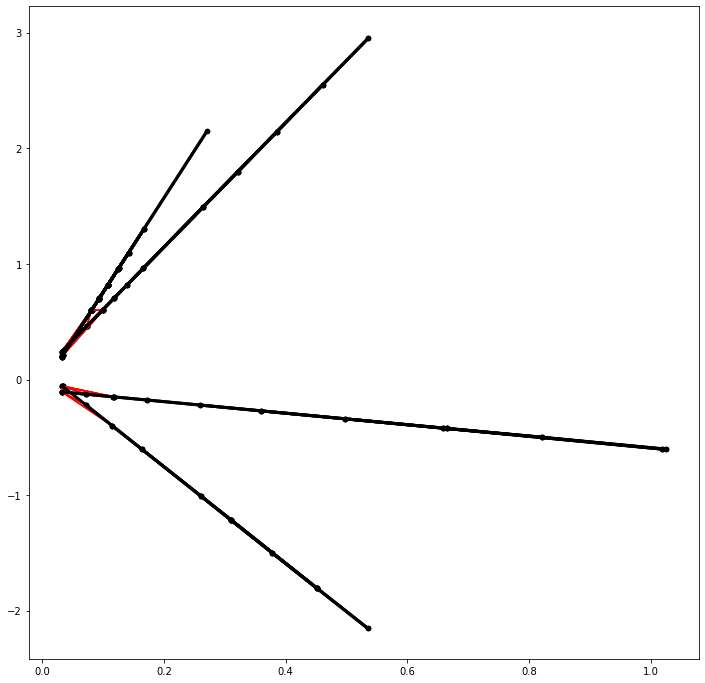

In [20]:
r, phi, z = data.x.T
pid = data.pid
plt.figure(figsize=(12,12))
for g in all_jets:
    true_g = (pid[g[0]] == pid[g[1]])
    plt.plot(r[g], z[g], c='r' );
    plt.plot(r[g[:, true_g]], z[g[:, true_g]], c='k', linewidth=3 );
    plt.scatter(r[g], z[g], c='k', s=20);

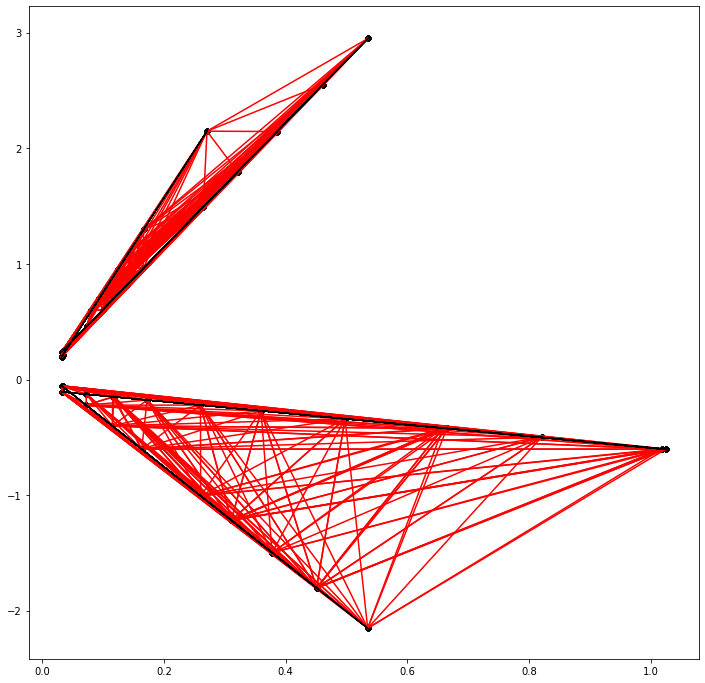

In [29]:
r, phi, z = data.x.T
pid = data.pid
plt.figure(figsize=(12,12))
for g in all_pairs:
    true_g = (pid[g[0]] == pid[g[1]])
    plt.plot(r[g[:, ~true_g]], z[g[:, ~true_g]], c='r' );
    plt.plot(r[g[:, true_g]], z[g[:, true_g]], c='k', linewidth=1 );
    plt.scatter(r[g], z[g], c='k', s=20);

In [386]:
torch.cat(all_jets, dim=-1).shape

torch.Size([2, 8849])

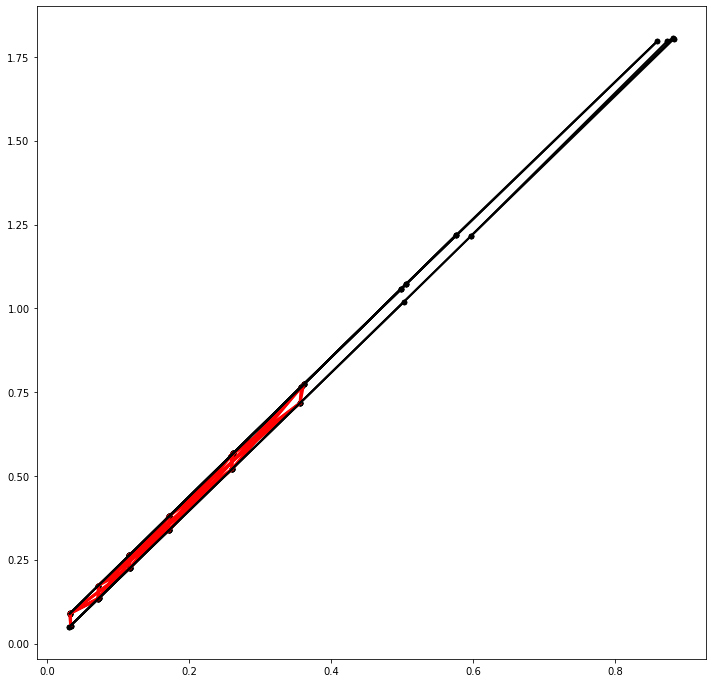

In [281]:
plt.figure(figsize=(12,12))
plt.plot(r[g1[:, ~true_g1]], z[g1[:, ~true_g1]], c='r' , linewidth=3);
plt.plot(r[g1[:, true_g1]], z[g1[:, true_g1]], c='k', linewidth=2 );
plt.scatter(r[g1], z[g1], c='k', s=20);

In [89]:
choose_subgraphs(data, 1, 5)[0].shape[1]

13129

In [78]:
n_steps = np.arange(0, 6)
for n_step in n_steps:
    sizes = []
    for data in model.trainset:
        sizes.append(choose_subgraphs(data, 1, n_step)[0].shape[1])
    print("{} steps has average size: {}".format(n_step, np.mean(sizes)))
    

0 steps has average size: 19.56
1 steps has average size: 352.69
2 steps has average size: 965.01
3 steps has average size: 1720.83
4 steps has average size: 2893.992
5 steps has average size: 3637.878


In [35]:
np.mean(sizes)

1828.16

In [33]:
np.mean(sizes)

2568.86

### Two-graph Test

In [37]:
%%time
g1, g2 = choose_subgraphs(data, 1, 2)

ValueError: not enough values to unpack (expected 2, got 1)

In [327]:
r, phi, z = data.x.T
pid = data.pid
true_g1 = (pid[g1[0]] == pid[g1[1]])
true_g2 = (pid[g2[0]] == pid[g2[1]])

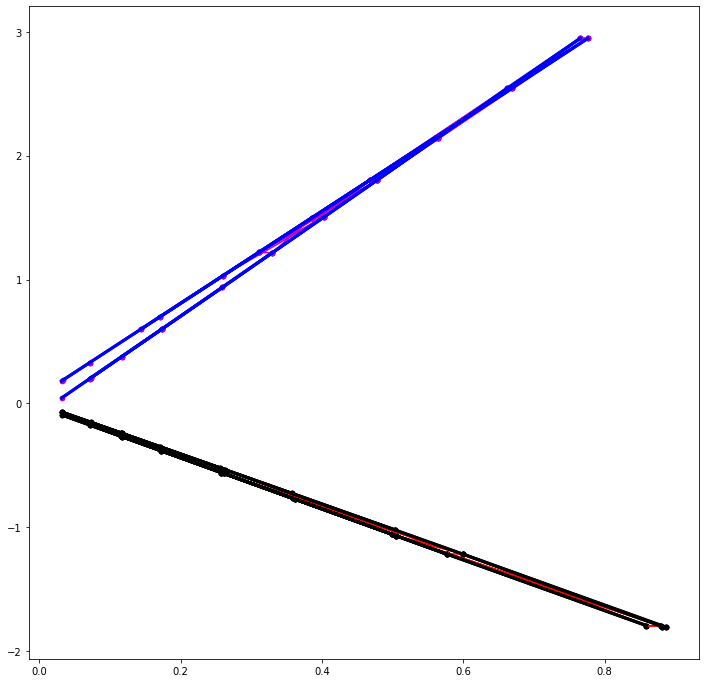

In [328]:
plt.figure(figsize=(12,12))
plt.plot(r[g1], z[g1], c='r' );
plt.plot(r[g1[:, true_g1]], z[g1[:, true_g1]], c='k', linewidth=3 );
plt.plot(r[g2], z[g2], c='m');
plt.plot(r[g2[:, true_g2]], z[g2[:, true_g2]], c='b' , linewidth=3);
plt.scatter(r[g2], z[g2], c='m', s=20);
plt.scatter(r[g1], z[g1], c='k', s=20);

### Build Dataset

In [23]:
def construct_downstream(batch, pl_module, datatype):

    data = copy.deepcopy(batch)
    
    # Remove big truth graphs, for quick loading!
    data.layerless_true_triplets=None 
    data.layerless_true_edges=None 
    data.layers=None
#     data.pid_true_edges=None 
    data.pid_true_triplets=None 
    data.true_weights=None 
    data.weights=None
    data.y=None
    
    all_jets, all_pairs = generate_jet_list(batch, 100, 2)
    data.sub_edge_index = torch.cat(all_jets, axis=-1)
    data.all_pairs = torch.cat(all_pairs, axis=-1)
    
    save_downstream(data, pl_module, datatype)

def save_downstream(batch, pl_module, datatype):

    with open(os.path.join(output_dir, datatype, batch.event_file[-4:]), 'wb') as pickle_file:
        torch.save(batch, pickle_file)

    logging.info("Saved event {} with size {} and all pairs {}".format(batch.event_file[-4:], batch.sub_edge_index.shape, batch.all_pairs.shape))

In [24]:
output_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/embedding_processed/toy_datasets/case_H2"

In [26]:
datatypes = ["train", "val", "test"]
overwrite = True
os.makedirs(output_dir, exist_ok=True)
[os.makedirs(os.path.join(output_dir, datatype), exist_ok=True) for datatype in datatypes]

[None, None, None]

In [27]:
# By default, the set of examples propagated through the pipeline will be train+val+test set
datasets = {"train": model.trainset, "val": model.valset, "test": model.testset}
total_length = sum([len(dataset) for dataset in datasets.values()])
batch_incr = 0
model.eval()
with torch.no_grad():
    for set_idx, (datatype, dataset) in enumerate(datasets.items()):
        for batch_idx, batch in enumerate(dataset):
            percent = (batch_incr / total_length) * 100
            sys.stdout.flush()
            sys.stdout.write(f'{percent:.01f}% inference complete \r')
            if (not os.path.exists(os.path.join(output_dir, datatype, batch.event_file[-4:]))) or overwrite:
                batch_to_save = copy.deepcopy(batch)
                batch_to_save = batch_to_save.to(model.device) #Is this step necessary??
                construct_downstream(batch_to_save, model, datatype)                      

            batch_incr += 1

INFO:root:Saved event 1226 with size torch.Size([2, 8358]) and all pairs torch.Size([2, 27090])


INFO:root:Saved event 1378 with size torch.Size([2, 9075]) and all pairs torch.Size([2, 26641])


INFO:root:Saved event 1584 with size torch.Size([2, 8640]) and all pairs torch.Size([2, 26539])


INFO:root:Saved event 1122 with size torch.Size([2, 8926]) and all pairs torch.Size([2, 26936])


INFO:root:Saved event 1305 with size torch.Size([2, 9389]) and all pairs torch.Size([2, 29004])


INFO:root:Saved event 1154 with size torch.Size([2, 9201]) and all pairs torch.Size([2, 27369])


INFO:root:Saved event 1271 with size torch.Size([2, 9003]) and all pairs torch.Size([2, 27184])


INFO:root:Saved event 1327 with size torch.Size([2, 8714]) and all pairs torch.Size([2, 26836])


INFO:root:Saved event 1344 with size torch.Size([2, 8984]) and all pairs torch.Size([2, 26554])


INFO:root:Saved event 1202 with size torch.Size([2, 8652]) and all pairs torch.Size([2, 26545])


INFO:root:Saved event 1503 with size torch.Size([2, 10762]) and all pairs torch.Size([2, 27956])


INFO:root:Saved event 1581 with size torch.Size([2, 9256]) and all pairs torch.Size([2, 28026])


INFO:root:Saved event 1156 with size torch.Size([2, 8915]) and all pairs torch.Size([2, 27637])


INFO:root:Saved event 1173 with size torch.Size([2, 8780]) and all pairs torch.Size([2, 26063])


INFO:root:Saved event 1191 with size torch.Size([2, 8736]) and all pairs torch.Size([2, 27419])


INFO:root:Saved event 1463 with size torch.Size([2, 8693]) and all pairs torch.Size([2, 27286])


INFO:root:Saved event 1018 with size torch.Size([2, 8657]) and all pairs torch.Size([2, 26770])


INFO:root:Saved event 1367 with size torch.Size([2, 9024]) and all pairs torch.Size([2, 26681])


INFO:root:Saved event 1020 with size torch.Size([2, 9425]) and all pairs torch.Size([2, 26544])


INFO:root:Saved event 1569 with size torch.Size([2, 8513]) and all pairs torch.Size([2, 25891])


INFO:root:Saved event 1266 with size torch.Size([2, 8691]) and all pairs torch.Size([2, 27022])


INFO:root:Saved event 1363 with size torch.Size([2, 9575]) and all pairs torch.Size([2, 27474])


INFO:root:Saved event 1039 with size torch.Size([2, 8909]) and all pairs torch.Size([2, 26483])


INFO:root:Saved event 1321 with size torch.Size([2, 9202]) and all pairs torch.Size([2, 27520])


INFO:root:Saved event 1583 with size torch.Size([2, 8860]) and all pairs torch.Size([2, 29082])


INFO:root:Saved event 1285 with size torch.Size([2, 8337]) and all pairs torch.Size([2, 25921])


INFO:root:Saved event 1300 with size torch.Size([2, 8882]) and all pairs torch.Size([2, 27658])


INFO:root:Saved event 1100 with size torch.Size([2, 9050]) and all pairs torch.Size([2, 26038])


INFO:root:Saved event 1254 with size torch.Size([2, 8925]) and all pairs torch.Size([2, 27325])


INFO:root:Saved event 1525 with size torch.Size([2, 10225]) and all pairs torch.Size([2, 28638])


INFO:root:Saved event 1240 with size torch.Size([2, 9008]) and all pairs torch.Size([2, 27788])


INFO:root:Saved event 1460 with size torch.Size([2, 9655]) and all pairs torch.Size([2, 27850])


INFO:root:Saved event 1261 with size torch.Size([2, 8941]) and all pairs torch.Size([2, 27211])


INFO:root:Saved event 1368 with size torch.Size([2, 8814]) and all pairs torch.Size([2, 28192])


INFO:root:Saved event 1051 with size torch.Size([2, 9030]) and all pairs torch.Size([2, 27515])


INFO:root:Saved event 1217 with size torch.Size([2, 9313]) and all pairs torch.Size([2, 26744])


INFO:root:Saved event 1190 with size torch.Size([2, 9479]) and all pairs torch.Size([2, 26860])


INFO:root:Saved event 1223 with size torch.Size([2, 9242]) and all pairs torch.Size([2, 26953])


INFO:root:Saved event 1177 with size torch.Size([2, 8941]) and all pairs torch.Size([2, 27318])


INFO:root:Saved event 1194 with size torch.Size([2, 7491]) and all pairs torch.Size([2, 24498])


INFO:root:Saved event 1258 with size torch.Size([2, 9164]) and all pairs torch.Size([2, 26471])


INFO:root:Saved event 1467 with size torch.Size([2, 8569]) and all pairs torch.Size([2, 27434])


INFO:root:Saved event 1011 with size torch.Size([2, 10063]) and all pairs torch.Size([2, 27636])


INFO:root:Saved event 1370 with size torch.Size([2, 8604]) and all pairs torch.Size([2, 26162])


INFO:root:Saved event 1142 with size torch.Size([2, 8481]) and all pairs torch.Size([2, 26470])


INFO:root:Saved event 1277 with size torch.Size([2, 9460]) and all pairs torch.Size([2, 26628])


INFO:root:Saved event 1179 with size torch.Size([2, 9439]) and all pairs torch.Size([2, 27041])


INFO:root:Saved event 1180 with size torch.Size([2, 10334]) and all pairs torch.Size([2, 29155])


INFO:root:Saved event 1383 with size torch.Size([2, 8486]) and all pairs torch.Size([2, 26246])


INFO:root:Saved event 1548 with size torch.Size([2, 8556]) and all pairs torch.Size([2, 27106])


INFO:root:Saved event 1385 with size torch.Size([2, 8647]) and all pairs torch.Size([2, 26118])


INFO:root:Saved event 1212 with size torch.Size([2, 9199]) and all pairs torch.Size([2, 27079])


INFO:root:Saved event 1273 with size torch.Size([2, 9289]) and all pairs torch.Size([2, 27393])


INFO:root:Saved event 1316 with size torch.Size([2, 8664]) and all pairs torch.Size([2, 26922])


INFO:root:Saved event 1111 with size torch.Size([2, 9119]) and all pairs torch.Size([2, 26477])


INFO:root:Saved event 1280 with size torch.Size([2, 8882]) and all pairs torch.Size([2, 26955])


INFO:root:Saved event 1104 with size torch.Size([2, 9859]) and all pairs torch.Size([2, 29213])


INFO:root:Saved event 1464 with size torch.Size([2, 8952]) and all pairs torch.Size([2, 26041])


INFO:root:Saved event 1023 with size torch.Size([2, 9308]) and all pairs torch.Size([2, 26657])


INFO:root:Saved event 1125 with size torch.Size([2, 9411]) and all pairs torch.Size([2, 27925])


INFO:root:Saved event 1138 with size torch.Size([2, 9048]) and all pairs torch.Size([2, 26456])


INFO:root:Saved event 1078 with size torch.Size([2, 9481]) and all pairs torch.Size([2, 27351])


INFO:root:Saved event 1028 with size torch.Size([2, 9630]) and all pairs torch.Size([2, 27150])


INFO:root:Saved event 1076 with size torch.Size([2, 9028]) and all pairs torch.Size([2, 27403])


INFO:root:Saved event 1332 with size torch.Size([2, 9318]) and all pairs torch.Size([2, 27173])


INFO:root:Saved event 1056 with size torch.Size([2, 9313]) and all pairs torch.Size([2, 25994])


INFO:root:Saved event 1343 with size torch.Size([2, 9979]) and all pairs torch.Size([2, 27233])


INFO:root:Saved event 1239 with size torch.Size([2, 9611]) and all pairs torch.Size([2, 29194])


INFO:root:Saved event 1366 with size torch.Size([2, 8584]) and all pairs torch.Size([2, 26550])


INFO:root:Saved event 1339 with size torch.Size([2, 8807]) and all pairs torch.Size([2, 27567])


INFO:root:Saved event 1126 with size torch.Size([2, 9931]) and all pairs torch.Size([2, 27632])


INFO:root:Saved event 1219 with size torch.Size([2, 9150]) and all pairs torch.Size([2, 26462])


INFO:root:Saved event 1021 with size torch.Size([2, 9529]) and all pairs torch.Size([2, 27001])


INFO:root:Saved event 1012 with size torch.Size([2, 9474]) and all pairs torch.Size([2, 27763])


INFO:root:Saved event 1504 with size torch.Size([2, 10643]) and all pairs torch.Size([2, 28176])


INFO:root:Saved event 1574 with size torch.Size([2, 8992]) and all pairs torch.Size([2, 28398])


INFO:root:Saved event 1093 with size torch.Size([2, 9050]) and all pairs torch.Size([2, 27228])


INFO:root:Saved event 1546 with size torch.Size([2, 8656]) and all pairs torch.Size([2, 26834])


INFO:root:Saved event 1319 with size torch.Size([2, 9093]) and all pairs torch.Size([2, 27328])


INFO:root:Saved event 1259 with size torch.Size([2, 9939]) and all pairs torch.Size([2, 27317])


INFO:root:Saved event 1346 with size torch.Size([2, 9077]) and all pairs torch.Size([2, 25957])


INFO:root:Saved event 1543 with size torch.Size([2, 8740]) and all pairs torch.Size([2, 26575])


INFO:root:Saved event 1474 with size torch.Size([2, 9374]) and all pairs torch.Size([2, 28025])


INFO:root:Saved event 1523 with size torch.Size([2, 8260]) and all pairs torch.Size([2, 25992])


INFO:root:Saved event 1036 with size torch.Size([2, 9156]) and all pairs torch.Size([2, 27422])


INFO:root:Saved event 1326 with size torch.Size([2, 9249]) and all pairs torch.Size([2, 27069])


INFO:root:Saved event 1310 with size torch.Size([2, 9122]) and all pairs torch.Size([2, 25746])


INFO:root:Saved event 1131 with size torch.Size([2, 8493]) and all pairs torch.Size([2, 27556])


INFO:root:Saved event 1493 with size torch.Size([2, 9676]) and all pairs torch.Size([2, 27595])


INFO:root:Saved event 1272 with size torch.Size([2, 9624]) and all pairs torch.Size([2, 27250])


INFO:root:Saved event 1380 with size torch.Size([2, 9384]) and all pairs torch.Size([2, 27332])


INFO:root:Saved event 1117 with size torch.Size([2, 9551]) and all pairs torch.Size([2, 27828])


INFO:root:Saved event 1566 with size torch.Size([2, 9157]) and all pairs torch.Size([2, 27355])


INFO:root:Saved event 1585 with size torch.Size([2, 10021]) and all pairs torch.Size([2, 28283])


INFO:root:Saved event 1137 with size torch.Size([2, 9126]) and all pairs torch.Size([2, 27587])


INFO:root:Saved event 1461 with size torch.Size([2, 8806]) and all pairs torch.Size([2, 28095])


INFO:root:Saved event 1197 with size torch.Size([2, 8886]) and all pairs torch.Size([2, 26798])


INFO:root:Saved event 1462 with size torch.Size([2, 9065]) and all pairs torch.Size([2, 26482])


INFO:root:Saved event 1044 with size torch.Size([2, 8705]) and all pairs torch.Size([2, 26763])


INFO:root:Saved event 1499 with size torch.Size([2, 8561]) and all pairs torch.Size([2, 26087])


INFO:root:Saved event 1485 with size torch.Size([2, 9560]) and all pairs torch.Size([2, 27240])


INFO:root:Saved event 1531 with size torch.Size([2, 9193]) and all pairs torch.Size([2, 27202])


INFO:root:Saved event 1022 with size torch.Size([2, 8556]) and all pairs torch.Size([2, 26548])


INFO:root:Saved event 1329 with size torch.Size([2, 9229]) and all pairs torch.Size([2, 27624])


INFO:root:Saved event 1480 with size torch.Size([2, 9090]) and all pairs torch.Size([2, 27880])


INFO:root:Saved event 1306 with size torch.Size([2, 9150]) and all pairs torch.Size([2, 27254])


INFO:root:Saved event 1120 with size torch.Size([2, 9115]) and all pairs torch.Size([2, 26828])


INFO:root:Saved event 1530 with size torch.Size([2, 9035]) and all pairs torch.Size([2, 27540])


INFO:root:Saved event 1491 with size torch.Size([2, 9606]) and all pairs torch.Size([2, 28033])


INFO:root:Saved event 1249 with size torch.Size([2, 9329]) and all pairs torch.Size([2, 27095])


INFO:root:Saved event 1299 with size torch.Size([2, 8873]) and all pairs torch.Size([2, 28155])


INFO:root:Saved event 1283 with size torch.Size([2, 9245]) and all pairs torch.Size([2, 26260])


INFO:root:Saved event 1563 with size torch.Size([2, 9711]) and all pairs torch.Size([2, 27953])


INFO:root:Saved event 1519 with size torch.Size([2, 9303]) and all pairs torch.Size([2, 28459])


INFO:root:Saved event 1388 with size torch.Size([2, 9073]) and all pairs torch.Size([2, 26722])


INFO:root:Saved event 1336 with size torch.Size([2, 9454]) and all pairs torch.Size([2, 27268])


INFO:root:Saved event 1473 with size torch.Size([2, 8810]) and all pairs torch.Size([2, 26514])


INFO:root:Saved event 1075 with size torch.Size([2, 8597]) and all pairs torch.Size([2, 26826])


INFO:root:Saved event 1498 with size torch.Size([2, 8914]) and all pairs torch.Size([2, 27411])


INFO:root:Saved event 1549 with size torch.Size([2, 9368]) and all pairs torch.Size([2, 28085])


INFO:root:Saved event 1166 with size torch.Size([2, 8823]) and all pairs torch.Size([2, 26736])


INFO:root:Saved event 1002 with size torch.Size([2, 8840]) and all pairs torch.Size([2, 26559])


INFO:root:Saved event 1341 with size torch.Size([2, 8783]) and all pairs torch.Size([2, 27405])


INFO:root:Saved event 1562 with size torch.Size([2, 9293]) and all pairs torch.Size([2, 27559])


INFO:root:Saved event 1141 with size torch.Size([2, 8013]) and all pairs torch.Size([2, 26339])


INFO:root:Saved event 1522 with size torch.Size([2, 9172]) and all pairs torch.Size([2, 27057])


INFO:root:Saved event 1132 with size torch.Size([2, 8900]) and all pairs torch.Size([2, 27364])


INFO:root:Saved event 1048 with size torch.Size([2, 9624]) and all pairs torch.Size([2, 28451])


INFO:root:Saved event 1119 with size torch.Size([2, 8793]) and all pairs torch.Size([2, 27971])


INFO:root:Saved event 1015 with size torch.Size([2, 8051]) and all pairs torch.Size([2, 27070])


INFO:root:Saved event 1229 with size torch.Size([2, 9381]) and all pairs torch.Size([2, 27062])


INFO:root:Saved event 1298 with size torch.Size([2, 9657]) and all pairs torch.Size([2, 27587])


INFO:root:Saved event 1377 with size torch.Size([2, 9894]) and all pairs torch.Size([2, 28045])


INFO:root:Saved event 1328 with size torch.Size([2, 9479]) and all pairs torch.Size([2, 28229])


INFO:root:Saved event 1233 with size torch.Size([2, 8567]) and all pairs torch.Size([2, 26338])


INFO:root:Saved event 1256 with size torch.Size([2, 9825]) and all pairs torch.Size([2, 27584])


INFO:root:Saved event 1398 with size torch.Size([2, 8872]) and all pairs torch.Size([2, 26919])


INFO:root:Saved event 1365 with size torch.Size([2, 9487]) and all pairs torch.Size([2, 27883])


INFO:root:Saved event 1308 with size torch.Size([2, 10174]) and all pairs torch.Size([2, 28503])


INFO:root:Saved event 1164 with size torch.Size([2, 9210]) and all pairs torch.Size([2, 26138])


INFO:root:Saved event 1227 with size torch.Size([2, 10165]) and all pairs torch.Size([2, 27127])


INFO:root:Saved event 1027 with size torch.Size([2, 9652]) and all pairs torch.Size([2, 27280])


INFO:root:Saved event 1187 with size torch.Size([2, 9099]) and all pairs torch.Size([2, 27673])


INFO:root:Saved event 1188 with size torch.Size([2, 9246]) and all pairs torch.Size([2, 28828])


INFO:root:Saved event 1533 with size torch.Size([2, 8709]) and all pairs torch.Size([2, 26417])


INFO:root:Saved event 1095 with size torch.Size([2, 9219]) and all pairs torch.Size([2, 27208])


INFO:root:Saved event 1061 with size torch.Size([2, 9136]) and all pairs torch.Size([2, 27173])


INFO:root:Saved event 1382 with size torch.Size([2, 8704]) and all pairs torch.Size([2, 27171])


INFO:root:Saved event 1064 with size torch.Size([2, 9935]) and all pairs torch.Size([2, 28017])


INFO:root:Saved event 1553 with size torch.Size([2, 8803]) and all pairs torch.Size([2, 27180])


INFO:root:Saved event 1247 with size torch.Size([2, 9164]) and all pairs torch.Size([2, 27553])


INFO:root:Saved event 1264 with size torch.Size([2, 9137]) and all pairs torch.Size([2, 27837])


INFO:root:Saved event 1222 with size torch.Size([2, 9816]) and all pairs torch.Size([2, 27282])


INFO:root:Saved event 1345 with size torch.Size([2, 8661]) and all pairs torch.Size([2, 26175])


INFO:root:Saved event 1282 with size torch.Size([2, 8687]) and all pairs torch.Size([2, 26532])


INFO:root:Saved event 1526 with size torch.Size([2, 8191]) and all pairs torch.Size([2, 27488])


INFO:root:Saved event 1143 with size torch.Size([2, 8942]) and all pairs torch.Size([2, 27045])


INFO:root:Saved event 1080 with size torch.Size([2, 9283]) and all pairs torch.Size([2, 27737])


INFO:root:Saved event 1324 with size torch.Size([2, 9571]) and all pairs torch.Size([2, 27992])


INFO:root:Saved event 1001 with size torch.Size([2, 8576]) and all pairs torch.Size([2, 25977])


INFO:root:Saved event 1196 with size torch.Size([2, 9203]) and all pairs torch.Size([2, 26656])


INFO:root:Saved event 1494 with size torch.Size([2, 8528]) and all pairs torch.Size([2, 26695])


INFO:root:Saved event 1153 with size torch.Size([2, 9137]) and all pairs torch.Size([2, 26822])


INFO:root:Saved event 1199 with size torch.Size([2, 8786]) and all pairs torch.Size([2, 26910])


INFO:root:Saved event 1060 with size torch.Size([2, 9297]) and all pairs torch.Size([2, 27957])


INFO:root:Saved event 1161 with size torch.Size([2, 9477]) and all pairs torch.Size([2, 26342])


INFO:root:Saved event 1374 with size torch.Size([2, 9256]) and all pairs torch.Size([2, 27131])


INFO:root:Saved event 1084 with size torch.Size([2, 8743]) and all pairs torch.Size([2, 27010])


INFO:root:Saved event 1183 with size torch.Size([2, 8956]) and all pairs torch.Size([2, 28424])


INFO:root:Saved event 1351 with size torch.Size([2, 8011]) and all pairs torch.Size([2, 25832])


INFO:root:Saved event 1113 with size torch.Size([2, 8910]) and all pairs torch.Size([2, 26682])


INFO:root:Saved event 1046 with size torch.Size([2, 10007]) and all pairs torch.Size([2, 27610])


INFO:root:Saved event 1350 with size torch.Size([2, 8711]) and all pairs torch.Size([2, 27329])


INFO:root:Saved event 1008 with size torch.Size([2, 9696]) and all pairs torch.Size([2, 28897])


INFO:root:Saved event 1477 with size torch.Size([2, 9829]) and all pairs torch.Size([2, 27627])


INFO:root:Saved event 1149 with size torch.Size([2, 9542]) and all pairs torch.Size([2, 27275])


INFO:root:Saved event 1167 with size torch.Size([2, 10251]) and all pairs torch.Size([2, 28496])


INFO:root:Saved event 1455 with size torch.Size([2, 8469]) and all pairs torch.Size([2, 26684])


INFO:root:Saved event 1500 with size torch.Size([2, 8638]) and all pairs torch.Size([2, 26410])


INFO:root:Saved event 1260 with size torch.Size([2, 10446]) and all pairs torch.Size([2, 30227])


INFO:root:Saved event 1304 with size torch.Size([2, 10416]) and all pairs torch.Size([2, 27672])


INFO:root:Saved event 1539 with size torch.Size([2, 9513]) and all pairs torch.Size([2, 27553])


INFO:root:Saved event 1270 with size torch.Size([2, 9375]) and all pairs torch.Size([2, 27178])


INFO:root:Saved event 1518 with size torch.Size([2, 8421]) and all pairs torch.Size([2, 26497])


INFO:root:Saved event 1086 with size torch.Size([2, 9340]) and all pairs torch.Size([2, 26642])


INFO:root:Saved event 1244 with size torch.Size([2, 8705]) and all pairs torch.Size([2, 26295])


INFO:root:Saved event 1547 with size torch.Size([2, 8915]) and all pairs torch.Size([2, 28076])


INFO:root:Saved event 1293 with size torch.Size([2, 9271]) and all pairs torch.Size([2, 27604])


INFO:root:Saved event 1225 with size torch.Size([2, 9616]) and all pairs torch.Size([2, 27108])


INFO:root:Saved event 1148 with size torch.Size([2, 8544]) and all pairs torch.Size([2, 27213])


INFO:root:Saved event 1476 with size torch.Size([2, 9301]) and all pairs torch.Size([2, 27834])


INFO:root:Saved event 1389 with size torch.Size([2, 8434]) and all pairs torch.Size([2, 26176])


INFO:root:Saved event 1492 with size torch.Size([2, 8609]) and all pairs torch.Size([2, 26685])


INFO:root:Saved event 1079 with size torch.Size([2, 8606]) and all pairs torch.Size([2, 26618])


INFO:root:Saved event 1158 with size torch.Size([2, 9818]) and all pairs torch.Size([2, 27923])


INFO:root:Saved event 1269 with size torch.Size([2, 9402]) and all pairs torch.Size([2, 27564])


INFO:root:Saved event 1032 with size torch.Size([2, 8101]) and all pairs torch.Size([2, 26506])


INFO:root:Saved event 1513 with size torch.Size([2, 9115]) and all pairs torch.Size([2, 27420])


INFO:root:Saved event 1384 with size torch.Size([2, 8929]) and all pairs torch.Size([2, 26924])


INFO:root:Saved event 1096 with size torch.Size([2, 9863]) and all pairs torch.Size([2, 27460])


INFO:root:Saved event 1354 with size torch.Size([2, 9068]) and all pairs torch.Size([2, 27093])


INFO:root:Saved event 1482 with size torch.Size([2, 9072]) and all pairs torch.Size([2, 26264])


INFO:root:Saved event 1358 with size torch.Size([2, 9055]) and all pairs torch.Size([2, 26987])


INFO:root:Saved event 1302 with size torch.Size([2, 8694]) and all pairs torch.Size([2, 27251])


INFO:root:Saved event 1123 with size torch.Size([2, 8720]) and all pairs torch.Size([2, 26968])


INFO:root:Saved event 1152 with size torch.Size([2, 9195]) and all pairs torch.Size([2, 27422])


INFO:root:Saved event 1251 with size torch.Size([2, 9031]) and all pairs torch.Size([2, 26002])


INFO:root:Saved event 1178 with size torch.Size([2, 10122]) and all pairs torch.Size([2, 28590])


INFO:root:Saved event 1238 with size torch.Size([2, 9712]) and all pairs torch.Size([2, 26683])


INFO:root:Saved event 1488 with size torch.Size([2, 9930]) and all pairs torch.Size([2, 28679])


INFO:root:Saved event 1181 with size torch.Size([2, 8584]) and all pairs torch.Size([2, 28208])


INFO:root:Saved event 1053 with size torch.Size([2, 8464]) and all pairs torch.Size([2, 26930])


INFO:root:Saved event 1573 with size torch.Size([2, 9248]) and all pairs torch.Size([2, 26546])


INFO:root:Saved event 1349 with size torch.Size([2, 8692]) and all pairs torch.Size([2, 27815])


INFO:root:Saved event 1045 with size torch.Size([2, 9584]) and all pairs torch.Size([2, 27504])


INFO:root:Saved event 1528 with size torch.Size([2, 9004]) and all pairs torch.Size([2, 27304])


INFO:root:Saved event 1275 with size torch.Size([2, 9732]) and all pairs torch.Size([2, 27990])


INFO:root:Saved event 1571 with size torch.Size([2, 8626]) and all pairs torch.Size([2, 25097])


INFO:root:Saved event 1069 with size torch.Size([2, 8775]) and all pairs torch.Size([2, 27156])


INFO:root:Saved event 1394 with size torch.Size([2, 9838]) and all pairs torch.Size([2, 28993])


INFO:root:Saved event 1109 with size torch.Size([2, 9425]) and all pairs torch.Size([2, 27140])


INFO:root:Saved event 1204 with size torch.Size([2, 8510]) and all pairs torch.Size([2, 26770])


INFO:root:Saved event 1130 with size torch.Size([2, 9351]) and all pairs torch.Size([2, 27983])


INFO:root:Saved event 1505 with size torch.Size([2, 9328]) and all pairs torch.Size([2, 27537])


INFO:root:Saved event 1311 with size torch.Size([2, 9280]) and all pairs torch.Size([2, 27797])


INFO:root:Saved event 1516 with size torch.Size([2, 9483]) and all pairs torch.Size([2, 28116])


INFO:root:Saved event 1034 with size torch.Size([2, 9171]) and all pairs torch.Size([2, 27226])


INFO:root:Saved event 1496 with size torch.Size([2, 10121]) and all pairs torch.Size([2, 28231])


INFO:root:Saved event 1520 with size torch.Size([2, 9172]) and all pairs torch.Size([2, 27048])


INFO:root:Saved event 1578 with size torch.Size([2, 9811]) and all pairs torch.Size([2, 27879])


INFO:root:Saved event 1070 with size torch.Size([2, 9452]) and all pairs torch.Size([2, 26856])


INFO:root:Saved event 1150 with size torch.Size([2, 9300]) and all pairs torch.Size([2, 27024])


INFO:root:Saved event 1201 with size torch.Size([2, 9336]) and all pairs torch.Size([2, 26476])


INFO:root:Saved event 1228 with size torch.Size([2, 9805]) and all pairs torch.Size([2, 27850])


INFO:root:Saved event 1206 with size torch.Size([2, 9257]) and all pairs torch.Size([2, 27096])


INFO:root:Saved event 1466 with size torch.Size([2, 10698]) and all pairs torch.Size([2, 28386])


INFO:root:Saved event 1287 with size torch.Size([2, 9951]) and all pairs torch.Size([2, 27994])


INFO:root:Saved event 1091 with size torch.Size([2, 10122]) and all pairs torch.Size([2, 27418])


INFO:root:Saved event 1361 with size torch.Size([2, 8914]) and all pairs torch.Size([2, 27590])


INFO:root:Saved event 1092 with size torch.Size([2, 8853]) and all pairs torch.Size([2, 27366])


INFO:root:Saved event 1114 with size torch.Size([2, 10723]) and all pairs torch.Size([2, 28303])


INFO:root:Saved event 1146 with size torch.Size([2, 8640]) and all pairs torch.Size([2, 27843])


INFO:root:Saved event 1112 with size torch.Size([2, 8569]) and all pairs torch.Size([2, 27151])


INFO:root:Saved event 1105 with size torch.Size([2, 8204]) and all pairs torch.Size([2, 26802])


INFO:root:Saved event 1313 with size torch.Size([2, 9715]) and all pairs torch.Size([2, 26762])


INFO:root:Saved event 1185 with size torch.Size([2, 7913]) and all pairs torch.Size([2, 25908])


INFO:root:Saved event 1145 with size torch.Size([2, 9470]) and all pairs torch.Size([2, 27245])


INFO:root:Saved event 1220 with size torch.Size([2, 9404]) and all pairs torch.Size([2, 27042])


INFO:root:Saved event 1589 with size torch.Size([2, 9086]) and all pairs torch.Size([2, 27856])


INFO:root:Saved event 1207 with size torch.Size([2, 8725]) and all pairs torch.Size([2, 28095])


INFO:root:Saved event 1330 with size torch.Size([2, 9347]) and all pairs torch.Size([2, 27864])


INFO:root:Saved event 1007 with size torch.Size([2, 8591]) and all pairs torch.Size([2, 26827])


INFO:root:Saved event 1458 with size torch.Size([2, 10202]) and all pairs torch.Size([2, 27660])


INFO:root:Saved event 1234 with size torch.Size([2, 9929]) and all pairs torch.Size([2, 28887])


INFO:root:Saved event 1532 with size torch.Size([2, 8936]) and all pairs torch.Size([2, 26768])


INFO:root:Saved event 1540 with size torch.Size([2, 9153]) and all pairs torch.Size([2, 27364])


INFO:root:Saved event 1537 with size torch.Size([2, 9290]) and all pairs torch.Size([2, 27812])


INFO:root:Saved event 1556 with size torch.Size([2, 8671]) and all pairs torch.Size([2, 25769])


INFO:root:Saved event 1517 with size torch.Size([2, 9626]) and all pairs torch.Size([2, 28131])


INFO:root:Saved event 1322 with size torch.Size([2, 9291]) and all pairs torch.Size([2, 27459])


INFO:root:Saved event 1386 with size torch.Size([2, 8607]) and all pairs torch.Size([2, 27509])


INFO:root:Saved event 1037 with size torch.Size([2, 8686]) and all pairs torch.Size([2, 26775])


INFO:root:Saved event 1208 with size torch.Size([2, 9875]) and all pairs torch.Size([2, 28572])


INFO:root:Saved event 1337 with size torch.Size([2, 9111]) and all pairs torch.Size([2, 26903])


INFO:root:Saved event 1396 with size torch.Size([2, 9224]) and all pairs torch.Size([2, 27402])


INFO:root:Saved event 1291 with size torch.Size([2, 8401]) and all pairs torch.Size([2, 27231])


INFO:root:Saved event 1250 with size torch.Size([2, 8147]) and all pairs torch.Size([2, 26347])


INFO:root:Saved event 1497 with size torch.Size([2, 8940]) and all pairs torch.Size([2, 26581])


INFO:root:Saved event 1147 with size torch.Size([2, 8276]) and all pairs torch.Size([2, 26301])


INFO:root:Saved event 1088 with size torch.Size([2, 8892]) and all pairs torch.Size([2, 27856])


INFO:root:Saved event 1375 with size torch.Size([2, 9633]) and all pairs torch.Size([2, 26409])


INFO:root:Saved event 1315 with size torch.Size([2, 8395]) and all pairs torch.Size([2, 26496])


INFO:root:Saved event 1484 with size torch.Size([2, 8739]) and all pairs torch.Size([2, 26929])


INFO:root:Saved event 1124 with size torch.Size([2, 9615]) and all pairs torch.Size([2, 27661])


INFO:root:Saved event 1099 with size torch.Size([2, 9308]) and all pairs torch.Size([2, 27768])


INFO:root:Saved event 1529 with size torch.Size([2, 8933]) and all pairs torch.Size([2, 27229])


INFO:root:Saved event 1215 with size torch.Size([2, 9256]) and all pairs torch.Size([2, 27139])


INFO:root:Saved event 1362 with size torch.Size([2, 8775]) and all pairs torch.Size([2, 27124])


INFO:root:Saved event 1559 with size torch.Size([2, 9211]) and all pairs torch.Size([2, 28005])


INFO:root:Saved event 1307 with size torch.Size([2, 9307]) and all pairs torch.Size([2, 27936])


INFO:root:Saved event 1063 with size torch.Size([2, 9625]) and all pairs torch.Size([2, 26859])


INFO:root:Saved event 1110 with size torch.Size([2, 8414]) and all pairs torch.Size([2, 26078])


INFO:root:Saved event 1353 with size torch.Size([2, 8863]) and all pairs torch.Size([2, 26627])


INFO:root:Saved event 1501 with size torch.Size([2, 9209]) and all pairs torch.Size([2, 26288])


INFO:root:Saved event 1392 with size torch.Size([2, 8803]) and all pairs torch.Size([2, 27450])


INFO:root:Saved event 1479 with size torch.Size([2, 8530]) and all pairs torch.Size([2, 27637])


INFO:root:Saved event 1565 with size torch.Size([2, 8637]) and all pairs torch.Size([2, 26155])


INFO:root:Saved event 1103 with size torch.Size([2, 9968]) and all pairs torch.Size([2, 28934])


INFO:root:Saved event 1087 with size torch.Size([2, 8704]) and all pairs torch.Size([2, 26906])


INFO:root:Saved event 1052 with size torch.Size([2, 8846]) and all pairs torch.Size([2, 27655])


INFO:root:Saved event 1395 with size torch.Size([2, 7681]) and all pairs torch.Size([2, 26124])


INFO:root:Saved event 1118 with size torch.Size([2, 9741]) and all pairs torch.Size([2, 28105])


INFO:root:Saved event 1286 with size torch.Size([2, 9288]) and all pairs torch.Size([2, 27728])


INFO:root:Saved event 1276 with size torch.Size([2, 8272]) and all pairs torch.Size([2, 25825])


INFO:root:Saved event 1163 with size torch.Size([2, 9108]) and all pairs torch.Size([2, 27516])


INFO:root:Saved event 1552 with size torch.Size([2, 9670]) and all pairs torch.Size([2, 27070])


INFO:root:Saved event 1576 with size torch.Size([2, 9067]) and all pairs torch.Size([2, 26903])


INFO:root:Saved event 1267 with size torch.Size([2, 9169]) and all pairs torch.Size([2, 28575])


INFO:root:Saved event 1465 with size torch.Size([2, 10211]) and all pairs torch.Size([2, 27146])


INFO:root:Saved event 1176 with size torch.Size([2, 9058]) and all pairs torch.Size([2, 27345])


INFO:root:Saved event 1359 with size torch.Size([2, 9090]) and all pairs torch.Size([2, 27906])


INFO:root:Saved event 1295 with size torch.Size([2, 8484]) and all pairs torch.Size([2, 26698])


INFO:root:Saved event 1296 with size torch.Size([2, 10286]) and all pairs torch.Size([2, 27145])


INFO:root:Saved event 1211 with size torch.Size([2, 8448]) and all pairs torch.Size([2, 26877])


INFO:root:Saved event 1205 with size torch.Size([2, 9439]) and all pairs torch.Size([2, 26323])


INFO:root:Saved event 1391 with size torch.Size([2, 8120]) and all pairs torch.Size([2, 25988])


INFO:root:Saved event 1071 with size torch.Size([2, 9723]) and all pairs torch.Size([2, 27899])


INFO:root:Saved event 1085 with size torch.Size([2, 10189]) and all pairs torch.Size([2, 28980])


INFO:root:Saved event 1369 with size torch.Size([2, 8604]) and all pairs torch.Size([2, 26696])


INFO:root:Saved event 1184 with size torch.Size([2, 9224]) and all pairs torch.Size([2, 27566])


INFO:root:Saved event 1469 with size torch.Size([2, 9777]) and all pairs torch.Size([2, 29019])


INFO:root:Saved event 1561 with size torch.Size([2, 8603]) and all pairs torch.Size([2, 26964])


INFO:root:Saved event 1564 with size torch.Size([2, 9218]) and all pairs torch.Size([2, 27434])


INFO:root:Saved event 1236 with size torch.Size([2, 8351]) and all pairs torch.Size([2, 27150])


INFO:root:Saved event 1509 with size torch.Size([2, 9552]) and all pairs torch.Size([2, 27203])


INFO:root:Saved event 1175 with size torch.Size([2, 10341]) and all pairs torch.Size([2, 27827])


INFO:root:Saved event 1555 with size torch.Size([2, 8494]) and all pairs torch.Size([2, 26618])


INFO:root:Saved event 1068 with size torch.Size([2, 9097]) and all pairs torch.Size([2, 26857])


INFO:root:Saved event 1231 with size torch.Size([2, 9167]) and all pairs torch.Size([2, 27428])


INFO:root:Saved event 1356 with size torch.Size([2, 8579]) and all pairs torch.Size([2, 27199])


INFO:root:Saved event 1544 with size torch.Size([2, 8674]) and all pairs torch.Size([2, 26118])


INFO:root:Saved event 1393 with size torch.Size([2, 8790]) and all pairs torch.Size([2, 26351])


INFO:root:Saved event 1108 with size torch.Size([2, 9183]) and all pairs torch.Size([2, 26499])


INFO:root:Saved event 1253 with size torch.Size([2, 9413]) and all pairs torch.Size([2, 28021])


INFO:root:Saved event 1289 with size torch.Size([2, 8595]) and all pairs torch.Size([2, 26280])


INFO:root:Saved event 1524 with size torch.Size([2, 9224]) and all pairs torch.Size([2, 27635])


INFO:root:Saved event 1016 with size torch.Size([2, 9119]) and all pairs torch.Size([2, 26469])


INFO:root:Saved event 1169 with size torch.Size([2, 10423]) and all pairs torch.Size([2, 29473])


INFO:root:Saved event 1232 with size torch.Size([2, 9217]) and all pairs torch.Size([2, 28670])


INFO:root:Saved event 1364 with size torch.Size([2, 9081]) and all pairs torch.Size([2, 27236])


INFO:root:Saved event 1487 with size torch.Size([2, 8836]) and all pairs torch.Size([2, 27597])


INFO:root:Saved event 1309 with size torch.Size([2, 8815]) and all pairs torch.Size([2, 25940])


INFO:root:Saved event 1189 with size torch.Size([2, 9318]) and all pairs torch.Size([2, 27269])


INFO:root:Saved event 1376 with size torch.Size([2, 8871]) and all pairs torch.Size([2, 26173])


INFO:root:Saved event 1136 with size torch.Size([2, 9824]) and all pairs torch.Size([2, 27769])


INFO:root:Saved event 1453 with size torch.Size([2, 8880]) and all pairs torch.Size([2, 28087])


INFO:root:Saved event 1127 with size torch.Size([2, 8458]) and all pairs torch.Size([2, 25386])


INFO:root:Saved event 1333 with size torch.Size([2, 9265]) and all pairs torch.Size([2, 27110])


INFO:root:Saved event 1451 with size torch.Size([2, 10008]) and all pairs torch.Size([2, 27621])


INFO:root:Saved event 1139 with size torch.Size([2, 8596]) and all pairs torch.Size([2, 27102])


INFO:root:Saved event 1017 with size torch.Size([2, 9184]) and all pairs torch.Size([2, 27453])


INFO:root:Saved event 1246 with size torch.Size([2, 8865]) and all pairs torch.Size([2, 28141])


INFO:root:Saved event 1551 with size torch.Size([2, 9066]) and all pairs torch.Size([2, 27576])


INFO:root:Saved event 1106 with size torch.Size([2, 8393]) and all pairs torch.Size([2, 26002])


INFO:root:Saved event 1318 with size torch.Size([2, 8779]) and all pairs torch.Size([2, 27684])


INFO:root:Saved event 1151 with size torch.Size([2, 9616]) and all pairs torch.Size([2, 26696])


INFO:root:Saved event 1352 with size torch.Size([2, 9087]) and all pairs torch.Size([2, 27417])


INFO:root:Saved event 1055 with size torch.Size([2, 8722]) and all pairs torch.Size([2, 26523])


INFO:root:Saved event 1195 with size torch.Size([2, 8635]) and all pairs torch.Size([2, 26243])


INFO:root:Saved event 1470 with size torch.Size([2, 7599]) and all pairs torch.Size([2, 25464])


INFO:root:Saved event 1572 with size torch.Size([2, 9859]) and all pairs torch.Size([2, 26521])


INFO:root:Saved event 1182 with size torch.Size([2, 9971]) and all pairs torch.Size([2, 28450])


INFO:root:Saved event 1098 with size torch.Size([2, 9407]) and all pairs torch.Size([2, 28119])


INFO:root:Saved event 1241 with size torch.Size([2, 8960]) and all pairs torch.Size([2, 26508])


INFO:root:Saved event 1262 with size torch.Size([2, 10158]) and all pairs torch.Size([2, 27052])


INFO:root:Saved event 1481 with size torch.Size([2, 9605]) and all pairs torch.Size([2, 29068])


INFO:root:Saved event 1265 with size torch.Size([2, 8029]) and all pairs torch.Size([2, 26977])


INFO:root:Saved event 1371 with size torch.Size([2, 9896]) and all pairs torch.Size([2, 27552])


INFO:root:Saved event 1347 with size torch.Size([2, 9522]) and all pairs torch.Size([2, 26764])


INFO:root:Saved event 1248 with size torch.Size([2, 9322]) and all pairs torch.Size([2, 27247])


INFO:root:Saved event 1005 with size torch.Size([2, 8810]) and all pairs torch.Size([2, 27484])


INFO:root:Saved event 1478 with size torch.Size([2, 8666]) and all pairs torch.Size([2, 26026])


INFO:root:Saved event 1218 with size torch.Size([2, 8486]) and all pairs torch.Size([2, 26732])


INFO:root:Saved event 1320 with size torch.Size([2, 8309]) and all pairs torch.Size([2, 27494])


INFO:root:Saved event 1042 with size torch.Size([2, 8946]) and all pairs torch.Size([2, 26944])


INFO:root:Saved event 1521 with size torch.Size([2, 8350]) and all pairs torch.Size([2, 26080])


INFO:root:Saved event 1040 with size torch.Size([2, 9147]) and all pairs torch.Size([2, 27961])


INFO:root:Saved event 1399 with size torch.Size([2, 8856]) and all pairs torch.Size([2, 28072])


INFO:root:Saved event 1372 with size torch.Size([2, 9356]) and all pairs torch.Size([2, 28126])


INFO:root:Saved event 1067 with size torch.Size([2, 9749]) and all pairs torch.Size([2, 26588])


INFO:root:Saved event 1049 with size torch.Size([2, 8225]) and all pairs torch.Size([2, 26711])


INFO:root:Saved event 1000 with size torch.Size([2, 8537]) and all pairs torch.Size([2, 27706])


INFO:root:Saved event 1288 with size torch.Size([2, 9339]) and all pairs torch.Size([2, 27449])


INFO:root:Saved event 1331 with size torch.Size([2, 9756]) and all pairs torch.Size([2, 27350])


INFO:root:Saved event 1129 with size torch.Size([2, 8845]) and all pairs torch.Size([2, 27250])


INFO:root:Saved event 1083 with size torch.Size([2, 8495]) and all pairs torch.Size([2, 25826])


INFO:root:Saved event 1209 with size torch.Size([2, 9466]) and all pairs torch.Size([2, 26719])


INFO:root:Saved event 1263 with size torch.Size([2, 8712]) and all pairs torch.Size([2, 26223])


INFO:root:Saved event 1041 with size torch.Size([2, 8726]) and all pairs torch.Size([2, 27109])


INFO:root:Saved event 1527 with size torch.Size([2, 9021]) and all pairs torch.Size([2, 27624])


INFO:root:Saved event 1588 with size torch.Size([2, 8864]) and all pairs torch.Size([2, 27944])


INFO:root:Saved event 1284 with size torch.Size([2, 8733]) and all pairs torch.Size([2, 27422])


INFO:root:Saved event 1459 with size torch.Size([2, 8309]) and all pairs torch.Size([2, 26019])


INFO:root:Saved event 1457 with size torch.Size([2, 10427]) and all pairs torch.Size([2, 28524])


INFO:root:Saved event 1297 with size torch.Size([2, 9000]) and all pairs torch.Size([2, 26013])


INFO:root:Saved event 1050 with size torch.Size([2, 8551]) and all pairs torch.Size([2, 26957])


INFO:root:Saved event 1281 with size torch.Size([2, 8832]) and all pairs torch.Size([2, 26164])


INFO:root:Saved event 1031 with size torch.Size([2, 8515]) and all pairs torch.Size([2, 25794])


INFO:root:Saved event 1514 with size torch.Size([2, 8255]) and all pairs torch.Size([2, 25600])


INFO:root:Saved event 1475 with size torch.Size([2, 8711]) and all pairs torch.Size([2, 27802])


INFO:root:Saved event 1029 with size torch.Size([2, 10229]) and all pairs torch.Size([2, 27837])


INFO:root:Saved event 1210 with size torch.Size([2, 9055]) and all pairs torch.Size([2, 27474])


INFO:root:Saved event 1172 with size torch.Size([2, 8981]) and all pairs torch.Size([2, 26060])


INFO:root:Saved event 1243 with size torch.Size([2, 9041]) and all pairs torch.Size([2, 26418])


INFO:root:Saved event 1381 with size torch.Size([2, 9027]) and all pairs torch.Size([2, 27291])


INFO:root:Saved event 1472 with size torch.Size([2, 8435]) and all pairs torch.Size([2, 26229])


INFO:root:Saved event 1577 with size torch.Size([2, 9074]) and all pairs torch.Size([2, 27754])


INFO:root:Saved event 1073 with size torch.Size([2, 9817]) and all pairs torch.Size([2, 27514])


INFO:root:Saved event 1506 with size torch.Size([2, 8300]) and all pairs torch.Size([2, 26471])


INFO:root:Saved event 1387 with size torch.Size([2, 8596]) and all pairs torch.Size([2, 27684])


INFO:root:Saved event 1128 with size torch.Size([2, 7989]) and all pairs torch.Size([2, 26481])


INFO:root:Saved event 1043 with size torch.Size([2, 9101]) and all pairs torch.Size([2, 26825])


INFO:root:Saved event 1268 with size torch.Size([2, 9358]) and all pairs torch.Size([2, 27685])


INFO:root:Saved event 1323 with size torch.Size([2, 8801]) and all pairs torch.Size([2, 27936])


INFO:root:Saved event 1026 with size torch.Size([2, 9103]) and all pairs torch.Size([2, 27724])


INFO:root:Saved event 1454 with size torch.Size([2, 9233]) and all pairs torch.Size([2, 28000])


INFO:root:Saved event 1560 with size torch.Size([2, 9149]) and all pairs torch.Size([2, 26966])


INFO:root:Saved event 1198 with size torch.Size([2, 9157]) and all pairs torch.Size([2, 26564])


INFO:root:Saved event 1450 with size torch.Size([2, 9825]) and all pairs torch.Size([2, 28405])


INFO:root:Saved event 1171 with size torch.Size([2, 8986]) and all pairs torch.Size([2, 28098])


INFO:root:Saved event 1025 with size torch.Size([2, 8888]) and all pairs torch.Size([2, 26959])


INFO:root:Saved event 1486 with size torch.Size([2, 9235]) and all pairs torch.Size([2, 26917])


INFO:root:Saved event 1193 with size torch.Size([2, 8587]) and all pairs torch.Size([2, 27193])


INFO:root:Saved event 1471 with size torch.Size([2, 9334]) and all pairs torch.Size([2, 26209])


INFO:root:Saved event 1534 with size torch.Size([2, 8453]) and all pairs torch.Size([2, 27147])


INFO:root:Saved event 1165 with size torch.Size([2, 9683]) and all pairs torch.Size([2, 28440])


INFO:root:Saved event 1294 with size torch.Size([2, 9790]) and all pairs torch.Size([2, 27077])


INFO:root:Saved event 1483 with size torch.Size([2, 9603]) and all pairs torch.Size([2, 27457])


INFO:root:Saved event 1390 with size torch.Size([2, 8486]) and all pairs torch.Size([2, 26491])


INFO:root:Saved event 1004 with size torch.Size([2, 9190]) and all pairs torch.Size([2, 27079])


INFO:root:Saved event 1558 with size torch.Size([2, 8607]) and all pairs torch.Size([2, 26540])


INFO:root:Saved event 1545 with size torch.Size([2, 8346]) and all pairs torch.Size([2, 26219])


INFO:root:Saved event 1334 with size torch.Size([2, 9021]) and all pairs torch.Size([2, 26717])


INFO:root:Saved event 1290 with size torch.Size([2, 10452]) and all pairs torch.Size([2, 28357])


INFO:root:Saved event 1216 with size torch.Size([2, 10443]) and all pairs torch.Size([2, 28129])


INFO:root:Saved event 1081 with size torch.Size([2, 8259]) and all pairs torch.Size([2, 26622])


INFO:root:Saved event 1510 with size torch.Size([2, 8883]) and all pairs torch.Size([2, 27055])


INFO:root:Saved event 1221 with size torch.Size([2, 9523]) and all pairs torch.Size([2, 27215])


INFO:root:Saved event 1586 with size torch.Size([2, 9278]) and all pairs torch.Size([2, 28104])


INFO:root:Saved event 1115 with size torch.Size([2, 8839]) and all pairs torch.Size([2, 26726])


INFO:root:Saved event 1224 with size torch.Size([2, 8835]) and all pairs torch.Size([2, 25977])


INFO:root:Saved event 1077 with size torch.Size([2, 8619]) and all pairs torch.Size([2, 26554])


INFO:root:Saved event 1214 with size torch.Size([2, 8891]) and all pairs torch.Size([2, 27142])


INFO:root:Saved event 1192 with size torch.Size([2, 9240]) and all pairs torch.Size([2, 28340])


INFO:root:Saved event 1144 with size torch.Size([2, 8353]) and all pairs torch.Size([2, 26472])


INFO:root:Saved event 1312 with size torch.Size([2, 8969]) and all pairs torch.Size([2, 27649])


INFO:root:Saved event 1090 with size torch.Size([2, 9568]) and all pairs torch.Size([2, 28131])


INFO:root:Saved event 1468 with size torch.Size([2, 8758]) and all pairs torch.Size([2, 26545])


INFO:root:Saved event 1257 with size torch.Size([2, 8935]) and all pairs torch.Size([2, 27833])


INFO:root:Saved event 1101 with size torch.Size([2, 8915]) and all pairs torch.Size([2, 27088])


INFO:root:Saved event 1580 with size torch.Size([2, 8780]) and all pairs torch.Size([2, 26517])


INFO:root:Saved event 1335 with size torch.Size([2, 8618]) and all pairs torch.Size([2, 26129])


INFO:root:Saved event 1303 with size torch.Size([2, 9428]) and all pairs torch.Size([2, 27748])


INFO:root:Saved event 1009 with size torch.Size([2, 9431]) and all pairs torch.Size([2, 28679])


INFO:root:Saved event 1230 with size torch.Size([2, 9478]) and all pairs torch.Size([2, 27645])


INFO:root:Saved event 1013 with size torch.Size([2, 9540]) and all pairs torch.Size([2, 27697])


INFO:root:Saved event 1542 with size torch.Size([2, 8958]) and all pairs torch.Size([2, 26677])


INFO:root:Saved event 1200 with size torch.Size([2, 8550]) and all pairs torch.Size([2, 27011])


INFO:root:Saved event 1174 with size torch.Size([2, 10594]) and all pairs torch.Size([2, 28270])


INFO:root:Saved event 1245 with size torch.Size([2, 10262]) and all pairs torch.Size([2, 29000])


INFO:root:Saved event 1030 with size torch.Size([2, 9167]) and all pairs torch.Size([2, 27476])


INFO:root:Saved event 1568 with size torch.Size([2, 9143]) and all pairs torch.Size([2, 27299])


INFO:root:Saved event 1557 with size torch.Size([2, 9231]) and all pairs torch.Size([2, 27466])


INFO:root:Saved event 1094 with size torch.Size([2, 9233]) and all pairs torch.Size([2, 27903])


INFO:root:Saved event 1133 with size torch.Size([2, 8268]) and all pairs torch.Size([2, 25400])


INFO:root:Saved event 1550 with size torch.Size([2, 9218]) and all pairs torch.Size([2, 26846])


INFO:root:Saved event 1059 with size torch.Size([2, 10284]) and all pairs torch.Size([2, 28388])


INFO:root:Saved event 1033 with size torch.Size([2, 9701]) and all pairs torch.Size([2, 27358])


INFO:root:Saved event 1278 with size torch.Size([2, 10228]) and all pairs torch.Size([2, 27993])


INFO:root:Saved event 1554 with size torch.Size([2, 9449]) and all pairs torch.Size([2, 25987])


INFO:root:Saved event 1159 with size torch.Size([2, 9983]) and all pairs torch.Size([2, 27640])


INFO:root:Saved event 1397 with size torch.Size([2, 9677]) and all pairs torch.Size([2, 27277])


INFO:root:Saved event 1325 with size torch.Size([2, 8906]) and all pairs torch.Size([2, 28992])


INFO:root:Saved event 1515 with size torch.Size([2, 8781]) and all pairs torch.Size([2, 26016])


INFO:root:Saved event 1186 with size torch.Size([2, 9712]) and all pairs torch.Size([2, 27293])


INFO:root:Saved event 1357 with size torch.Size([2, 9707]) and all pairs torch.Size([2, 27943])


INFO:root:Saved event 1140 with size torch.Size([2, 8576]) and all pairs torch.Size([2, 26166])


INFO:root:Saved event 1360 with size torch.Size([2, 8551]) and all pairs torch.Size([2, 27467])


INFO:root:Saved event 1089 with size torch.Size([2, 8333]) and all pairs torch.Size([2, 26752])


INFO:root:Saved event 1062 with size torch.Size([2, 9320]) and all pairs torch.Size([2, 27105])


INFO:root:Saved event 1340 with size torch.Size([2, 8221]) and all pairs torch.Size([2, 25863])


INFO:root:Saved event 1536 with size torch.Size([2, 9677]) and all pairs torch.Size([2, 26792])


INFO:root:Saved event 1107 with size torch.Size([2, 9780]) and all pairs torch.Size([2, 27079])


INFO:root:Saved event 1235 with size torch.Size([2, 10224]) and all pairs torch.Size([2, 27704])


INFO:root:Saved event 1587 with size torch.Size([2, 9415]) and all pairs torch.Size([2, 26604])


INFO:root:Saved event 1301 with size torch.Size([2, 9291]) and all pairs torch.Size([2, 26406])


INFO:root:Saved event 1058 with size torch.Size([2, 9310]) and all pairs torch.Size([2, 28497])


INFO:root:Saved event 1511 with size torch.Size([2, 9370]) and all pairs torch.Size([2, 27429])


INFO:root:Saved event 1035 with size torch.Size([2, 9769]) and all pairs torch.Size([2, 26517])


INFO:root:Saved event 1507 with size torch.Size([2, 9079]) and all pairs torch.Size([2, 27219])


INFO:root:Saved event 1066 with size torch.Size([2, 10083]) and all pairs torch.Size([2, 29291])


INFO:root:Saved event 1155 with size torch.Size([2, 8839]) and all pairs torch.Size([2, 27246])


INFO:root:Saved event 1054 with size torch.Size([2, 8819]) and all pairs torch.Size([2, 27115])


INFO:root:Saved event 1074 with size torch.Size([2, 8755]) and all pairs torch.Size([2, 26985])


INFO:root:Saved event 1134 with size torch.Size([2, 9540]) and all pairs torch.Size([2, 26186])


INFO:root:Saved event 1292 with size torch.Size([2, 8321]) and all pairs torch.Size([2, 26778])


INFO:root:Saved event 1512 with size torch.Size([2, 8879]) and all pairs torch.Size([2, 25329])


INFO:root:Saved event 1252 with size torch.Size([2, 9065]) and all pairs torch.Size([2, 26168])


INFO:root:Saved event 1538 with size torch.Size([2, 9045]) and all pairs torch.Size([2, 27940])


INFO:root:Saved event 1582 with size torch.Size([2, 9926]) and all pairs torch.Size([2, 28349])


INFO:root:Saved event 1047 with size torch.Size([2, 10113]) and all pairs torch.Size([2, 28302])


INFO:root:Saved event 1570 with size torch.Size([2, 10359]) and all pairs torch.Size([2, 28385])


INFO:root:Saved event 1279 with size torch.Size([2, 9778]) and all pairs torch.Size([2, 27774])


INFO:root:Saved event 1379 with size torch.Size([2, 8893]) and all pairs torch.Size([2, 27774])


INFO:root:Saved event 1006 with size torch.Size([2, 9294]) and all pairs torch.Size([2, 26965])


INFO:root:Saved event 1065 with size torch.Size([2, 8823]) and all pairs torch.Size([2, 26173])


INFO:root:Saved event 1160 with size torch.Size([2, 8910]) and all pairs torch.Size([2, 25882])


INFO:root:Saved event 1456 with size torch.Size([2, 9258]) and all pairs torch.Size([2, 27837])


INFO:root:Saved event 1019 with size torch.Size([2, 9115]) and all pairs torch.Size([2, 27853])


INFO:root:Saved event 1242 with size torch.Size([2, 8898]) and all pairs torch.Size([2, 26483])


INFO:root:Saved event 1057 with size torch.Size([2, 8477]) and all pairs torch.Size([2, 26530])


INFO:root:Saved event 1102 with size torch.Size([2, 9714]) and all pairs torch.Size([2, 27399])


INFO:root:Saved event 1072 with size torch.Size([2, 9010]) and all pairs torch.Size([2, 26048])


INFO:root:Saved event 1535 with size torch.Size([2, 8642]) and all pairs torch.Size([2, 26545])


INFO:root:Saved event 1097 with size torch.Size([2, 10796]) and all pairs torch.Size([2, 28556])


INFO:root:Saved event 1355 with size torch.Size([2, 8987]) and all pairs torch.Size([2, 28158])


INFO:root:Saved event 1168 with size torch.Size([2, 9411]) and all pairs torch.Size([2, 27527])


INFO:root:Saved event 1495 with size torch.Size([2, 8836]) and all pairs torch.Size([2, 27112])


INFO:root:Saved event 1317 with size torch.Size([2, 8608]) and all pairs torch.Size([2, 26907])


INFO:root:Saved event 1003 with size torch.Size([2, 9182]) and all pairs torch.Size([2, 26759])


INFO:root:Saved event 1567 with size torch.Size([2, 8661]) and all pairs torch.Size([2, 26859])


INFO:root:Saved event 1203 with size torch.Size([2, 9655]) and all pairs torch.Size([2, 27324])


INFO:root:Saved event 1490 with size torch.Size([2, 8920]) and all pairs torch.Size([2, 26566])


INFO:root:Saved event 1014 with size torch.Size([2, 9087]) and all pairs torch.Size([2, 26872])


INFO:root:Saved event 1121 with size torch.Size([2, 8949]) and all pairs torch.Size([2, 26689])


INFO:root:Saved event 1489 with size torch.Size([2, 8902]) and all pairs torch.Size([2, 26885])


INFO:root:Saved event 1502 with size torch.Size([2, 9350]) and all pairs torch.Size([2, 27793])


INFO:root:Saved event 1116 with size torch.Size([2, 9920]) and all pairs torch.Size([2, 29370])


INFO:root:Saved event 1314 with size torch.Size([2, 8932]) and all pairs torch.Size([2, 26316])


INFO:root:Saved event 1162 with size torch.Size([2, 9566]) and all pairs torch.Size([2, 28708])


INFO:root:Saved event 1024 with size torch.Size([2, 9303]) and all pairs torch.Size([2, 26392])


INFO:root:Saved event 1541 with size torch.Size([2, 9347]) and all pairs torch.Size([2, 27898])


INFO:root:Saved event 1237 with size torch.Size([2, 9478]) and all pairs torch.Size([2, 27453])


INFO:root:Saved event 1508 with size torch.Size([2, 9643]) and all pairs torch.Size([2, 27487])


INFO:root:Saved event 1038 with size torch.Size([2, 8921]) and all pairs torch.Size([2, 26841])


INFO:root:Saved event 1135 with size torch.Size([2, 8764]) and all pairs torch.Size([2, 27369])


INFO:root:Saved event 1338 with size torch.Size([2, 8580]) and all pairs torch.Size([2, 27774])


INFO:root:Saved event 1452 with size torch.Size([2, 9168]) and all pairs torch.Size([2, 26599])


INFO:root:Saved event 1342 with size torch.Size([2, 8473]) and all pairs torch.Size([2, 27465])


INFO:root:Saved event 1579 with size torch.Size([2, 9767]) and all pairs torch.Size([2, 27192])


INFO:root:Saved event 1157 with size torch.Size([2, 9628]) and all pairs torch.Size([2, 27364])


INFO:root:Saved event 1348 with size torch.Size([2, 9286]) and all pairs torch.Size([2, 26211])


INFO:root:Saved event 1373 with size torch.Size([2, 8182]) and all pairs torch.Size([2, 26333])


INFO:root:Saved event 1255 with size torch.Size([2, 9257]) and all pairs torch.Size([2, 26676])


INFO:root:Saved event 1170 with size torch.Size([2, 8963]) and all pairs torch.Size([2, 27585])


INFO:root:Saved event 1213 with size torch.Size([2, 9769]) and all pairs torch.Size([2, 28057])


INFO:root:Saved event 1575 with size torch.Size([2, 8931]) and all pairs torch.Size([2, 26551])


INFO:root:Saved event 1082 with size torch.Size([2, 8513]) and all pairs torch.Size([2, 27692])


INFO:root:Saved event 1010 with size torch.Size([2, 8952]) and all pairs torch.Size([2, 27867])


INFO:root:Saved event 1274 with size torch.Size([2, 9085]) and all pairs torch.Size([2, 27916])


# Train Jet Model

## GNN Models

In [4]:
from lightning_modules.GNNEmbedding.Models.agnn import LocalAttentionNodeEmbedding

### Preload Model

In [5]:
ckpnt_path = "End2End-JetNodeEmbedding/jl96feyq/checkpoints/epoch=93.ckpt"
ckpnt = torch.load(ckpnt_path)

In [6]:
model = LocalAttentionNodeEmbedding(ckpnt["hyper_parameters"])

In [7]:
model.load_state_dict(ckpnt["state_dict"])

<All keys matched successfully>

In [8]:
trainer = Trainer(gpus=1, max_epochs=ckpnt["epoch"], num_sanity_val_steps=0, accumulate_grad_batches=1, resume_from_checkpoint=ckpnt_path)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [9]:
model.setup(stage="fit")

In [10]:
trainer.fit(model)

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/core/saving.py:383: UserWarning: Skipping 'model_type' parameter because it is not possible to safely dump to YAML.
  warn(f"Skipping '{k}' parameter because it is not possible to safely dump to YAML.")
Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name              | Type           | Params
-----------------------------------------------------
0 | input_network     | Sequential     | 8 K   
1 | edge_network      | EdgeNetwork    | 18 K  
2 | node_network      | NodeNetwork    | 16 K  
3 | embedding_network | Sequential     | 13 K  
4 | multi_loss        | MultiNoiseLoss | 0     
INFO:lightning:
  | Name              | Type           | Params
-----------------------------------------------------
0 | input_network     | Sequential     | 8 K   
1 | edge_network      | EdgeNetwork    | 18 K  
2 | node_network      | NodeNetwork    | 16 K  
3 | embedding_network | Seque

1

### Train Model

In [5]:
with open("../lightning_modules/GNNEmbedding/train_jet_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = ConcatPlusAttentionNodeEmbedding(hparams)
model.hparams["model_type"] = type(model)
wandb_logger = WandbLogger(project='End2End-JetNodeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], logger=wandb_logger, num_sanity_val_steps=0, accumulate_grad_batches=1)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.19 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [158]:
trainer.fit(model)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name                | Type           | Params
-------------------------------------------------------
0 | input_network       | Sequential     | 8 K   
1 | edge_network        | EdgeNetwork    | 18 K  
2 | node_network        | NodeNetwork    | 16 K  
3 | embedding_network_1 | Sequential     | 8 K   
4 | embedding_network_2 | Sequential     | 66 K  
5 | embedding_network_3 | Sequential     | 208 K 
6 | multi_loss          | MultiNoiseLoss | 0     
INFO:lightning:
  | Name                | Type           | Params
-------------------------------------------------------
0 | input_network       | Sequential     | 8 K   
1 | edge_network        | EdgeNetwork    | 18 K  
2 | node_network        | NodeNetwork    | 16 K  
3 | embedding_network_1 | Sequential     | 8 K   
4 | embedding_network_2 | Sequential     | 66 K  
5 | embedding_network_3 | Sequential     | 208 K 
6 | multi_loss          | MultiNoiseLoss | 0     


/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


1

### Testing

In [150]:
from lightning_modules.utils import get_metrics, embedding_model_evaluation

In [148]:
results = trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9620, device='cuda:0'),
 'edge_pur': tensor(0.9563, device='cuda:0'),
 'loss': tensor(0.4085, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[ 7055,  7055,  7055, ...,  6760,  6760,  6760],
       [ 3856, 10637,  9096, ...,  5876,  5047,  6720]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9572, device='cuda:0'),
 'edge_pur': tensor(0.9555, device='cuda:0'),
 'loss': tensor(0.3724, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[10276, 10276, 10276, ...,  2371,  2371,  2371],
       [ 7138, 11519,  4065, ...,  2419,   482, 11538]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

In [151]:
embedding_model_evaluation(model, trainer, "eff", 0.98)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9620, device='cuda:0'),
 'edge_pur': tensor(0.9563, device='cuda:0'),
 'loss': tensor(0.3497, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[ 7055,  7055,  7055, ...,  6760,  6760,  6760],
       [ 3856, 10637,  9096, ...,  5876,  5047,  6720]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9572, device='cuda:0'),
 'edge_pur': tensor(0.9555, device='cuda:0'),
 'loss': tensor(0.3102, device='cuda:0'),
 'truth': array([ True,  True,  True, ...,  True,  True, False]),
 'truth_graph': array([[10276, 10276, 10276, ...,  2371,  2371,  2371],
       [ 7138, 11519,  4065, ...,  2419,   482, 11538]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9620, device='cuda:0'),
 'edge_pur': tensor(0.9563, device='cuda:0'),
 'loss': tensor(0.3927, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False,  True,  True]),
 'truth_graph': array([[ 7055,  7055,  7055, ...,  6760,  6760,  6760],
       [ 3856, 10637,  9096, ...,  5876,  5047,  6720]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9572, device='cuda:0'),
 'edge_pur': tensor(0.9555, device='cuda:0'),
 'loss': tensor(0.3599, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[10276, 10276, 10276, ...,  2371,  2371,  2371],
       [ 7138, 11519,  4065, ...,  2419,   482, 11538]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9620, device='cuda:0'),
 'edge_pur': tensor(0.9563, device='cuda:0'),
 'loss': tensor(0.3573, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[ 7055,  7055,  7055, ...,  6760,  6760,  6760],
       [ 3856, 10637,  9096, ...,  5876,  5047,  6720]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9572, device='cuda:0'),
 'edge_pur': tensor(0.9555, device='cuda:0'),
 'loss': tensor(0.3294, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[10276, 10276, 10276, ...,  2371,  2371,  2371],
       [ 7138, 11519,  4065, ...,  2419,   482, 11538]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9620, device='cuda:0'),
 'edge_pur': tensor(0.9563, device='cuda:0'),
 'loss': tensor(0.3602, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[ 7055,  7055,  7055, ...,  6760,  6760,  6760],
       [ 3856, 10637,  9096, ...,  5876,  5047,  6720]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9572, device='cuda:0'),
 'edge_pur': tensor(0.9555, device='cuda:0'),
 'loss': tensor(0.3322, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[10276, 10276, 10276, ...,  2371,  2371,  2371],
       [ 7138, 11519,  4065, ...,  2419,   482, 11538]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9620, device='cuda:0'),
 'edge_pur': tensor(0.9563, device='cuda:0'),
 'loss': tensor(0.3605, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[ 7055,  7055,  7055, ...,  6760,  6760,  6760],
       [ 3856, 10637,  9096, ...,  5876,  5047,  6720]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9572, device='cuda:0'),
 'edge_pur': tensor(0.9555, device='cuda:0'),
 'loss': tensor(0.3323, device='cuda:0'),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[10276, 10276, 10276, ...,  2371,  2371,  2371],
       [ 7138, 11519,  4065, ...,  2419,   482, 11538]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

((0.9800002405026307, 0.4984457079042242), 1.0684876976490727)

### Debug dataset

In [7]:
model.setup(stage="fit")

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

In [8]:
data = model.trainset[0]

In [11]:
r, phi, z = data.x.T
e = data.edge_index
pid = data.pid
y = pid[e[0]] == pid[e[1]]

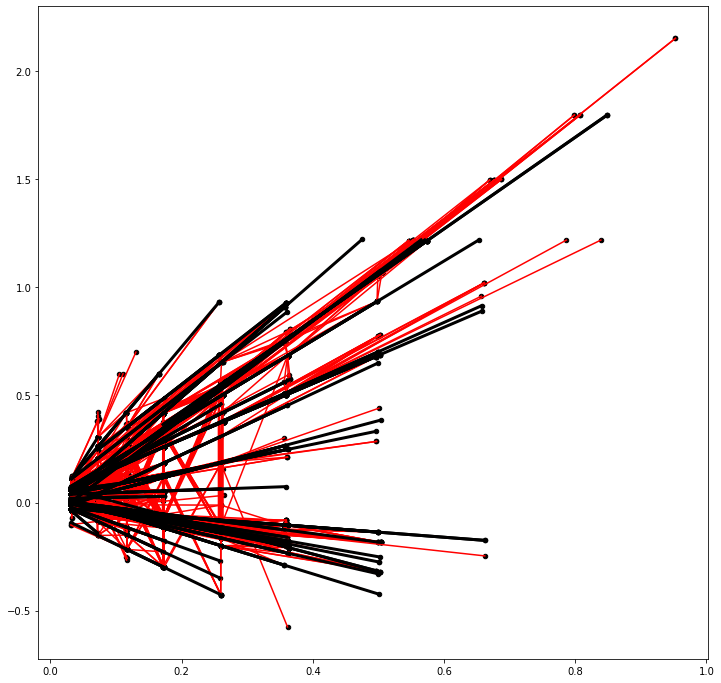

In [12]:
plt.figure(figsize=(12,12))
plt.plot(r[e[:, ~y]], z[e[:, ~y]], c='r', alpha=0.3 );
plt.plot(r[e[:, y]], z[e[:, y]], c='k', linewidth=3 );
plt.scatter(r[e], z[e], c='k', s=20);

In [ ]:
for data in model.trainset[:1000:50]:
    r, phi, z = data.x.T
    e = data.edge_index
    pid = data.pid
    y = pid[e[0]] == pid[e[1]]
    
    plt.figure(figsize=(12,12))
    plt.plot(r[e[:, ~y]], z[e[:, ~y]], c='r', alpha=0.3 );
    plt.plot(r[e[:, y]], z[e[:, y]], c='k', linewidth=3 );
    plt.scatter(r[e], z[e], c='k', s=20);
    
    plt.pause(0.001)

### Debug Connected Pairs

In [4]:
import cupy as cp
import torch
import cupyx.scipy.sparse as cpx
import scipy.sparse as sp

from torch.utils.dlpack import to_dlpack
from torch.utils.dlpack import from_dlpack

In [6]:
from lightning_modules.GNNEmbedding.Models.agnn import ConcatPlusAttentionNodeEmbedding
with open("../lightning_modules/GNNEmbedding/train_jet_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)
model = ConcatPlusAttentionNodeEmbedding(hparams)

In [7]:
model.setup(stage="fit")

In [8]:
data = model.trainset[0]

In [16]:
walk=8

In [17]:
graph = data.edge_index[:, data.sub_edge_index]
pid = data.pid

In [22]:
%%time
for i in range(100):
    graph_np = graph.numpy()
    graph_coo = sp.coo_matrix((np.ones(graph_np.shape[1]), (graph_np[0], graph_np[1])), [graph_np.max()+1,graph_np.max()+1])
    graph_csr = graph_coo.tocsr() + graph_coo.tocsr().T
    walked_graph = graph_csr**(walk-1)
    walked_graph = graph_csr*walked_graph + walked_graph
    connected_pairs = torch.from_numpy(np.vstack(walked_graph.nonzero()))
    connected_pairs = connected_pairs[:, connected_pairs[0] != connected_pairs[1]]

CPU times: user 7.01 s, sys: 1.1 ms, total: 7.01 s
Wall time: 5.32 s


In [23]:
connected_pairs.shape

torch.Size([2, 293336])

In [19]:
connected_pairs.shape

torch.Size([2, 293324])

In [15]:
connected_pairs.shape

torch.Size([2, 262516])

In [118]:
for i in np.arange(1, 10):
    print("{} steps has size: {}".format(i, (graph_csr**i).nonzero()[0].shape))

1 steps has size: (21602,)
2 steps has size: (82467,)
3 steps has size: (126288,)
4 steps has size: (177005,)
5 steps has size: (219611,)
6 steps has size: (258711,)
7 steps has size: (294721,)
8 steps has size: (329609,)
9 steps has size: (361837,)


In [114]:
np.unique(graph).shape

(3073,)

In [111]:
graph_csr

<11073x11073 sparse matrix of type '<class 'numpy.float64'>'
	with 21602 stored elements in Compressed Sparse Row format>

In [109]:
graph_csr.nonzero()[0].shape

(21602,)

### Debug Walked Pairs

In [94]:
model.setup(stage="fit")

In [96]:
data = model.trainset[0]

In [100]:
walk=3

In [101]:
graph = data.edge_index[:, data.sub_edge_index]
pid = data.pid

In [313]:
%%time

for i in range(100):

    random_choice = 7
    rand_hit = graph[0, random_choice]
    rand_pid = pid[rand_hit]

    connected_edge_ind = (graph == rand_hit).any(0)
    connected_edges = graph[:, connected_edge_ind]

    graph_np = graph.numpy()
    connected_np = connected_edges.cpu().numpy()
    graph_coo = sp.coo_matrix((np.ones(graph_np.shape[1]), (graph_np[0], graph_np[1])), [graph_np.max()+1,graph_np.max()+1])
    graph_csr = graph_coo.tocsr() + graph_coo.tocsr().T

    connected_coo = sp.coo_matrix((np.ones(connected_np.shape[1]), (connected_np[0], connected_np[1])), [graph_np.max()+1,graph_np.max()+1])
    connected_csr = connected_coo.tocsr() + connected_coo.tocsr().T

    step_max = connected_csr.max(axis=0)
    step_diag = sp.diags(step_max.toarray()[0], format="csr")
    step = (step_diag*graph_csr)

    for i in range((walk-1)//2):
        step_max = step.max(axis=0)
        step_diag = sp.diags(step_max.toarray()[0], format="csr")
        step = (step_diag*graph_csr)

    inner_walk = np.vstack(sp.triu(step + step.T).nonzero())

    for i in range((walk)//2):
        step_max = step.max(axis=0)
        step_diag = sp.diags(step_max.toarray()[0], format="csr")
        step = (step_diag*graph_csr)

    outer_walk = np.vstack(sp.triu(step + step.T).nonzero())

CPU times: user 5.32 s, sys: 0 ns, total: 5.32 s
Wall time: 4.02 s


In [311]:
%%time

for i in range(1):
    
    random_choice = 7
    rand_hit = graph[0, random_choice]
    rand_pid = pid[rand_hit]

    connected_edge_ind = np.isin(graph, rand_hit).any(0)
    connected_edges = graph[:, connected_edge_ind]

    for i in range(walk//2):
        connected_hits = np.concatenate(connected_edges.numpy())
        connected_edge_ind = np.isin(graph, connected_hits).any(0)
        connected_edges = graph[:, connected_edge_ind]

    inner_walk = connected_edges

    for i in range(walk//2):
        connected_hits = np.concatenate(connected_edges.numpy())
        connected_edge_ind = np.isin(graph, connected_hits).any(0)
        connected_edges = graph[:, connected_edge_ind]

    outer_walk = connected_edges

CPU times: user 42.4 s, sys: 511 µs, total: 42.4 s
Wall time: 30.5 s


In [312]:
print("Whole graph: {} edges, Inner walk: {} edges, Outer walk: {} edges".format(graph.shape[1], inner_walk.shape[1], outer_walk.shape[1]))

Whole graph: 96663 edges, Inner walk: 14537 edges, Outer walk: 39361 edges


In [120]:
import cupy as cp
import torch
import cupyx.scipy.sparse as cpx
import scipy.sparse as sp

from torch.utils.dlpack import to_dlpack
from torch.utils.dlpack import from_dlpack

In [211]:
%%time
graph_dx = to_dlpack(graph)
connected_dx = to_dlpack(connected_edges)

# Convert it into a CuPy array.
connected_cupy = cupy.fromDlpack(connected_dx)
graph_cupy = cupy.fromDlpack(graph_dx)

CPU times: user 15 µs, sys: 19 µs, total: 34 µs
Wall time: 36.2 µs


In [313]:
%%time

for i in range(100):

    random_choice = 7
    rand_hit = graph[0, random_choice]
    rand_pid = pid[rand_hit]

    connected_edge_ind = (graph == rand_hit).any(0)
    connected_edges = graph[:, connected_edge_ind]

    graph_np = graph.numpy()
    connected_np = connected_edges.cpu().numpy()
    graph_coo = sp.coo_matrix((np.ones(graph_np.shape[1]), (graph_np[0], graph_np[1])), [graph_np.max()+1,graph_np.max()+1])
    graph_csr = graph_coo.tocsr() + graph_coo.tocsr().T

    connected_coo = sp.coo_matrix((np.ones(connected_np.shape[1]), (connected_np[0], connected_np[1])), [graph_np.max()+1,graph_np.max()+1])
    connected_csr = connected_coo.tocsr() + connected_coo.tocsr().T

    step_max = connected_csr.max(axis=0)
    step_diag = sp.diags(step_max.toarray()[0], format="csr")
    step = (step_diag*graph_csr)

    for i in range((walk-1)//2):
        step_max = step.max(axis=0)
        step_diag = sp.diags(step_max.toarray()[0], format="csr")
        step = (step_diag*graph_csr)

    inner_walk = np.vstack(sp.triu(step + step.T).nonzero())

    for i in range((walk)//2):
        step_max = step.max(axis=0)
        step_diag = sp.diags(step_max.toarray()[0], format="csr")
        step = (step_diag*graph_csr)

    outer_walk = np.vstack(sp.triu(step + step.T).nonzero())

CPU times: user 5.32 s, sys: 0 ns, total: 5.32 s
Wall time: 4.02 s


In [309]:
print("Whole graph: {} edges, Inner walk: {} edges, Outer walk: {} edges".format(graph.shape[1], inner_walk.shape[1], outer_walk.shape[1]))

Whole graph: 96663 edges, Inner walk: 14537 edges, Outer walk: 39361 edges


## Clustering Exploration

In [11]:
model.eval()

LocalAttentionNodeEmbedding(
  (input_network): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (8): ReLU()
  )
  (edge_network): EdgeNetwork(
    (network): Sequential(
      (0): Linear(in_features=128, out_features=67, bias=True)
      (1): LayerNorm((67,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
      (3): Linear(in_features=67, out_features=67, bias=True)
      (4): LayerNorm((67,), eps=1e-05, elementwise_affine=True)
      (5): ReLU()
      (6): Linear(in_features=67, out_features=67, bias=True)
      (7): LayerNorm((67,), eps=1e-05, elementwise_affine=True)
      (8): ReLU()
      (9): Linear(in_features=67

In [12]:
data = model.testset[0]

In [13]:
node_features = data.x
edge_inputs = data.sub_edge_index
pid = data.pid
hids = data.hid.cpu().numpy()

In [14]:
with torch.no_grad():
    latent_space, doublet_score = model(node_features, edge_inputs)

In [44]:
edge_positive = torch.sigmoid(doublet_score) > 0.1
edge_true = pid[edge_inputs[0]] == pid[edge_inputs[1]]
edge_true_positive = edge_positive & edge_true

In [45]:
print("Pur: {}, Eff: {}".format(edge_true_positive.sum() / edge_positive.sum(), edge_true_positive.sum() / edge_true.sum()))

Pur: 0.9529430866241455, Eff: 0.992995023727417


In [17]:
unique_hits = torch.unique(edge_inputs)
knn_edges = build_edges(latent_space[unique_hits].to("cuda"), 0.6, 300)
doublet_edges = unique_hits[knn_edges]

In [18]:
cluster_true = data.pid_true_edges[:, np.isin(data.pid_true_edges, edge_inputs).all(0)]
cluster_true_positive = pid[doublet_edges[0]] == pid[doublet_edges[1]]

In [19]:
print("Pur: {}, Eff: {}".format(cluster_true_positive.sum() / cluster_true_positive.shape[0], cluster_true_positive.sum() / cluster_true.shape[1]))

Pur: 0.9402984976768494, Eff: 0.9549108147621155


Load a clustering algorithm

In [20]:
def cudf_labels(edge_list):
    G = cugraph.Graph()
    G.from_cudf_edgelist(edge_list, source=0, destination=1, edge_attr=None)
    labels = cugraph.components.connectivity.weakly_connected_components(G)
    track_list = labels.to_pandas()
    track_list.columns = ["track_id", "hit_id"]
    
    return track_list

In [21]:
import sklearn.cluster as sk
import cugraph
import cudf

In [22]:
%%time
truth_graph = edge_inputs[:, edge_true].cpu().numpy()
truth_graph = hids[truth_graph]
truth_df = cudf.DataFrame(truth_graph.T)

CPU times: user 1.42 s, sys: 887 ms, total: 2.3 s
Wall time: 15.9 s


In [23]:
event_file = data.event_file
hits, particles, truth = load_event(
        event_file, parts=['hits', 'particles', 'truth'])

hits = hits.merge(truth[['hit_id', 'weight', 'particle_id']], on='hit_id')
# hits = hits[hits.hit_id.isin(hids)]
hits = hits[hits.hit_id.isin(np.concatenate(truth_graph))]

### Using Truth

In [24]:
track_list = cudf_labels(truth_df)

INFO:numba.cuda.cudadrv.driver:init


In [25]:
tracks = _analyze_tracks(hits, track_list)
purity_rec = np.true_divide(tracks['major_nhits'], tracks['nhits'])
purity_maj = np.true_divide(tracks['major_nhits'], tracks['major_particle_nhits'])

In [26]:
score = score_event(hits, track_list)

In [27]:
score

0.9964667547631287

### Using Edge Classification

In [82]:
scores = []
cuts = []
for batch in model.testset:
    node_features = batch.x
    edge_inputs = batch.sub_edge_index
    pid = batch.pid
    hids = batch.hid.cpu().numpy()

    event_file = batch.event_file
    hits, particles, truth = load_event(
            event_file, parts=['hits', 'particles', 'truth'])

    hits = hits.merge(truth[['hit_id', 'weight', 'particle_id']], on='hit_id')
    # hits = hits[hits.hit_id.isin(hids)]
    hits = hits[hits.hit_id.isin(hids[np.concatenate(edge_inputs.numpy())])]

    with torch.no_grad():
        latent_space, doublet_score = model(node_features, edge_inputs)

    for cut in np.linspace(0.6,0.9, 10):  

        edge_positive = torch.sigmoid(doublet_score) > cut
        edge_prediction = edge_inputs[:, edge_positive].cpu().numpy()
        edge_prediction = hids[edge_prediction]
        edge_prediction = cudf.DataFrame(edge_prediction.T)
        track_list = cudf_labels(edge_prediction)

        score = score_event(hits, track_list)
        scores.append(score)
        cuts.append(cut)

        print("Cut: {}, score: {}".format(cut, score))

Cut: 0.6, score: 0.9370584541509905
Cut: 0.6333333333333333, score: 0.9415579259991079
Cut: 0.6666666666666666, score: 0.9415579259991079
Cut: 0.7, score: 0.9458986152973836
Cut: 0.7333333333333334, score: 0.9448021736036669
Cut: 0.7666666666666666, score: 0.9451633670222481
Cut: 0.8, score: 0.9374881448361825
Cut: 0.8333333333333334, score: 0.937024671732819
Cut: 0.8666666666666667, score: 0.9392487399268543
Cut: 0.9, score: 0.9330659209188117
Cut: 0.6, score: 0.9667304398698962
Cut: 0.6333333333333333, score: 0.9693118629586752
Cut: 0.6666666666666666, score: 0.9779829385432759
Cut: 0.7, score: 0.9719321535341018
Cut: 0.7333333333333334, score: 0.974277762470767
Cut: 0.7666666666666666, score: 0.9774909595781995
Cut: 0.8, score: 0.9770764737280642
Cut: 0.8333333333333334, score: 0.9722096935156821
Cut: 0.8666666666666667, score: 0.968927861066448
Cut: 0.9, score: 0.9627427965693043
Cut: 0.6, score: 0.9473394944145267
Cut: 0.6333333333333333, score: 0.9473394944145267
Cut: 0.666666666

Cut: 0.7333333333333334, score: 0.9534665968940621
Cut: 0.7666666666666666, score: 0.949673879739669
Cut: 0.8, score: 0.9465762734827312
Cut: 0.8333333333333334, score: 0.946200388269093
Cut: 0.8666666666666667, score: 0.9417966651749088
Cut: 0.9, score: 0.9335976629467619
Cut: 0.6, score: 0.9357462049812943
Cut: 0.6333333333333333, score: 0.9523136061202007
Cut: 0.6666666666666666, score: 0.9650420357452261
Cut: 0.7, score: 0.9680258062154057
Cut: 0.7333333333333334, score: 0.9630403331444034
Cut: 0.7666666666666666, score: 0.9665720621640786
Cut: 0.8, score: 0.9594251215451173
Cut: 0.8333333333333334, score: 0.957744667537624
Cut: 0.8666666666666667, score: 0.9487229887375631
Cut: 0.9, score: 0.9362269248802374


In [84]:
scores = np.array(scores)
cuts = np.array(cuts)

In [85]:
scores = np.reshape(scores, (10, 20))

In [88]:
np.mean(scores, axis=1).max()

0.9560774440660793

### Using Clustering

In [89]:
scores = []
epses = []
for batch in model.testset:
    node_features = batch.x
    edge_inputs = batch.sub_edge_index
    pid = batch.pid
    hids = batch.hid.cpu().numpy()

    event_file = batch.event_file
    hits, particles, truth = load_event(
            event_file, parts=['hits', 'particles', 'truth'])

    hits = hits.merge(truth[['hit_id', 'weight', 'particle_id']], on='hit_id')
    # hits = hits[hits.hit_id.isin(hids)]
    hits = hits[hits.hit_id.isin(hids[np.concatenate(edge_inputs.numpy())])]    
    
    with torch.no_grad():
        latent_space, doublet_score = model(node_features, edge_inputs)

    for eps in np.linspace(0.3,0.5, 10):

        clustering = sk.DBSCAN(eps=eps, min_samples=2).fit_predict(latent_space)
        d = {"track_id": clustering, "hit_id": hids}
        track_list = pd.DataFrame(data = d)
        score = score_event(hits, track_list)
        scores.append(score)
        epses.append(eps)
        print("Eps: {}, score: {}".format(eps, score))      

Eps: 0.3, score: 0.9396988804165929
Eps: 0.3222222222222222, score: 0.9387673418816993
Eps: 0.34444444444444444, score: 0.9416778831554949
Eps: 0.36666666666666664, score: 0.9441759616309716
Eps: 0.3888888888888889, score: 0.9447102595870907
Eps: 0.4111111111111111, score: 0.9413176687159623
Eps: 0.43333333333333335, score: 0.9412618679235445
Eps: 0.45555555555555555, score: 0.9445201898167914
Eps: 0.47777777777777775, score: 0.9407915520186318
Eps: 0.5, score: 0.9407915520186318
Eps: 0.3, score: 0.9650701055257129
Eps: 0.3222222222222222, score: 0.9672091922374639
Eps: 0.34444444444444444, score: 0.9620121910462869
Eps: 0.36666666666666664, score: 0.9652796399351924
Eps: 0.3888888888888889, score: 0.9658919692396657
Eps: 0.4111111111111111, score: 0.9647430436725046
Eps: 0.43333333333333335, score: 0.9603469180962318
Eps: 0.45555555555555555, score: 0.9584298237932599
Eps: 0.47777777777777775, score: 0.9632350651242845
Eps: 0.5, score: 0.9639016581986201
Eps: 0.3, score: 0.94115032866

Eps: 0.5, score: 0.9518756382497013
Eps: 0.3, score: 0.9185169068408291
Eps: 0.3222222222222222, score: 0.9206955042171998
Eps: 0.34444444444444444, score: 0.9176999374757975
Eps: 0.36666666666666664, score: 0.9147270601956785
Eps: 0.3888888888888889, score: 0.912192431058369
Eps: 0.4111111111111111, score: 0.9067564989956328
Eps: 0.43333333333333335, score: 0.8977911715703133
Eps: 0.45555555555555555, score: 0.8987213103500735
Eps: 0.47777777777777775, score: 0.8987213103500735
Eps: 0.5, score: 0.8883593567771084
Eps: 0.3, score: 0.9464960068074384
Eps: 0.3222222222222222, score: 0.943943724442864
Eps: 0.34444444444444444, score: 0.9308802988786725
Eps: 0.36666666666666664, score: 0.9332453821110429
Eps: 0.3888888888888889, score: 0.9336566981225207
Eps: 0.4111111111111111, score: 0.9363240747082546
Eps: 0.43333333333333335, score: 0.9291043807638267
Eps: 0.45555555555555555, score: 0.9242766134775012
Eps: 0.47777777777777775, score: 0.9057656394935218
Eps: 0.5, score: 0.9057656394935

In [90]:
scores = np.array(scores)
epses = np.array(epses)

In [91]:
scores = np.reshape(scores, (10, 20))

In [92]:
np.mean(scores, axis=1).max()

0.9526916382017315

# Constructing H100 Toy Data

## Testing

In [ ]:
model.setup(stage="fit")

In [24]:
data = model.trainset[0]

In [30]:
pid = data.pid
e = data.edge_index
r, phi, z = data.x.T

In [61]:
num_tracks = 800
random_pids = np.random.choice(np.unique(pid), num_tracks, replace=False)
g = e[:, np.isin(pid[e], random_pids).all(0)]
true_g = (pid[g[0]] == pid[g[1]])
print("True edges: {}, Fake edges: {}".format(true_g.sum(), (~true_g).sum()))

True edges: 23137, Fake edges: 23554


True edges: 23137, Fake edges: 23554


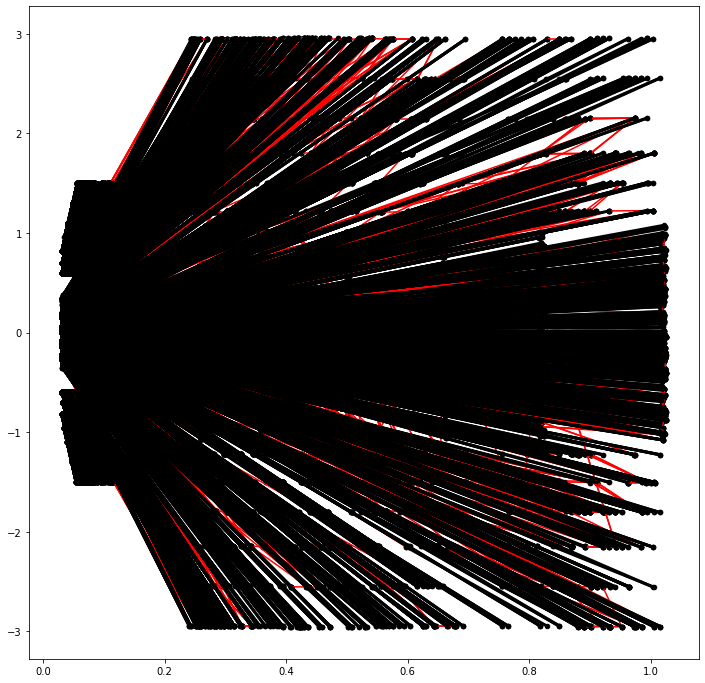

In [62]:
plt.figure(figsize=(12,12))


plt.plot(r[g[:, ~true_g]], z[g[:, ~true_g]], c='r' );
plt.plot(r[g[:, true_g]], z[g[:, true_g]], c='k', linewidth=3 );
plt.scatter(r[g], z[g], c='k', s=20);
print("True edges: {}, Fake edges: {}".format(true_g.sum(), (~true_g).sum()))

In [95]:
num_tracks = 400
random_pids = np.random.choice(np.unique(pid), num_tracks, replace=False)

In [96]:
g = e[:, np.isin(pid[e], random_pids).any(0)]

In [97]:
g.shape

torch.Size([2, 44594])

In [63]:
sizes = []
for i in range(50):
    subgraph, source_pid = walk_through(g, pid, 8)
    sizes.append(subgraph.sum())
print(np.mean(sizes))

2496.54


In [28]:
pid = data.pid
e = data.edge_index
num_tracks = 100

random_pids = np.random.choice(np.unique(pid), num_tracks, replace=False)
sub_edge_index = np.isin(pid[e], random_pids).all(0)

In [29]:
sub_edge_index.sum()

3422

## Generation Functions

In [99]:
def get_track_subset(data, num_tracks):
    pid = data.pid
    e = data.edge_index
    
    random_pids = np.random.choice(np.unique(pid), num_tracks, replace=False)
    sub_edge_index = np.isin(pid[e], random_pids).any(0)
    
    return sub_edge_index

## Build Dataset

In [116]:
def construct_downstream(batch, pl_module, datatype):

    data = copy.deepcopy(batch)
    
    # Remove big truth graphs, for quick loading!
    data.layerless_true_triplets=None 
    data.layerless_true_edges=None 
    data.layers=None
#     data.pid_true_edges=None 
    data.pid_true_triplets=None 
    data.true_weights=None 
    data.weights=None
    data.y=None
    
    data.sub_edge_index = get_track_subset(batch, 500)
    
    save_downstream(data, pl_module, datatype)

def save_downstream(batch, pl_module, datatype):

    with open(os.path.join(output_dir, datatype, batch.event_file[-4:]), 'wb') as pickle_file:
        torch.save(batch, pickle_file)

    logging.info("Saved event {} with size {}".format(batch.event_file[-4:], batch.sub_edge_index.sum()))

In [117]:
output_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/embedding_processed/toy_datasets/case_H500"

In [118]:
datatypes = ["train", "val", "test"]
overwrite = True
os.makedirs(output_dir, exist_ok=True)
[os.makedirs(os.path.join(output_dir, datatype), exist_ok=True) for datatype in datatypes]

[None, None, None]

In [119]:
# By default, the set of examples propagated through the pipeline will be train+val+test set
datasets = {"train": model.trainset, "val": model.valset, "test": model.testset}
total_length = sum([len(dataset) for dataset in datasets.values()])
batch_incr = 0
model.eval()
with torch.no_grad():
    for set_idx, (datatype, dataset) in enumerate(datasets.items()):
        for batch_idx, batch in enumerate(dataset):
            percent = (batch_incr / total_length) * 100
            sys.stdout.flush()
            sys.stdout.write(f'{percent:.01f}% inference complete \r')
            if (not os.path.exists(os.path.join(output_dir, datatype, batch.event_file[-4:]))) or overwrite:
                batch_to_save = copy.deepcopy(batch)
                batch_to_save = batch_to_save.to(model.device) #Is this step necessary??
                construct_downstream(batch_to_save, model, datatype)                      

            batch_incr += 1

INFO:root:Saved event 1094 with size 53634


INFO:root:Saved event 1268 with size 43663


INFO:root:Saved event 1104 with size 57617


INFO:root:Saved event 1468 with size 39892


INFO:root:Saved event 1078 with size 45205


INFO:root:Saved event 1553 with size 46840


INFO:root:Saved event 1329 with size 57063


INFO:root:Saved event 1201 with size 62063


INFO:root:Saved event 1589 with size 55190


INFO:root:Saved event 1113 with size 57136


INFO:root:Saved event 1005 with size 43568


INFO:root:Saved event 1558 with size 48298


INFO:root:Saved event 1126 with size 58165


INFO:root:Saved event 1236 with size 43977


INFO:root:Saved event 1364 with size 42048


INFO:root:Saved event 1225 with size 63413


INFO:root:Saved event 1165 with size 56902


INFO:root:Saved event 1006 with size 52703


INFO:root:Saved event 1293 with size 63658


INFO:root:Saved event 1263 with size 56372


INFO:root:Saved event 1243 with size 76905


INFO:root:Saved event 1159 with size 53810


INFO:root:Saved event 1185 with size 57097


INFO:root:Saved event 1169 with size 53592


INFO:root:Saved event 1507 with size 58002


INFO:root:Saved event 1171 with size 47053


INFO:root:Saved event 1108 with size 56241


INFO:root:Saved event 1550 with size 58526


INFO:root:Saved event 1503 with size 51471


INFO:root:Saved event 1542 with size 45776


INFO:root:Saved event 1045 with size 47613


INFO:root:Saved event 1381 with size 39993


INFO:root:Saved event 1455 with size 47521


INFO:root:Saved event 1384 with size 41219


INFO:root:Saved event 1211 with size 54025


INFO:root:Saved event 1327 with size 40933


INFO:root:Saved event 1313 with size 50926


INFO:root:Saved event 1491 with size 60755


INFO:root:Saved event 1358 with size 56919


INFO:root:Saved event 1025 with size 53119


INFO:root:Saved event 1027 with size 48242


INFO:root:Saved event 1471 with size 42237


INFO:root:Saved event 1510 with size 41721


INFO:root:Saved event 1363 with size 51574


INFO:root:Saved event 1100 with size 46301


INFO:root:Saved event 1573 with size 57426


INFO:root:Saved event 1469 with size 56353


INFO:root:Saved event 1158 with size 52127


INFO:root:Saved event 1538 with size 68203


INFO:root:Saved event 1305 with size 46282


INFO:root:Saved event 1114 with size 55541


INFO:root:Saved event 1099 with size 62417


INFO:root:Saved event 1456 with size 71518


INFO:root:Saved event 1016 with size 51130


INFO:root:Saved event 1325 with size 63068


INFO:root:Saved event 1214 with size 59995


INFO:root:Saved event 1281 with size 32638


INFO:root:Saved event 1142 with size 51743


INFO:root:Saved event 1069 with size 40452


INFO:root:Saved event 1547 with size 42828


INFO:root:Saved event 1334 with size 44975


INFO:root:Saved event 1130 with size 65282


INFO:root:Saved event 1204 with size 49159


INFO:root:Saved event 1499 with size 39588


INFO:root:Saved event 1299 with size 54782


INFO:root:Saved event 1543 with size 66433


INFO:root:Saved event 1337 with size 59971


INFO:root:Saved event 1360 with size 55427


INFO:root:Saved event 1519 with size 48050


INFO:root:Saved event 1092 with size 38009


INFO:root:Saved event 1030 with size 52017


INFO:root:Saved event 1124 with size 57602


INFO:root:Saved event 1070 with size 35363


INFO:root:Saved event 1275 with size 49871


INFO:root:Saved event 1120 with size 54238


INFO:root:Saved event 1533 with size 50781


INFO:root:Saved event 1509 with size 40973
INFO:root:Saved event 1015 with size 38017


INFO:root:Saved event 1081 with size 37987


INFO:root:Saved event 1148 with size 45234


INFO:root:Saved event 1475 with size 61608


INFO:root:Saved event 1389 with size 44871


INFO:root:Saved event 1096 with size 50457


INFO:root:Saved event 1020 with size 42493


INFO:root:Saved event 1105 with size 52431


INFO:root:Saved event 1372 with size 44063


INFO:root:Saved event 1350 with size 39667


INFO:root:Saved event 1548 with size 48661


INFO:root:Saved event 1183 with size 49124


INFO:root:Saved event 1152 with size 52816


INFO:root:Saved event 1132 with size 46378


INFO:root:Saved event 1021 with size 52971


INFO:root:Saved event 1527 with size 56965


INFO:root:Saved event 1517 with size 49655


INFO:root:Saved event 1462 with size 57393


INFO:root:Saved event 1186 with size 49241


INFO:root:Saved event 1215 with size 52044


INFO:root:Saved event 1106 with size 46406


INFO:root:Saved event 1555 with size 52014


INFO:root:Saved event 1556 with size 47386


INFO:root:Saved event 1320 with size 50308


INFO:root:Saved event 1230 with size 63248


INFO:root:Saved event 1029 with size 56424


INFO:root:Saved event 1084 with size 56118


INFO:root:Saved event 1250 with size 51040


INFO:root:Saved event 1032 with size 41789


INFO:root:Saved event 1319 with size 49083


INFO:root:Saved event 1565 with size 53902


INFO:root:Saved event 1207 with size 48706


INFO:root:Saved event 1193 with size 43435


INFO:root:Saved event 1093 with size 59011


INFO:root:Saved event 1529 with size 49529


INFO:root:Saved event 1119 with size 52353


INFO:root:Saved event 1066 with size 48397


INFO:root:Saved event 1009 with size 57311


INFO:root:Saved event 1584 with size 44697


INFO:root:Saved event 1047 with size 40865


INFO:root:Saved event 1138 with size 63415


INFO:root:Saved event 1249 with size 56195


INFO:root:Saved event 1143 with size 46115


INFO:root:Saved event 1229 with size 54177


INFO:root:Saved event 1394 with size 37106


INFO:root:Saved event 1181 with size 37200
INFO:root:Saved event 1366 with size 37540


INFO:root:Saved event 1134 with size 49074


INFO:root:Saved event 1568 with size 51427


INFO:root:Saved event 1041 with size 39079


INFO:root:Saved event 1376 with size 42187


INFO:root:Saved event 1331 with size 39150


INFO:root:Saved event 1133 with size 54746
INFO:root:Saved event 1248 with size 37113


INFO:root:Saved event 1375 with size 44825


INFO:root:Saved event 1173 with size 41957


INFO:root:Saved event 1458 with size 41039


INFO:root:Saved event 1478 with size 57392


INFO:root:Saved event 1524 with size 49626


INFO:root:Saved event 1369 with size 51852


INFO:root:Saved event 1065 with size 43152


INFO:root:Saved event 1276 with size 40696


INFO:root:Saved event 1463 with size 46855


INFO:root:Saved event 1177 with size 40609


INFO:root:Saved event 1561 with size 51073


INFO:root:Saved event 1270 with size 34857


INFO:root:Saved event 1504 with size 65668


INFO:root:Saved event 1572 with size 59160


INFO:root:Saved event 1537 with size 42592


INFO:root:Saved event 1247 with size 48668


INFO:root:Saved event 1289 with size 61099


INFO:root:Saved event 1271 with size 52405


INFO:root:Saved event 1280 with size 66925


INFO:root:Saved event 1477 with size 49977


INFO:root:Saved event 1522 with size 42877


INFO:root:Saved event 1034 with size 47315


INFO:root:Saved event 1557 with size 51539


INFO:root:Saved event 1073 with size 52888


INFO:root:Saved event 1554 with size 45967


INFO:root:Saved event 1493 with size 50305


INFO:root:Saved event 1079 with size 40855


INFO:root:Saved event 1292 with size 49447


INFO:root:Saved event 1346 with size 42435


INFO:root:Saved event 1296 with size 52152


INFO:root:Saved event 1033 with size 51121


INFO:root:Saved event 1380 with size 46609


INFO:root:Saved event 1308 with size 59333


INFO:root:Saved event 1383 with size 53547


INFO:root:Saved event 1161 with size 55074


INFO:root:Saved event 1233 with size 55187


INFO:root:Saved event 1453 with size 58848


INFO:root:Saved event 1333 with size 44889


INFO:root:Saved event 1001 with size 52653


INFO:root:Saved event 1264 with size 50094


INFO:root:Saved event 1511 with size 47218


INFO:root:Saved event 1378 with size 44318


INFO:root:Saved event 1398 with size 43956


INFO:root:Saved event 1340 with size 50376


INFO:root:Saved event 1080 with size 70748


INFO:root:Saved event 1460 with size 44370


INFO:root:Saved event 1382 with size 48658


INFO:root:Saved event 1012 with size 60499


INFO:root:Saved event 1051 with size 54837


INFO:root:Saved event 1174 with size 61398


INFO:root:Saved event 1013 with size 62746


INFO:root:Saved event 1277 with size 54600


INFO:root:Saved event 1166 with size 37718


INFO:root:Saved event 1198 with size 49212


INFO:root:Saved event 1196 with size 47475


INFO:root:Saved event 1189 with size 48571


INFO:root:Saved event 1208 with size 64393


INFO:root:Saved event 1266 with size 43257


INFO:root:Saved event 1312 with size 58458


INFO:root:Saved event 1365 with size 45416


INFO:root:Saved event 1267 with size 60036


INFO:root:Saved event 1390 with size 45545


INFO:root:Saved event 1150 with size 50195


INFO:root:Saved event 1241 with size 49632


INFO:root:Saved event 1251 with size 57607


INFO:root:Saved event 1318 with size 42704


INFO:root:Saved event 1377 with size 47905


INFO:root:Saved event 1470 with size 40833


INFO:root:Saved event 1479 with size 48642


INFO:root:Saved event 1523 with size 42549


INFO:root:Saved event 1459 with size 51036


INFO:root:Saved event 1089 with size 54663


INFO:root:Saved event 1395 with size 67011


INFO:root:Saved event 1353 with size 48391


INFO:root:Saved event 1219 with size 47222


INFO:root:Saved event 1111 with size 45072


INFO:root:Saved event 1002 with size 54262


INFO:root:Saved event 1485 with size 63902


INFO:root:Saved event 1285 with size 44586


INFO:root:Saved event 1117 with size 48365


INFO:root:Saved event 1328 with size 54658


INFO:root:Saved event 1530 with size 66364


INFO:root:Saved event 1141 with size 64281


INFO:root:Saved event 1480 with size 46885


INFO:root:Saved event 1323 with size 42240


INFO:root:Saved event 1227 with size 47054


INFO:root:Saved event 1483 with size 47627


INFO:root:Saved event 1212 with size 56715


INFO:root:Saved event 1286 with size 55516


INFO:root:Saved event 1095 with size 55840


INFO:root:Saved event 1488 with size 66168


INFO:root:Saved event 1534 with size 45696


INFO:root:Saved event 1234 with size 52527


INFO:root:Saved event 1564 with size 63435


INFO:root:Saved event 1257 with size 59893


INFO:root:Saved event 1155 with size 48012


INFO:root:Saved event 1223 with size 52966


INFO:root:Saved event 1253 with size 45004


INFO:root:Saved event 1546 with size 63894


INFO:root:Saved event 1037 with size 59788


INFO:root:Saved event 1175 with size 59175


INFO:root:Saved event 1254 with size 42596


INFO:root:Saved event 1190 with size 51382


INFO:root:Saved event 1586 with size 49615


INFO:root:Saved event 1531 with size 46586


INFO:root:Saved event 1450 with size 51397


INFO:root:Saved event 1040 with size 52970


INFO:root:Saved event 1050 with size 57526


INFO:root:Saved event 1028 with size 52454


INFO:root:Saved event 1088 with size 56242


INFO:root:Saved event 1139 with size 63547


INFO:root:Saved event 1221 with size 54875


INFO:root:Saved event 1367 with size 51401


INFO:root:Saved event 1290 with size 47095


INFO:root:Saved event 1077 with size 44389


INFO:root:Saved event 1301 with size 37727


INFO:root:Saved event 1396 with size 40918


INFO:root:Saved event 1563 with size 53127


INFO:root:Saved event 1387 with size 46486


INFO:root:Saved event 1528 with size 61674


INFO:root:Saved event 1287 with size 62849


INFO:root:Saved event 1451 with size 40503


INFO:root:Saved event 1516 with size 45839


INFO:root:Saved event 1103 with size 56922


INFO:root:Saved event 1302 with size 60468


INFO:root:Saved event 1587 with size 35872


INFO:root:Saved event 1539 with size 54429


INFO:root:Saved event 1136 with size 44472


INFO:root:Saved event 1061 with size 56473


INFO:root:Saved event 1018 with size 44934


INFO:root:Saved event 1464 with size 68116


INFO:root:Saved event 1176 with size 68027


INFO:root:Saved event 1347 with size 45937


INFO:root:Saved event 1164 with size 53751


INFO:root:Saved event 1512 with size 58815


INFO:root:Saved event 1324 with size 54698


INFO:root:Saved event 1023 with size 59994


INFO:root:Saved event 1110 with size 44343


INFO:root:Saved event 1179 with size 47547


INFO:root:Saved event 1484 with size 44229


INFO:root:Saved event 1356 with size 48150


INFO:root:Saved event 1163 with size 53709


INFO:root:Saved event 1228 with size 43946


INFO:root:Saved event 1311 with size 54203


INFO:root:Saved event 1192 with size 58544


INFO:root:Saved event 1144 with size 47973


INFO:root:Saved event 1052 with size 54571


INFO:root:Saved event 1262 with size 55235


INFO:root:Saved event 1053 with size 42987


INFO:root:Saved event 1056 with size 55989


INFO:root:Saved event 1068 with size 41796


INFO:root:Saved event 1577 with size 61152


INFO:root:Saved event 1349 with size 47059


INFO:root:Saved event 1357 with size 50603


INFO:root:Saved event 1315 with size 55160


INFO:root:Saved event 1238 with size 52830


INFO:root:Saved event 1283 with size 39807


INFO:root:Saved event 1525 with size 55700


INFO:root:Saved event 1167 with size 64325


INFO:root:Saved event 1022 with size 44299


INFO:root:Saved event 1536 with size 45266


INFO:root:Saved event 1063 with size 56714


INFO:root:Saved event 1476 with size 57469


INFO:root:Saved event 1160 with size 40356


INFO:root:Saved event 1513 with size 49580


INFO:root:Saved event 1107 with size 58169


INFO:root:Saved event 1125 with size 56644


INFO:root:Saved event 1235 with size 58730


INFO:root:Saved event 1297 with size 51217


INFO:root:Saved event 1109 with size 40409


INFO:root:Saved event 1566 with size 50432


INFO:root:Saved event 1344 with size 51833


INFO:root:Saved event 1202 with size 52295


INFO:root:Saved event 1147 with size 38210


INFO:root:Saved event 1154 with size 54996


INFO:root:Saved event 1194 with size 49514


INFO:root:Saved event 1129 with size 42525


INFO:root:Saved event 1391 with size 51351


INFO:root:Saved event 1060 with size 56690


INFO:root:Saved event 1343 with size 57445


INFO:root:Saved event 1244 with size 45755


INFO:root:Saved event 1054 with size 47407


INFO:root:Saved event 1303 with size 46215


INFO:root:Saved event 1549 with size 41638


INFO:root:Saved event 1149 with size 51795


INFO:root:Saved event 1000 with size 61131


INFO:root:Saved event 1569 with size 61193


INFO:root:Saved event 1472 with size 43513


INFO:root:Saved event 1466 with size 47974


INFO:root:Saved event 1461 with size 54461


INFO:root:Saved event 1058 with size 47015


INFO:root:Saved event 1122 with size 43121


INFO:root:Saved event 1361 with size 50479


INFO:root:Saved event 1544 with size 47675


INFO:root:Saved event 1307 with size 57426


INFO:root:Saved event 1304 with size 62460


INFO:root:Saved event 1316 with size 43670


INFO:root:Saved event 1481 with size 39315


INFO:root:Saved event 1582 with size 46725


INFO:root:Saved event 1026 with size 41412


INFO:root:Saved event 1560 with size 46214


INFO:root:Saved event 1218 with size 42691


INFO:root:Saved event 1288 with size 49907


INFO:root:Saved event 1368 with size 50584


INFO:root:Saved event 1571 with size 57598


INFO:root:Saved event 1359 with size 49182


INFO:root:Saved event 1576 with size 53378


INFO:root:Saved event 1172 with size 40366


INFO:root:Saved event 1526 with size 61575


INFO:root:Saved event 1206 with size 53779


INFO:root:Saved event 1011 with size 55613


INFO:root:Saved event 1017 with size 58612


INFO:root:Saved event 1265 with size 40680


INFO:root:Saved event 1118 with size 60580


INFO:root:Saved event 1044 with size 42747


INFO:root:Saved event 1019 with size 35556


INFO:root:Saved event 1583 with size 47807


INFO:root:Saved event 1496 with size 55982


INFO:root:Saved event 1091 with size 57804


INFO:root:Saved event 1300 with size 55097


INFO:root:Saved event 1156 with size 62734


INFO:root:Saved event 1180 with size 64896


INFO:root:Saved event 1540 with size 42916


INFO:root:Saved event 1574 with size 40630


INFO:root:Saved event 1085 with size 52213


INFO:root:Saved event 1153 with size 54269


INFO:root:Saved event 1090 with size 53411


INFO:root:Saved event 1474 with size 59623


INFO:root:Saved event 1197 with size 45164


INFO:root:Saved event 1200 with size 60402


INFO:root:Saved event 1374 with size 49904


INFO:root:Saved event 1330 with size 53591


INFO:root:Saved event 1336 with size 50086


INFO:root:Saved event 1004 with size 49531


INFO:root:Saved event 1049 with size 57511


INFO:root:Saved event 1259 with size 53675


INFO:root:Saved event 1137 with size 47138


INFO:root:Saved event 1036 with size 51310


INFO:root:Saved event 1112 with size 48848


INFO:root:Saved event 1385 with size 54603


INFO:root:Saved event 1062 with size 59157


INFO:root:Saved event 1500 with size 47441


INFO:root:Saved event 1209 with size 47950


INFO:root:Saved event 1055 with size 45485


INFO:root:Saved event 1048 with size 44253


INFO:root:Saved event 1354 with size 52266


INFO:root:Saved event 1256 with size 55163


INFO:root:Saved event 1064 with size 47745


INFO:root:Saved event 1580 with size 50867


INFO:root:Saved event 1042 with size 59542


INFO:root:Saved event 1309 with size 41287


INFO:root:Saved event 1284 with size 59968


INFO:root:Saved event 1260 with size 52932


INFO:root:Saved event 1551 with size 44757


INFO:root:Saved event 1298 with size 43053


INFO:root:Saved event 1392 with size 45398


INFO:root:Saved event 1497 with size 41871


INFO:root:Saved event 1295 with size 50555


INFO:root:Saved event 1335 with size 62126


INFO:root:Saved event 1339 with size 48970


INFO:root:Saved event 1222 with size 48479


INFO:root:Saved event 1521 with size 44163


INFO:root:Saved event 1321 with size 47814


INFO:root:Saved event 1393 with size 45097


INFO:root:Saved event 1532 with size 56808


INFO:root:Saved event 1217 with size 61677


INFO:root:Saved event 1397 with size 55506


INFO:root:Saved event 1191 with size 51346


INFO:root:Saved event 1046 with size 48924


INFO:root:Saved event 1242 with size 48626


INFO:root:Saved event 1399 with size 48962


INFO:root:Saved event 1246 with size 46716


INFO:root:Saved event 1195 with size 54036


INFO:root:Saved event 1282 with size 42926


INFO:root:Saved event 1371 with size 45195


INFO:root:Saved event 1075 with size 49566


INFO:root:Saved event 1039 with size 53269
INFO:root:Saved event 1220 with size 37919


INFO:root:Saved event 1272 with size 44465


INFO:root:Saved event 1379 with size 37725


INFO:root:Saved event 1559 with size 44560


INFO:root:Saved event 1035 with size 58659


INFO:root:Saved event 1245 with size 48816


INFO:root:Saved event 1306 with size 60568


INFO:root:Saved event 1585 with size 46881


INFO:root:Saved event 1581 with size 42601


INFO:root:Saved event 1008 with size 52596


INFO:root:Saved event 1278 with size 46743


INFO:root:Saved event 1351 with size 45820


INFO:root:Saved event 1258 with size 47706


INFO:root:Saved event 1239 with size 55183


INFO:root:Saved event 1520 with size 50777


INFO:root:Saved event 1322 with size 42926


INFO:root:Saved event 1184 with size 47848


INFO:root:Saved event 1252 with size 56513


INFO:root:Saved event 1178 with size 49683


INFO:root:Saved event 1187 with size 60120


INFO:root:Saved event 1059 with size 56683


INFO:root:Saved event 1482 with size 51229


INFO:root:Saved event 1067 with size 55697


INFO:root:Saved event 1071 with size 53789


INFO:root:Saved event 1145 with size 44814


INFO:root:Saved event 1131 with size 45718


INFO:root:Saved event 1588 with size 55550


INFO:root:Saved event 1473 with size 45052


INFO:root:Saved event 1332 with size 56727


INFO:root:Saved event 1294 with size 46882


INFO:root:Saved event 1007 with size 56922


INFO:root:Saved event 1515 with size 51367


INFO:root:Saved event 1352 with size 46038


INFO:root:Saved event 1578 with size 46319


INFO:root:Saved event 1074 with size 53055


INFO:root:Saved event 1146 with size 65618


INFO:root:Saved event 1562 with size 47895


INFO:root:Saved event 1210 with size 47331


INFO:root:Saved event 1388 with size 52560


INFO:root:Saved event 1240 with size 51205


INFO:root:Saved event 1182 with size 55269


INFO:root:Saved event 1454 with size 52406


INFO:root:Saved event 1043 with size 53696


INFO:root:Saved event 1224 with size 48658


INFO:root:Saved event 1098 with size 37872


INFO:root:Saved event 1310 with size 41590


INFO:root:Saved event 1140 with size 48825


INFO:root:Saved event 1273 with size 52713


INFO:root:Saved event 1326 with size 60006


INFO:root:Saved event 1279 with size 45257


INFO:root:Saved event 1261 with size 54609


INFO:root:Saved event 1514 with size 58970


INFO:root:Saved event 1370 with size 54606


INFO:root:Saved event 1216 with size 50923


INFO:root:Saved event 1465 with size 52356


INFO:root:Saved event 1269 with size 47633


INFO:root:Saved event 1127 with size 54570


INFO:root:Saved event 1231 with size 42459


INFO:root:Saved event 1188 with size 58576


INFO:root:Saved event 1494 with size 41459


INFO:root:Saved event 1151 with size 41589


INFO:root:Saved event 1570 with size 61250


INFO:root:Saved event 1087 with size 58057


INFO:root:Saved event 1031 with size 43312


INFO:root:Saved event 1486 with size 49563


INFO:root:Saved event 1232 with size 38253


INFO:root:Saved event 1498 with size 52407


INFO:root:Saved event 1123 with size 41186


INFO:root:Saved event 1501 with size 41031


INFO:root:Saved event 1083 with size 40709


INFO:root:Saved event 1545 with size 41448


INFO:root:Saved event 1487 with size 50215


INFO:root:Saved event 1345 with size 56771


INFO:root:Saved event 1552 with size 61746


INFO:root:Saved event 1291 with size 51064


INFO:root:Saved event 1101 with size 37392


INFO:root:Saved event 1457 with size 58211


INFO:root:Saved event 1115 with size 62415


INFO:root:Saved event 1518 with size 60683


INFO:root:Saved event 1076 with size 48593


INFO:root:Saved event 1128 with size 55312


INFO:root:Saved event 1505 with size 45212


INFO:root:Saved event 1205 with size 45038


INFO:root:Saved event 1341 with size 47723


INFO:root:Saved event 1226 with size 40013


INFO:root:Saved event 1506 with size 40812


INFO:root:Saved event 1467 with size 56064


INFO:root:Saved event 1386 with size 64866


INFO:root:Saved event 1086 with size 52714


INFO:root:Saved event 1362 with size 52439


INFO:root:Saved event 1492 with size 44329


INFO:root:Saved event 1199 with size 44627


INFO:root:Saved event 1168 with size 43057


INFO:root:Saved event 1355 with size 50948


INFO:root:Saved event 1495 with size 43226


INFO:root:Saved event 1535 with size 58474


INFO:root:Saved event 1003 with size 42480


INFO:root:Saved event 1014 with size 49639


INFO:root:Saved event 1489 with size 48765


INFO:root:Saved event 1203 with size 48799


INFO:root:Saved event 1314 with size 58412


INFO:root:Saved event 1490 with size 42215


INFO:root:Saved event 1102 with size 50334


INFO:root:Saved event 1116 with size 47553


INFO:root:Saved event 1567 with size 46708


INFO:root:Saved event 1072 with size 51192


INFO:root:Saved event 1317 with size 60788


INFO:root:Saved event 1162 with size 60609


INFO:root:Saved event 1502 with size 60012


INFO:root:Saved event 1097 with size 48878


INFO:root:Saved event 1057 with size 61553


INFO:root:Saved event 1121 with size 45443


INFO:root:Saved event 1274 with size 62155


INFO:root:Saved event 1024 with size 49807


INFO:root:Saved event 1338 with size 58744


INFO:root:Saved event 1082 with size 37985


INFO:root:Saved event 1348 with size 43524


INFO:root:Saved event 1452 with size 58448


INFO:root:Saved event 1213 with size 37087


INFO:root:Saved event 1170 with size 47740


INFO:root:Saved event 1255 with size 46642


INFO:root:Saved event 1579 with size 49590


INFO:root:Saved event 1010 with size 57942


INFO:root:Saved event 1135 with size 56763


INFO:root:Saved event 1342 with size 58423


INFO:root:Saved event 1575 with size 43316


INFO:root:Saved event 1508 with size 58801


INFO:root:Saved event 1373 with size 64356


INFO:root:Saved event 1541 with size 56030


INFO:root:Saved event 1157 with size 58794


INFO:root:Saved event 1237 with size 61982


INFO:root:Saved event 1038 with size 61931
